<a href="https://colab.research.google.com/github/AlirezaPNouri/BERTEmbedding/blob/main/FourthOfOct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Author: ALireza P. Nouri
Supervisor: Prof. M. Shahriar Hossain
link to the dataset
https://raw.githubusercontent.com/AlirezaPNouri/BERTEmbedding/main/5KArticles.csv
The last version which is written on 4th of Oct 2021

In [1]:
# to check if the GPU is ready to use
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

# to tell pytorch that we are going to use GPU
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [2]:
#install needed packages
!pip install transformers
!pip install wget

     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 636 kB 51.2 MB/s 
     |████████████████████████████████| 3.3 MB 54.1 MB/s 
     |████████████████████████████████| 895 kB 53.7 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 109 kB 64.2 MB/s 
     |████████████████████████████████| 546 kB 54.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=3abfa6e02dc3732cb63c78adcdf36bc67ba1eb92abe4f4c37b241f1b0d0eac2a
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
# download the dataset as a zip file
import wget
import os
import requests
print('Downloading dataset...')

# The URL for the dataset zip file.
url = 'https://raw.githubusercontent.com/AlirezaPNouri/BERTEmbedding/main/5KArticles.csv'
res = requests.get(url, allow_redirects=True)
with open('small_dataset_NYT.csv','wb') as file:
    file.write(res.content)
print('Download is done!')

Download is done!


In [4]:
import pandas as pd
MAX_DATA = 1000
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/small_dataset_NYT.csv", header= None, skiprows=1,  )
df = df.dropna(how='any', axis=0)

df = df[0:MAX_DATA][[1, 2]]
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))
# Display 10 random rows from the data.
print(df.columns)
df.sample(10)
# new_df = df[[1, 2]]
df.columns = ['id', 'content']
# df.head()
print('The dimension of the dataset is {}'.format(df.shape))
print(df.sample)

Number of training sentences: 1,000

Int64Index([1, 2], dtype='int64')
The dimension of the dataset is (1000, 2)
<bound method NDFrame.sample of                    id                                            content
0    19900101_0000000  HURRYING through the tunnel at Veterans Stadiu...
1    19900101_0000001  FOR six years, American corporations have been...
2    19900101_0000002  Alcide Chaisson, who is 69 years old and lives...
3    19900101_0000003  Gary Anderson is the third-most accurate kicke...
4    19900101_0000004  The National Bank of Poland is devaluing the P...
..                ...                                                ...
995  19900111_0000997  The greeting card giant Hallmark Cards Inc. sa...
996  19900111_0000998  The police detained 15,000 people today in a s...
997  19900111_0000999  The American retailing operations of the Campe...
998  19900111_0001000  The Ralston Purina Company said it would estab...
999  19900111_0001001  Barry Lyons and the Mets agre

In [5]:
import numpy as np
sentences = df.content.values
labels = df.id.values
# print(labels)
labels = [int(d[7]) for d in labels]
# print(labels)
#function to get unique values
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return len(unique_list)

class_num = unique(labels)
print('The numeber of classes is {}'.format(class_num))
print('length of data is {} and length of labels is {}'.format(len(sentences), len(labels)))
print('labels are : ', labels)

The numeber of classes is 10
length of data is 1000 and length of labels is 1000
labels are :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

In [6]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [7]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
max_length = 256
# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_length,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  HURRYING through the tunnel at Veterans Stadium, the Los Angeles Rams' left guard, Tom Newberry, yelled, ''Warm-weather California sissies, huh?'' With a grin he disappeared into the locker room to calmly celebrate a 21-7 wild-card victory over the Philadelphia Eagles in a cold raw rain, which qualified the Rams to go against the Giants next Sunday at Giants Stadium in the Super Bowl XXIV tournament. But until yesterday, the Rams had always played like warm-weather California sissies in cold-weather playoff games. Until yesterday, the Rams were 0-9 in cold-weather playoff games since the franchise moved to Los Angeles from Cleveland more than four decades ago. In that time, Ram teams lost three outdoor playoff games in Minnesota (plus one in the warmth of the Metrodome a year ago), two in Washington, and one each in Cleveland, Detroit, Green Bay and Chicago. ''I'm tired of being a weatherman; if I get fired, I'm going right to the news,'' John Robinson, the Rams' coach, joke

In [8]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or

In [9]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [10]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = class_num, # The number of output labels--2 for binary classification. # here temp is the size of the dataset
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = True, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [11]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [12]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [13]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 20

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [14]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [15]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [16]:
#Check the variables size in the memory
import sys

local_vars = list(locals().items())
for var, obj in local_vars:
  temp = sys.getsizeof(obj)
  if temp >100000:
    print(var, temp)

df 3949116


In [17]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    embedding_layers = []
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        print(batch[2].shape)
        print(batch[1].shape)
        print(batch[0].shape)
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        # print(len(outputs))
        # print(outputs[0]) the loss
        # print(len(outputs[1])) the batches
        # print(len(outputs[2])) the embedding layers
        # import numpy as np
        # print(np.shape(outputs[2]))--->(13,)
        # print(np.shape(outputs[2][1])) --->torch.Size([32, 64, 768]) the embedding in the layer one
        # print(np.shape(outputs[2][2]))--->torch.Size([32, 64, 768]) the embedding in the layer two
        # print(len(outputs[2][3]))
        loss = outputs[0]
        
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))


======== Epoch 1 / 20 ========
Training...
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
to

In [18]:
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print(  "")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()
    #count = 0 # added by Ali
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        
        logits = outputs[0]
        # print(len(outputs))
        # print(np.shape(outputs[1])) # all embedding layers data
        # print(outputs[1][12]) # access to embedding vectors in layer 13
        #count +=1 added by Ali

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    #print(count)
print("")
print("Training complete!")


Running Validation...
  Accuracy: 0.20
  Validation took: 0:00:01

Training complete!


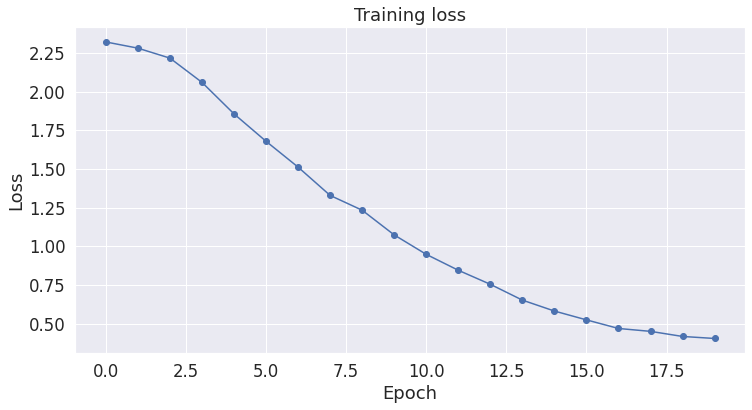

In [19]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [20]:
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
#the same as the maxlen we used in the encoder_plus function
MAX_LEN = max([len(sen) for sen in input_ids])
# Load the dataset into a pandas dataframe.
# df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
df = df[0:100]
sentences = sentences[0:100]
labels = labels[0:100]
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
# sentences = new_df.text.values
# labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 100  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Token indices sequence length is longer than the specified maximum sequence length for this model (1281 > 512). Running this sequence through the model will result in indexing errors


Number of test sentences: 100



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [21]:
print(MAX_LEN)
print(df.shape)
print(len(sentences))
print(input_ids.shape)
print(len(labels))

256
(100, 2)
100
(100, 256)
100


In [23]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  print('np.shape(outputs[0]) ', np.shape(outputs[0]))
  print('np.shape(outputs[1][0]) ', np.shape(outputs[1][0]))
  print('np.shape(outputs[1][1]) ', np.shape(outputs[1][1]))
  print('np.shape(outputs[1][12]) ', np.shape(outputs[1][12]))

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 100 test sentences...
np.shape(outputs[0])  torch.Size([100, 10])
np.shape(outputs[1][0])  torch.Size([100, 256, 768])
np.shape(outputs[1][1])  torch.Size([100, 256, 768])
np.shape(outputs[1][12])  torch.Size([100, 256, 768])
    DONE.


In [24]:
from sklearn.metrics.pairwise import cosine_similarity
last_layer = outputs[1][12]
# print out all the sentences
c = 0
for doc in sentences:
  print('doc {} :'.format(c), doc)
  c += 1

doc 0 : HURRYING through the tunnel at Veterans Stadium, the Los Angeles Rams' left guard, Tom Newberry, yelled, ''Warm-weather California sissies, huh?'' With a grin he disappeared into the locker room to calmly celebrate a 21-7 wild-card victory over the Philadelphia Eagles in a cold raw rain, which qualified the Rams to go against the Giants next Sunday at Giants Stadium in the Super Bowl XXIV tournament. But until yesterday, the Rams had always played like warm-weather California sissies in cold-weather playoff games. Until yesterday, the Rams were 0-9 in cold-weather playoff games since the franchise moved to Los Angeles from Cleveland more than four decades ago. In that time, Ram teams lost three outdoor playoff games in Minnesota (plus one in the warmth of the Metrodome a year ago), two in Washington, and one each in Cleveland, Detroit, Green Bay and Chicago. ''I'm tired of being a weatherman; if I get fired, I'm going right to the news,'' John Robinson, the Rams' coach, joked. 

In [25]:
def find_similar(embedding_layers, word_index, original_sentence):
  score_dic = dict()
  print(len(original_sentence))
  for j in range(1, min(256, len(original_sentence))):
    score_dic[original_sentence[j -1]] =  cosine_similarity([embedding_layers[word_index].to('cpu').numpy()], [embedding_layers[j].to('cpu').numpy()])[0][0]
    # print('word is {}, score is {}'.format(original_sentence[j -1], cosine_similarity([embedding_layers[word_index].to('cpu').numpy()], [embedding_layers[j].to('cpu').numpy()])[0][0]))
  return score_dic

# show th t-SNE for the tokens
from sklearn.manifold import TSNE
def tsne_plot(sentences, output):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word, embed in zip(sentences, output):
        tokens.append(embed)
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [26]:
# import pickle
# pickle.dump(outputs, open("outputs.p", "wb"))
# pickle.dump(sentences, open("sentences.p", "wb"))
# pickle.dump(labels, open("labels.p", "wb"))



tokens in  doc 8 are ['confronted', 'by', 'growing', 'demands', 'that', 'the', 'communist', 'party', 'dissolve', 'itself', ',', 'top', 'officials', 'of', 'this', 'country', "'", 's', 'old', 'order', 'say', 'they', 'will', 'call', 'a', 'special', 'congress', 'to', 'di', '##sman', '##tle', 'the', 'disgrace', '##d', 'party', 'even', 'before', 'free', 'elections', 'are', 'held', 'in', 'april', '.', 'late', 'saturday', 'night', ',', 'a', 'group', 'of', 'party', 'officials', ',', 'many', 'of', 'whom', 'quickly', 'severed', 'their', 'relationship', 'with', 'the', 'ce', '##aus', '##escu', 'dictatorship', 'as', 'a', 'popular', 'uprising', 'swept', 'it', 'out', 'of', 'power', ',', 'went', 'on', 'the', 'national', 'television', 'to', 'announce', 'the', 'special', 'congress', '.', 'their', 'message', 'was', 'repeated', 'today', 'in', 'the', 'rum', '##anian', 'newspapers', ',', 'which', 'like', 'the', 'television', 'are', 'now', 'controlled', 'by', 'the', 'country', "'", 's', 'new', ',', 'non', '-'

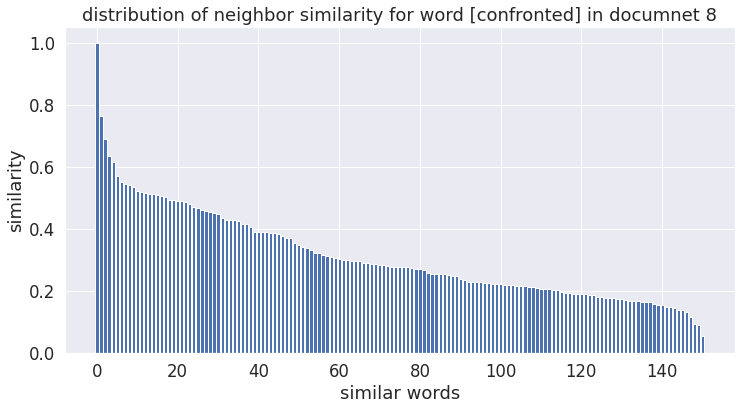

3   -->  growing
1690
[1.0, 0.7909427, 0.7625195, 0.6624005, 0.5952111, 0.547132, 0.54608953, 0.5422215, 0.5414486, 0.5302148, 0.5165315, 0.5159476, 0.5109605, 0.50678277, 0.50320834, 0.502239, 0.5013999, 0.49904922, 0.49627152, 0.49220017, 0.49152467, 0.491122, 0.4818622, 0.48033196, 0.47905138, 0.4732348, 0.47055203, 0.46841273, 0.46679983, 0.4622952, 0.46069592, 0.46047848, 0.45903313, 0.45242363, 0.4487048, 0.44843537, 0.43443263, 0.43403044, 0.4300603, 0.42870498, 0.4254526, 0.425094, 0.42244005, 0.4213211, 0.4210466, 0.41378734, 0.40357068, 0.39247715, 0.38528952, 0.38241544, 0.3823461, 0.37904066, 0.37827978, 0.37728885, 0.36826783, 0.36627644, 0.35632423, 0.3506922, 0.3456724, 0.34138405, 0.3331604, 0.33295774, 0.33205664, 0.33184123, 0.33139473, 0.32956168, 0.32474938, 0.3209632, 0.3165707, 0.31385493, 0.3105106, 0.3102507, 0.30526656, 0.3043981, 0.30099466, 0.29869348, 0.29585558, 0.29457298, 0.2923539, 0.2913214, 0.2910555, 0.29094392, 0.28986263, 0.28906423, 0.2890271, 0.28

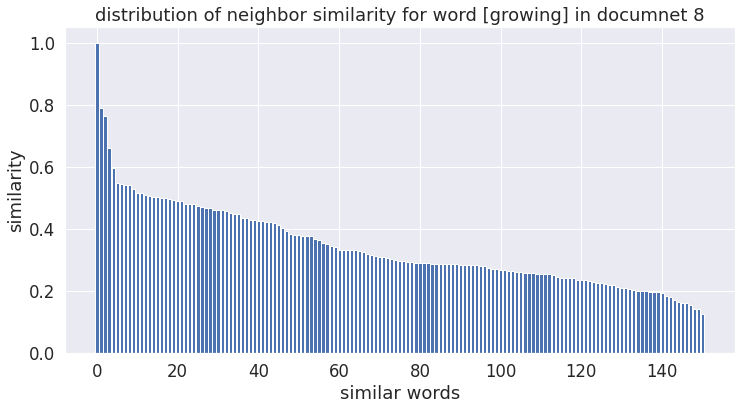

4   -->  demands
1690
[1.0, 0.7909427, 0.68923247, 0.63151646, 0.5960602, 0.5820954, 0.54888445, 0.53983784, 0.52932245, 0.5269363, 0.51922804, 0.5115819, 0.51086956, 0.50801253, 0.50780815, 0.5041608, 0.5039008, 0.50314564, 0.50055075, 0.4993526, 0.49659613, 0.49527773, 0.4941708, 0.49406937, 0.49402568, 0.49398005, 0.4877444, 0.48702723, 0.48593006, 0.48311225, 0.48281613, 0.47828975, 0.47754496, 0.47701007, 0.4759969, 0.47537768, 0.4691928, 0.46701312, 0.46691644, 0.46069944, 0.45973665, 0.45321697, 0.4523169, 0.4477617, 0.44118097, 0.4361315, 0.43174288, 0.42708606, 0.42073956, 0.41592175, 0.38798824, 0.3874007, 0.3841153, 0.38196057, 0.37080264, 0.36837465, 0.36196944, 0.36050305, 0.34209788, 0.34178865, 0.34143537, 0.34121352, 0.3367536, 0.33528095, 0.33380264, 0.33056813, 0.33039486, 0.32684636, 0.32194406, 0.3216554, 0.32072675, 0.3115518, 0.31145412, 0.31107092, 0.3105958, 0.30974633, 0.30623686, 0.30449647, 0.30378246, 0.3006802, 0.3004741, 0.29798883, 0.2975905, 0.29568124, 

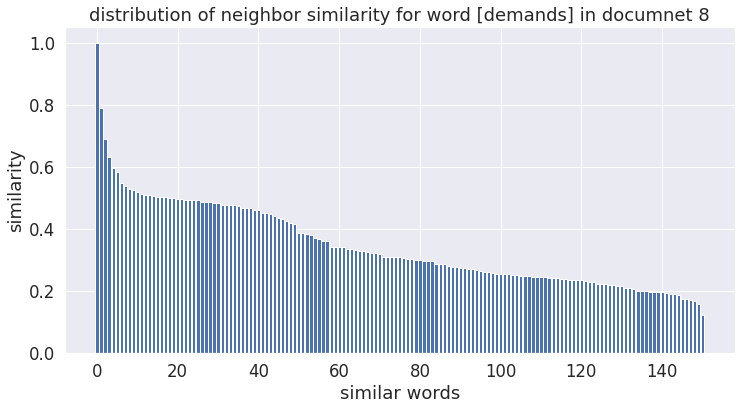

7   -->  communist
1690
[0.6609918, 0.64791095, 0.6023033, 0.5636674, 0.5544271, 0.5393106, 0.53139424, 0.51932704, 0.5141708, 0.50508446, 0.4727879, 0.47088775, 0.46992624, 0.46199763, 0.4427944, 0.43143436, 0.43031412, 0.42884663, 0.4283106, 0.4276629, 0.41930556, 0.4184123, 0.4155898, 0.41366512, 0.41207469, 0.40729445, 0.40425733, 0.399292, 0.39421317, 0.3923846, 0.39229035, 0.3910663, 0.3897057, 0.38592404, 0.38429457, 0.38293707, 0.38019997, 0.3801425, 0.37732264, 0.36869246, 0.3644023, 0.36331338, 0.3616226, 0.36042148, 0.35981756, 0.35670137, 0.35470796, 0.35456437, 0.35326713, 0.34941834, 0.34876668, 0.34531516, 0.34507936, 0.34246665, 0.34157148, 0.3393783, 0.33868238, 0.33868194, 0.3384279, 0.33827597, 0.33404422, 0.33366853, 0.3324064, 0.33235902, 0.3270527, 0.32704026, 0.3266496, 0.3239485, 0.31878287, 0.31798056, 0.3163341, 0.31599563, 0.31562635, 0.31490004, 0.31416246, 0.31218973, 0.3107531, 0.3093205, 0.30715486, 0.30610716, 0.30528003, 0.3038694, 0.30161256, 0.3015045

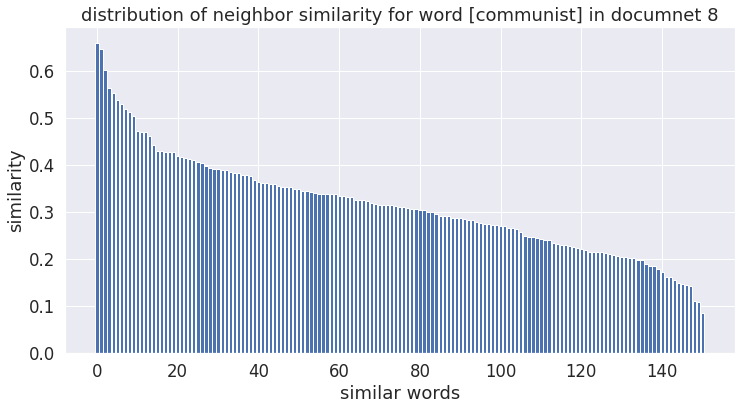

8   -->  party
1690
[0.7470963, 0.68408954, 0.6740705, 0.6686492, 0.55715334, 0.55634487, 0.5418134, 0.53917927, 0.52802944, 0.52508485, 0.5250788, 0.5193924, 0.51880836, 0.51693547, 0.51637566, 0.51155686, 0.50760126, 0.5013776, 0.48379382, 0.4726683, 0.46552902, 0.45083907, 0.4500038, 0.44998837, 0.4460061, 0.43035018, 0.42789525, 0.4265194, 0.42061102, 0.41584858, 0.41548812, 0.41439995, 0.41177022, 0.41149318, 0.40957117, 0.40806943, 0.40112716, 0.39970022, 0.3989817, 0.39883065, 0.3981772, 0.39512837, 0.39396566, 0.3922817, 0.3916423, 0.391534, 0.39145058, 0.381254, 0.3788473, 0.3742786, 0.3731088, 0.36800292, 0.36736163, 0.36630437, 0.360013, 0.3560315, 0.3545179, 0.3530212, 0.35297832, 0.35172665, 0.3501358, 0.3480482, 0.340042, 0.33910298, 0.33772045, 0.33593082, 0.33214617, 0.33060646, 0.3300155, 0.32867342, 0.32787386, 0.3256989, 0.32259285, 0.3221506, 0.3221479, 0.3183009, 0.31765032, 0.31701386, 0.31014138, 0.30967838, 0.30873734, 0.30707723, 0.3067332, 0.3067255, 0.3060519

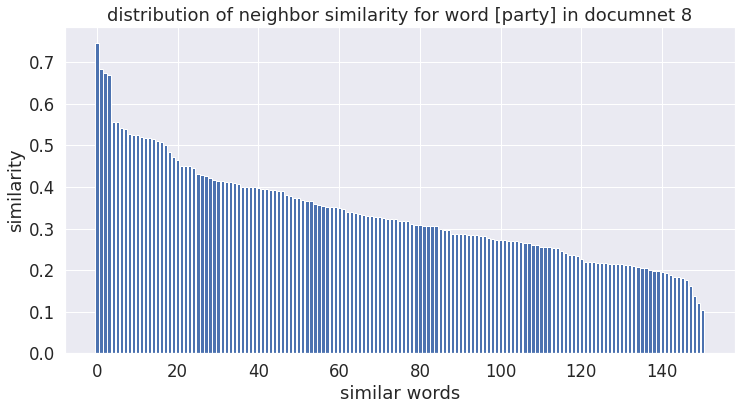

9   -->  dissolve
1690
[1.0, 0.83663535, 0.6955949, 0.63957924, 0.59685826, 0.5929189, 0.5770352, 0.5747213, 0.5457735, 0.53983784, 0.5253833, 0.5242518, 0.5160159, 0.48628622, 0.47616267, 0.46943474, 0.46923864, 0.46845755, 0.46358514, 0.45016924, 0.4406569, 0.43621895, 0.43423244, 0.4338295, 0.4324887, 0.43033075, 0.4300603, 0.42664397, 0.42218658, 0.42169023, 0.41942358, 0.41616327, 0.41173142, 0.40357643, 0.40287894, 0.3955449, 0.39496958, 0.39380804, 0.38979408, 0.384403, 0.38383722, 0.3826515, 0.38246942, 0.3789043, 0.3732407, 0.3654254, 0.35913557, 0.3571778, 0.3560688, 0.34952164, 0.34869722, 0.34457827, 0.33926916, 0.33576053, 0.3353033, 0.3328039, 0.33055413, 0.32202843, 0.3208003, 0.31539282, 0.31131965, 0.30208412, 0.30154163, 0.3008492, 0.29966176, 0.296634, 0.29647285, 0.29187876, 0.2911973, 0.28783083, 0.28774464, 0.28582478, 0.2858203, 0.2856953, 0.28507173, 0.28488258, 0.28273165, 0.278445, 0.27640563, 0.27524152, 0.27389324, 0.27353394, 0.27325514, 0.27020454, 0.26958

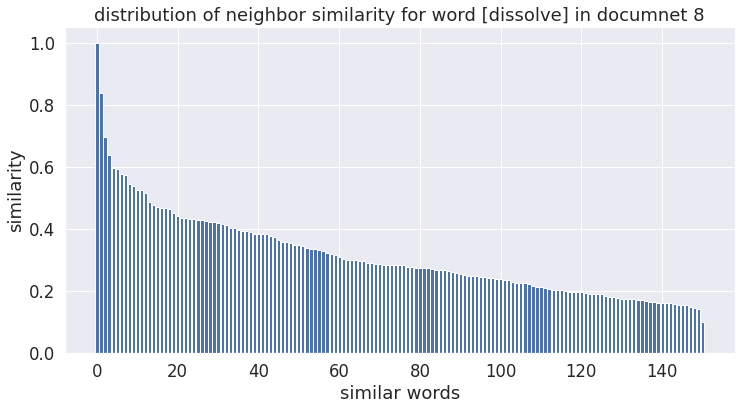

12   -->  top
1690
[1.0000001, 0.6853763, 0.6624005, 0.64264417, 0.63507843, 0.6349735, 0.63151646, 0.614651, 0.569148, 0.5629567, 0.5623677, 0.55064327, 0.54295516, 0.5301298, 0.5294337, 0.5209422, 0.5173818, 0.50957274, 0.506327, 0.5016002, 0.49566317, 0.49493074, 0.4945587, 0.48822123, 0.4875239, 0.48628622, 0.4834633, 0.4831104, 0.47898316, 0.47842103, 0.4780587, 0.47265336, 0.47183508, 0.47102693, 0.46068645, 0.4509548, 0.4473657, 0.44434583, 0.43902868, 0.43632436, 0.43411538, 0.43328318, 0.43301016, 0.42999774, 0.4287293, 0.42707443, 0.42665765, 0.42419022, 0.41190776, 0.4087435, 0.40706238, 0.39587563, 0.39041767, 0.37746084, 0.36512163, 0.32965893, 0.32896662, 0.32816976, 0.3249345, 0.32424092, 0.32423002, 0.32166642, 0.3107338, 0.3028117, 0.2997672, 0.2968433, 0.29638976, 0.2853847, 0.2828151, 0.28267086, 0.28058136, 0.2798947, 0.27205828, 0.27203006, 0.271927, 0.2696958, 0.2687608, 0.266634, 0.26398754, 0.2622273, 0.2619303, 0.25971356, 0.25950533, 0.2592078, 0.2591471, 0.25

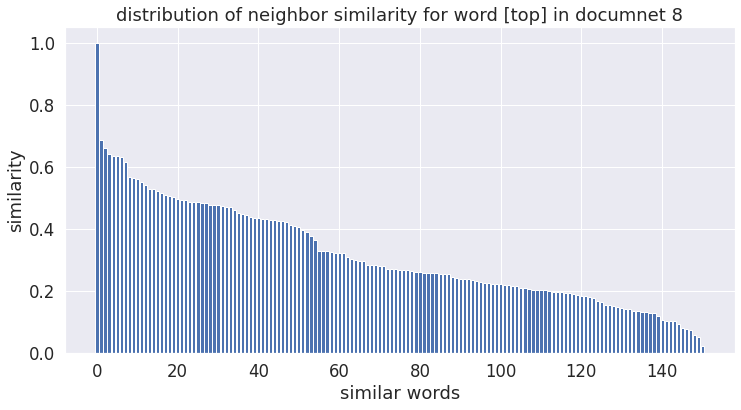

13   -->  officials
1690
[0.8329692, 0.7075834, 0.6671872, 0.658411, 0.6442654, 0.63314396, 0.5696471, 0.56623524, 0.5587959, 0.5422344, 0.5349134, 0.52645504, 0.51478535, 0.5139065, 0.510404, 0.5072354, 0.4930524, 0.4929636, 0.4915773, 0.48630553, 0.47849554, 0.4781133, 0.47347787, 0.4698666, 0.46700224, 0.4664423, 0.46542907, 0.46366492, 0.4603588, 0.4583574, 0.4561, 0.45583904, 0.4554031, 0.45359018, 0.45091504, 0.44681996, 0.4446454, 0.44092417, 0.44031724, 0.43881035, 0.4233833, 0.41571394, 0.4143727, 0.4104089, 0.40801203, 0.40723377, 0.40514266, 0.40448314, 0.37677273, 0.37647825, 0.37507772, 0.37399793, 0.37325424, 0.3708375, 0.3629161, 0.35311896, 0.33619285, 0.329198, 0.32601148, 0.31717408, 0.31455743, 0.31250882, 0.30513278, 0.3037514, 0.30342352, 0.3005287, 0.29902232, 0.29897994, 0.29473937, 0.28731525, 0.28455567, 0.28176975, 0.28164646, 0.27750418, 0.27725962, 0.2772329, 0.27605838, 0.27558637, 0.2755835, 0.27528533, 0.27325755, 0.2721038, 0.2703708, 0.2692767, 0.269044

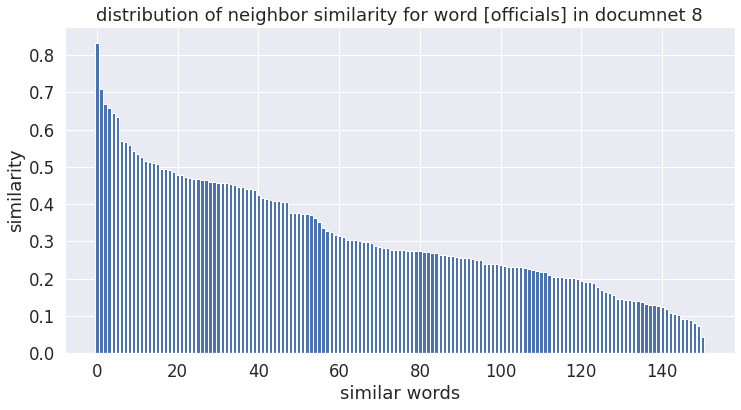

16   -->  country
1690
[0.7733132, 0.7682105, 0.6666355, 0.6016776, 0.5842568, 0.5677165, 0.5497873, 0.5496445, 0.54936826, 0.5458975, 0.54438066, 0.54245526, 0.54022217, 0.53934693, 0.53277314, 0.52666134, 0.51494944, 0.5138246, 0.5115487, 0.50784135, 0.5049746, 0.49712217, 0.49591014, 0.48829824, 0.48677197, 0.48554164, 0.48540345, 0.48174196, 0.4787799, 0.47736245, 0.47577527, 0.47504967, 0.47154373, 0.46847156, 0.46167397, 0.45265824, 0.45174658, 0.4501618, 0.4466012, 0.44603693, 0.44199616, 0.4417624, 0.43849188, 0.43516904, 0.433576, 0.43282217, 0.4264238, 0.4206692, 0.4175556, 0.41336903, 0.40724683, 0.4043122, 0.40248275, 0.39756864, 0.39685807, 0.3928366, 0.39123616, 0.358289, 0.3577521, 0.35635233, 0.3539598, 0.35230082, 0.3425981, 0.3418147, 0.34140754, 0.33740762, 0.33654648, 0.33557856, 0.3332482, 0.33184564, 0.32955176, 0.3234411, 0.32006228, 0.31521833, 0.3093624, 0.3064362, 0.3058215, 0.29506493, 0.28928608, 0.28791296, 0.2878055, 0.28653967, 0.28605542, 0.28529465, 0.2

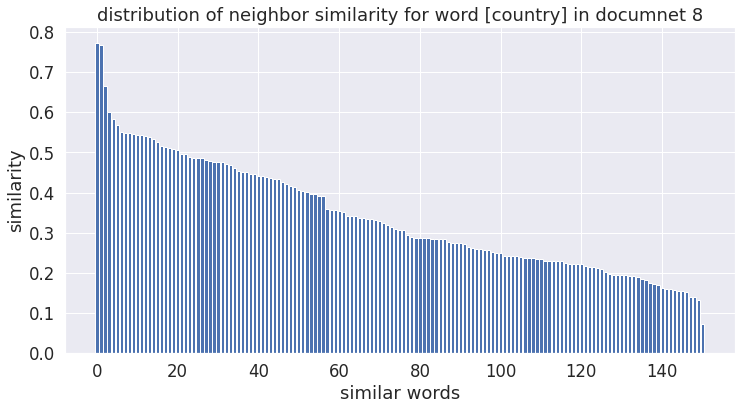

19   -->  old
1690
[0.7752826, 0.7059691, 0.6965604, 0.60314834, 0.5991158, 0.5738953, 0.5513319, 0.5448009, 0.5438962, 0.54008, 0.5386481, 0.53760606, 0.528144, 0.51977515, 0.51599073, 0.5000421, 0.49150115, 0.48583567, 0.478213, 0.4776374, 0.47509286, 0.4735967, 0.47239405, 0.47180736, 0.47133592, 0.46971908, 0.4692797, 0.46799394, 0.46167448, 0.4600916, 0.4592326, 0.45851362, 0.45750308, 0.45056802, 0.45013058, 0.4469948, 0.44197595, 0.43867242, 0.43644434, 0.4311878, 0.43079317, 0.4285987, 0.42700198, 0.4236544, 0.41821507, 0.41470125, 0.41048092, 0.4094455, 0.4069924, 0.40210003, 0.40058857, 0.39788032, 0.39687833, 0.39486822, 0.38013202, 0.37246418, 0.36916816, 0.36038852, 0.35714516, 0.35633522, 0.35531956, 0.34911174, 0.34251, 0.3424601, 0.3418523, 0.33866572, 0.33580697, 0.3336612, 0.3307432, 0.32316065, 0.31984913, 0.31932583, 0.318255, 0.3181107, 0.31613708, 0.31540167, 0.3092944, 0.3078593, 0.30449176, 0.30234048, 0.29818988, 0.2935015, 0.29269406, 0.28742263, 0.2814479, 0.

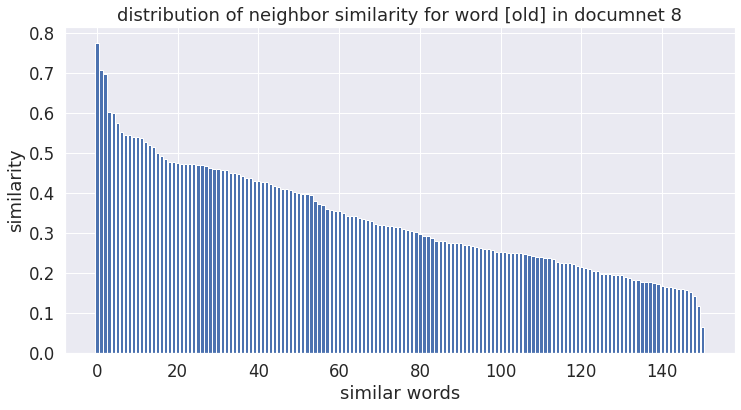

20   -->  order
1690
[0.99999976, 0.6548056, 0.64264417, 0.5960602, 0.547132, 0.5224021, 0.51963234, 0.5168937, 0.5137736, 0.5092243, 0.5088503, 0.5054389, 0.497941, 0.4918108, 0.48827437, 0.47882527, 0.47616267, 0.46339908, 0.46006185, 0.4590725, 0.4587698, 0.45486432, 0.4545106, 0.44855738, 0.44643766, 0.44535634, 0.44356176, 0.4421244, 0.4417318, 0.43756166, 0.43402472, 0.43252984, 0.4290098, 0.42551142, 0.4212499, 0.42032215, 0.41467553, 0.41372514, 0.4126796, 0.4125898, 0.4095109, 0.40395474, 0.4021832, 0.40041417, 0.40019885, 0.39668775, 0.39083734, 0.38988546, 0.3867002, 0.38287705, 0.38041466, 0.37972176, 0.37613297, 0.3750006, 0.36089015, 0.3548231, 0.3524808, 0.34418276, 0.34102207, 0.3409245, 0.33432227, 0.32908338, 0.32444558, 0.32330638, 0.32265776, 0.32188416, 0.31861567, 0.31813174, 0.31551966, 0.3101644, 0.3093222, 0.30787572, 0.3060824, 0.30446643, 0.30229023, 0.29840925, 0.29677206, 0.29399616, 0.29303384, 0.29229903, 0.2883997, 0.28743863, 0.2853675, 0.28495115, 0.28

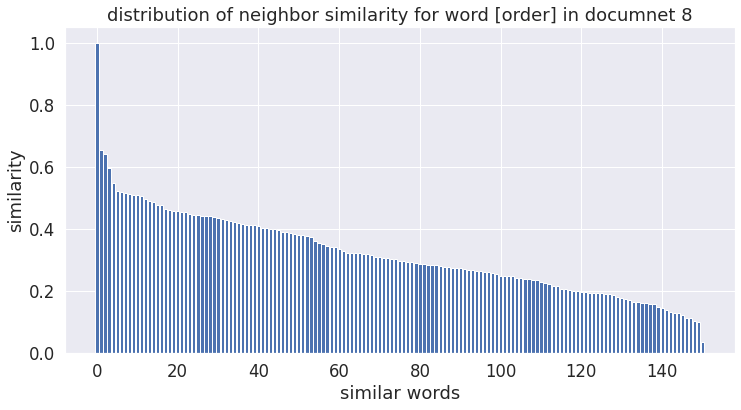

21   -->  say
1690
[1.0, 0.7153697, 0.7138336, 0.65861154, 0.614651, 0.59040153, 0.54608953, 0.54190934, 0.53116155, 0.5310738, 0.5269363, 0.51992834, 0.51662815, 0.5088503, 0.5060918, 0.49175492, 0.46943474, 0.46813595, 0.46730244, 0.4639928, 0.46395704, 0.46386325, 0.46139598, 0.45924628, 0.45445955, 0.44179952, 0.43681583, 0.41829002, 0.41567832, 0.40998933, 0.40931383, 0.40438363, 0.40339375, 0.40055013, 0.39807022, 0.3943124, 0.38772786, 0.3868209, 0.3866951, 0.37668723, 0.3761765, 0.37326658, 0.3646796, 0.3613168, 0.35073948, 0.34723306, 0.34679344, 0.3386994, 0.33611512, 0.3345369, 0.32759553, 0.3209473, 0.31622118, 0.30850422, 0.301053, 0.29711303, 0.29672718, 0.27852514, 0.27838498, 0.27274263, 0.26659775, 0.26428908, 0.25838068, 0.25615516, 0.25600013, 0.25192702, 0.25071833, 0.24990298, 0.24869898, 0.24444267, 0.24409127, 0.24262911, 0.24051027, 0.2399111, 0.23285186, 0.23217376, 0.23199679, 0.23110479, 0.23102762, 0.22947164, 0.22928056, 0.2291502, 0.22603503, 0.22581008, 0

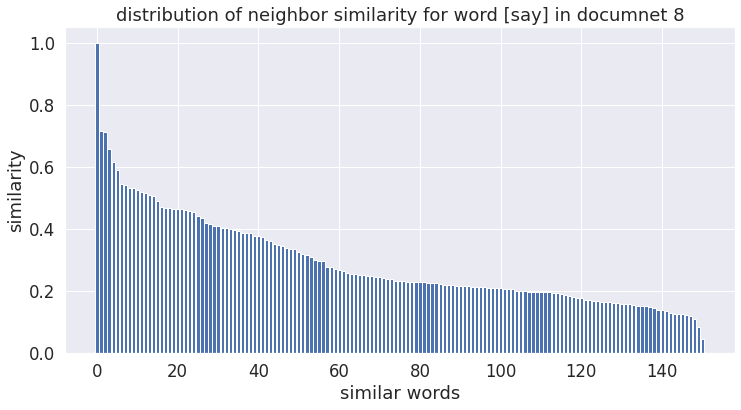

24   -->  call
1690
[1.0, 0.73612064, 0.66708267, 0.65861154, 0.6251221, 0.6235544, 0.61906886, 0.5457735, 0.5271974, 0.515806, 0.50716686, 0.4974278, 0.49526003, 0.48843223, 0.4834633, 0.48311225, 0.47237766, 0.46943888, 0.4672162, 0.44855738, 0.4461884, 0.4405465, 0.4368912, 0.42835099, 0.4254526, 0.42382056, 0.413001, 0.40648654, 0.39136243, 0.3881997, 0.37870738, 0.37625033, 0.37121812, 0.36879686, 0.36008573, 0.36005026, 0.35960186, 0.35853726, 0.3423734, 0.34057486, 0.3371106, 0.32977596, 0.32952762, 0.32946244, 0.3281167, 0.32568064, 0.31957024, 0.31911707, 0.3189537, 0.31890178, 0.30581462, 0.30331516, 0.2986862, 0.28623924, 0.28614342, 0.28369513, 0.28040266, 0.28007466, 0.2791646, 0.27891776, 0.27667606, 0.27114266, 0.27021176, 0.2697563, 0.26076847, 0.25841653, 0.25747973, 0.2574268, 0.25713015, 0.25508502, 0.25503153, 0.25303215, 0.25159925, 0.24298078, 0.23926567, 0.23671238, 0.23275611, 0.23220564, 0.23126587, 0.22962411, 0.22911374, 0.2268099, 0.2257323, 0.22451496, 0.22

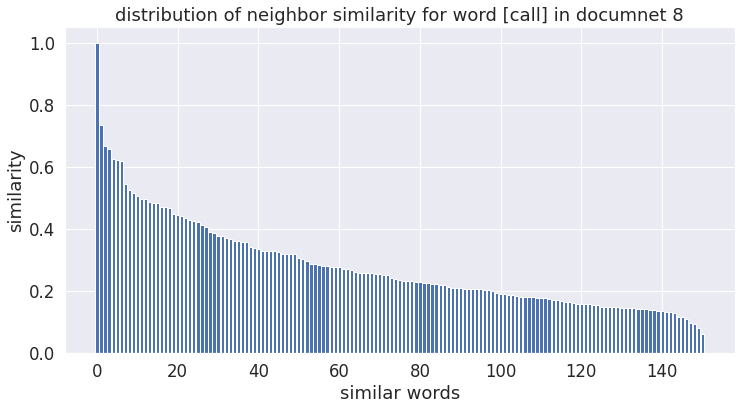

26   -->  special
1690
[0.7808149, 0.71113515, 0.62304187, 0.61951566, 0.61906946, 0.57196, 0.5551246, 0.53418446, 0.5338907, 0.5329722, 0.5298815, 0.527847, 0.52756345, 0.5270579, 0.52562547, 0.52472544, 0.5230173, 0.52157474, 0.5207427, 0.5154934, 0.5138017, 0.50333846, 0.502185, 0.49346828, 0.49069634, 0.489066, 0.48742267, 0.47044072, 0.46016127, 0.46012646, 0.45228708, 0.44651324, 0.42361176, 0.4199821, 0.4095472, 0.40923923, 0.4087398, 0.40722722, 0.3991606, 0.39842466, 0.39796728, 0.3940228, 0.39320564, 0.38298672, 0.38262638, 0.3818643, 0.37719035, 0.37304896, 0.3729834, 0.36902952, 0.36532664, 0.36390316, 0.35703635, 0.3503895, 0.35025215, 0.34315968, 0.3418588, 0.34149778, 0.33999866, 0.32713386, 0.32600027, 0.321974, 0.31949523, 0.31671143, 0.3159567, 0.31117857, 0.3095421, 0.3086474, 0.30593896, 0.3056582, 0.3023206, 0.30193293, 0.29986686, 0.29911894, 0.29652458, 0.29607195, 0.29502785, 0.29376006, 0.2911365, 0.28737497, 0.2867028, 0.28647602, 0.28567848, 0.2850257, 0.2839

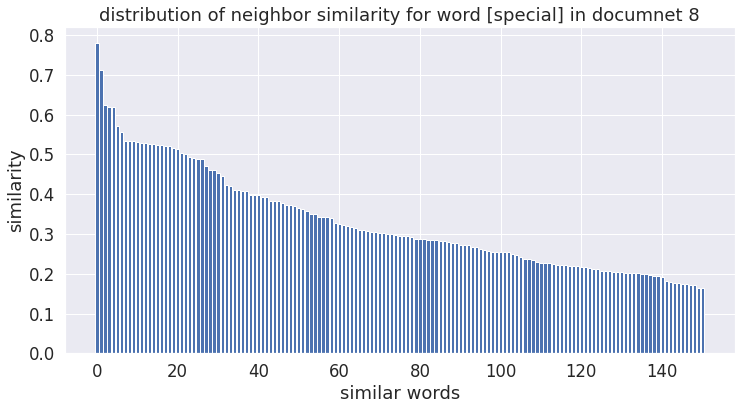

27   -->  congress
1690
[0.78475106, 0.67065835, 0.6621171, 0.6064652, 0.5904523, 0.58709, 0.58522296, 0.58238703, 0.5705386, 0.56856793, 0.56317663, 0.54633546, 0.54249007, 0.5377693, 0.5358421, 0.53499377, 0.5334828, 0.531776, 0.52155143, 0.514705, 0.5127865, 0.50648546, 0.49867052, 0.4951923, 0.4947297, 0.49310303, 0.48911405, 0.4823349, 0.47130057, 0.4660174, 0.45709294, 0.4515186, 0.44744152, 0.44735998, 0.44632307, 0.43028128, 0.41832885, 0.41744697, 0.41703266, 0.41696024, 0.41147274, 0.41054916, 0.41045022, 0.40021783, 0.3979553, 0.39618304, 0.39581463, 0.3916039, 0.3866613, 0.38592947, 0.37452197, 0.3719803, 0.36904868, 0.36604506, 0.3612299, 0.3594362, 0.3581674, 0.35797808, 0.35727525, 0.34940812, 0.34788203, 0.3468372, 0.3458237, 0.34508777, 0.34425014, 0.3368616, 0.33305988, 0.33075148, 0.3300118, 0.32792708, 0.32057422, 0.31919736, 0.31899226, 0.31644845, 0.31626588, 0.31503674, 0.31310678, 0.3130895, 0.30865097, 0.3072362, 0.3039737, 0.3029381, 0.29890886, 0.29482, 0.294

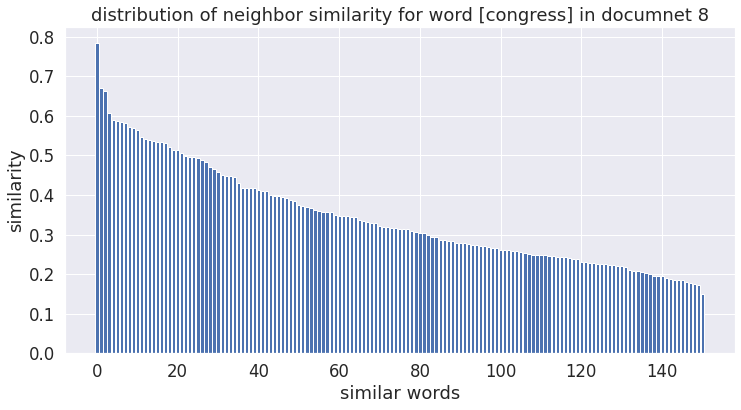

29   -->  di
1690
[1.0000002, 0.8739591, 0.8287481, 0.65444195, 0.6439778, 0.5929189, 0.55607986, 0.5186891, 0.51759315, 0.5091754, 0.49557635, 0.47207636, 0.4687295, 0.4634844, 0.45780724, 0.45732266, 0.45021713, 0.4477617, 0.44512242, 0.44152862, 0.44073677, 0.4374191, 0.4368553, 0.4315516, 0.42017597, 0.41870695, 0.41835433, 0.4148767, 0.413001, 0.4127543, 0.41172105, 0.4101014, 0.40706238, 0.40696698, 0.40689752, 0.4068934, 0.4054885, 0.40454432, 0.4044602, 0.40074307, 0.40041697, 0.3998841, 0.3995083, 0.39847705, 0.3976267, 0.3941118, 0.39320514, 0.39115933, 0.39112023, 0.39051393, 0.3903001, 0.39000607, 0.38988546, 0.38964918, 0.3868209, 0.38564324, 0.38423333, 0.38351673, 0.38308358, 0.38241544, 0.38102257, 0.37695035, 0.37566832, 0.37497908, 0.3734187, 0.37112966, 0.36969015, 0.3682812, 0.368164, 0.36603165, 0.36519873, 0.36254346, 0.35942185, 0.35877156, 0.35832286, 0.35661972, 0.35522383, 0.35446197, 0.35223266, 0.3521831, 0.34989893, 0.3498081, 0.34857413, 0.34760827, 0.3473

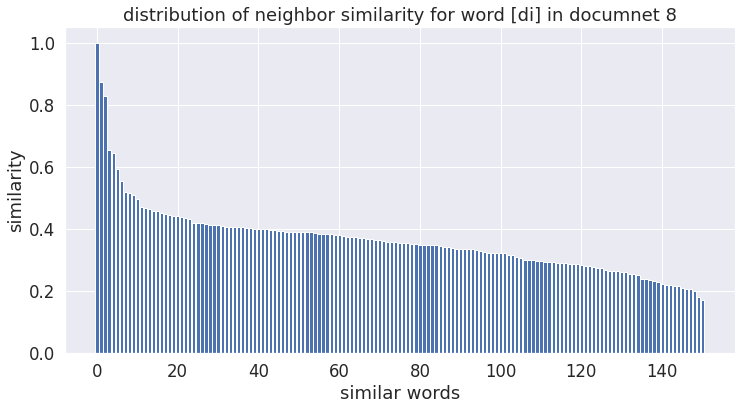

30   -->  ##sman
1690
[1.0000001, 0.8739591, 0.80633944, 0.65047276, 0.6205399, 0.5747213, 0.5745721, 0.52724284, 0.52066815, 0.50412774, 0.49950403, 0.4962029, 0.48896855, 0.4847361, 0.4767567, 0.4762509, 0.4669794, 0.46182418, 0.46122313, 0.4591397, 0.4574076, 0.45660245, 0.4541748, 0.4541183, 0.4532536, 0.4508705, 0.45022893, 0.44971472, 0.4466235, 0.4464027, 0.44370526, 0.44218272, 0.44068247, 0.4369648, 0.43487442, 0.4327541, 0.43174288, 0.43064684, 0.42916167, 0.42741627, 0.42503017, 0.42392954, 0.42382056, 0.42353946, 0.42307788, 0.42174792, 0.41921854, 0.41839305, 0.41239196, 0.4093321, 0.40423572, 0.40386462, 0.40339375, 0.401254, 0.39776608, 0.3961439, 0.39608052, 0.39557138, 0.39294875, 0.3921211, 0.39140815, 0.38849455, 0.38587743, 0.385539, 0.38528952, 0.38312805, 0.38133216, 0.3802199, 0.3794664, 0.3779201, 0.37746084, 0.37626997, 0.37601689, 0.3753373, 0.37505728, 0.37449712, 0.3734514, 0.3668235, 0.36468518, 0.36374128, 0.3632865, 0.36089015, 0.35855493, 0.35671583, 0.3

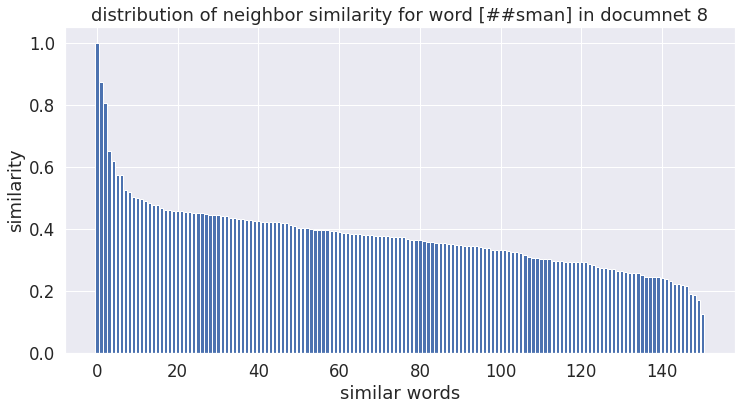

31   -->  ##tle
1690
[1.0, 0.8287481, 0.80633944, 0.6955949, 0.6643315, 0.6553534, 0.64987695, 0.5456721, 0.51168984, 0.51090574, 0.49948487, 0.49526003, 0.49432573, 0.49122632, 0.48718128, 0.48455024, 0.4817744, 0.47701007, 0.47241446, 0.47102693, 0.4661691, 0.46324563, 0.458313, 0.45577794, 0.45445955, 0.44596052, 0.44337428, 0.44179147, 0.43402472, 0.43352038, 0.43338028, 0.43221605, 0.42676157, 0.42672575, 0.42244005, 0.41722876, 0.4164849, 0.4124305, 0.40917045, 0.40893838, 0.40626365, 0.40525848, 0.40432203, 0.40400055, 0.4030679, 0.40262705, 0.40101516, 0.4008286, 0.39915076, 0.39843097, 0.39196312, 0.38838857, 0.38814783, 0.38788766, 0.38663656, 0.3857093, 0.37509692, 0.37411818, 0.37314978, 0.37283915, 0.3706619, 0.37047547, 0.36957037, 0.3684304, 0.36654252, 0.36307815, 0.3587281, 0.35787547, 0.35367388, 0.35331848, 0.3531626, 0.35187483, 0.35163188, 0.34985724, 0.34797797, 0.34740224, 0.3467791, 0.34642628, 0.34539998, 0.34152642, 0.3407274, 0.3339559, 0.33211488, 0.33038074

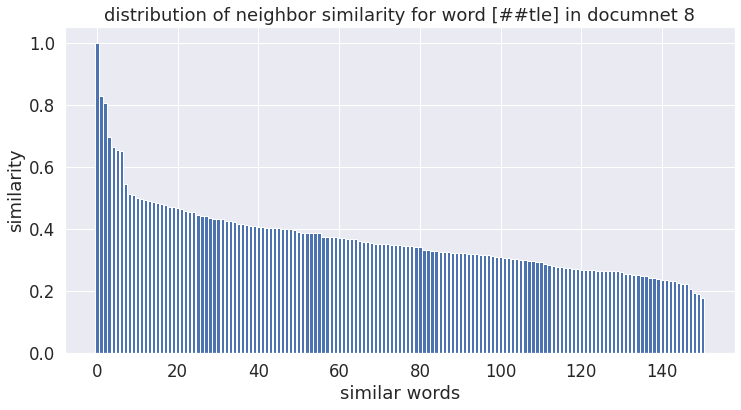

33   -->  disgrace
1690
[1.0, 0.8869847, 0.66365457, 0.6553534, 0.65047276, 0.6439778, 0.63957924, 0.5578781, 0.5571317, 0.5363713, 0.5313412, 0.5301298, 0.52370334, 0.51922804, 0.51732975, 0.5168937, 0.51654613, 0.51317203, 0.5005174, 0.4965902, 0.49654812, 0.48867938, 0.4880775, 0.48033196, 0.47748882, 0.46834293, 0.46636435, 0.45316327, 0.45188403, 0.4512665, 0.45110756, 0.44696286, 0.4371418, 0.4341126, 0.43200958, 0.42848074, 0.42805508, 0.4263767, 0.4227575, 0.42187187, 0.42123818, 0.41804433, 0.41600364, 0.4159294, 0.41416726, 0.41104227, 0.40707487, 0.40673882, 0.40648597, 0.40439114, 0.40413457, 0.4026793, 0.4026501, 0.39801034, 0.39594477, 0.3948664, 0.39356098, 0.39047378, 0.3903085, 0.38914442, 0.3869126, 0.3861403, 0.3858084, 0.38272813, 0.37233016, 0.3715632, 0.3709754, 0.37077177, 0.37048456, 0.36951658, 0.369281, 0.36805105, 0.3672371, 0.36504734, 0.3646796, 0.3623659, 0.3606775, 0.36008573, 0.35641575, 0.3562497, 0.35427976, 0.3506862, 0.3461926, 0.3458175, 0.34566987,

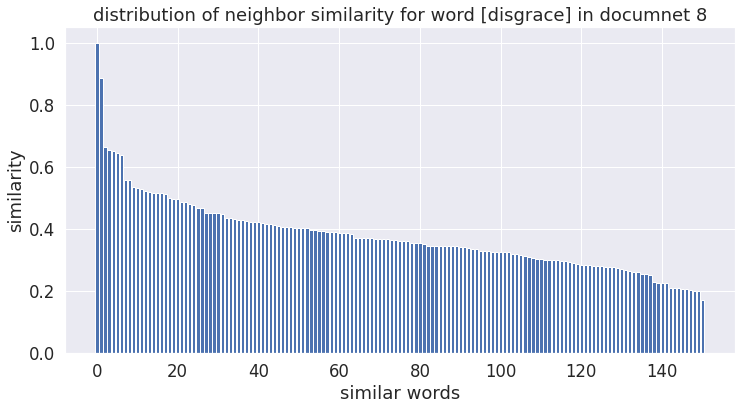

34   -->  ##d
1690
[1.0, 0.8869847, 0.6643315, 0.65444195, 0.65425754, 0.6205399, 0.59685826, 0.56111294, 0.5548567, 0.5545864, 0.55118906, 0.51904154, 0.5134275, 0.50857586, 0.5080432, 0.50560457, 0.5054389, 0.49659613, 0.49584502, 0.4945587, 0.49341816, 0.4732348, 0.47180015, 0.470378, 0.46701032, 0.46490324, 0.45744994, 0.4549061, 0.4523586, 0.4425528, 0.44198912, 0.43688282, 0.43480444, 0.43388045, 0.43298322, 0.43269855, 0.43257776, 0.4314711, 0.43029633, 0.42472067, 0.42431512, 0.42336968, 0.41886654, 0.417126, 0.41645828, 0.41480666, 0.4143291, 0.41427484, 0.4134184, 0.4097823, 0.40953255, 0.4064287, 0.4062906, 0.40373588, 0.40004823, 0.39757812, 0.3970011, 0.39471996, 0.39380896, 0.3911637, 0.39078104, 0.38699523, 0.38442138, 0.3832521, 0.38176376, 0.37986666, 0.37971818, 0.37953132, 0.37941808, 0.3765732, 0.3746181, 0.3738027, 0.37295672, 0.3708647, 0.36734375, 0.36558485, 0.3613168, 0.35946417, 0.35880128, 0.35853726, 0.3578564, 0.35783812, 0.35743666, 0.35708648, 0.35679603,

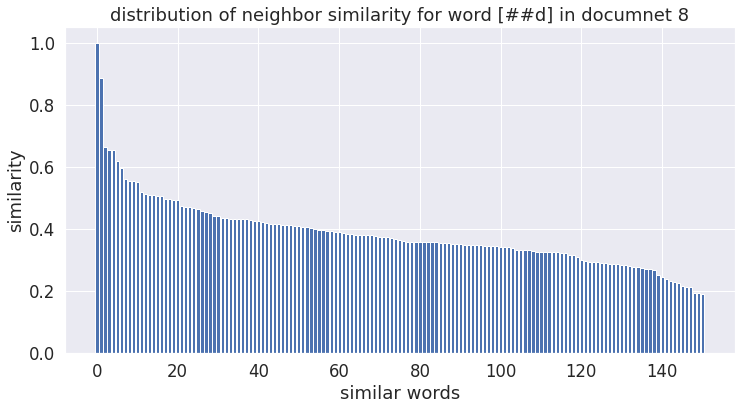

35   -->  party
1690
[0.80111736, 0.7821144, 0.6770071, 0.60214436, 0.58856535, 0.55369925, 0.5475466, 0.5459281, 0.5406238, 0.53919137, 0.534176, 0.5288548, 0.5258549, 0.52369976, 0.5235447, 0.5215112, 0.5194137, 0.5085194, 0.50334233, 0.49478316, 0.48992565, 0.4863597, 0.4812377, 0.46727636, 0.45500994, 0.45421466, 0.4532728, 0.45168078, 0.44404966, 0.4426614, 0.44013438, 0.43929794, 0.43721083, 0.43047395, 0.42136654, 0.41553214, 0.41387528, 0.4092458, 0.40847948, 0.40678954, 0.39956135, 0.39955777, 0.3959577, 0.3933602, 0.3931743, 0.39043936, 0.38954133, 0.38851035, 0.38715935, 0.3858539, 0.38072085, 0.38067293, 0.3776539, 0.3774342, 0.3741318, 0.37387472, 0.37354827, 0.37332225, 0.37113798, 0.37000555, 0.36990836, 0.36947352, 0.36768335, 0.3665874, 0.36580682, 0.364312, 0.36142635, 0.35734913, 0.35693157, 0.34466612, 0.3446272, 0.34415126, 0.3422122, 0.34028062, 0.3395142, 0.33904034, 0.33837438, 0.3359674, 0.33551618, 0.33500075, 0.33470744, 0.33451027, 0.33064294, 0.3302086, 0.3

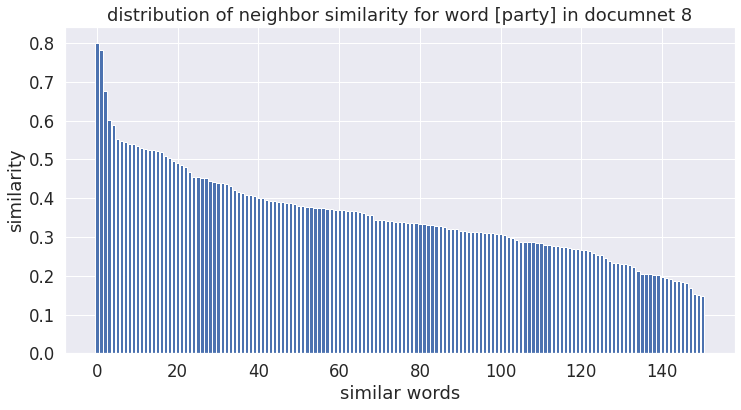

36   -->  even
1690
[0.6836081, 0.66969764, 0.613637, 0.60470283, 0.601931, 0.5959876, 0.5868324, 0.5699553, 0.56466246, 0.55781364, 0.5578083, 0.53631634, 0.532389, 0.52996695, 0.5263212, 0.52591896, 0.521789, 0.5185361, 0.51652753, 0.51141644, 0.50969994, 0.50864524, 0.50696, 0.50351876, 0.50182843, 0.50002414, 0.49400157, 0.4939696, 0.4931571, 0.4839423, 0.4731983, 0.46623474, 0.45972693, 0.45948824, 0.45869884, 0.45329934, 0.45049107, 0.4495948, 0.44786832, 0.43638793, 0.43371424, 0.43122077, 0.42636585, 0.4222653, 0.4220697, 0.41399527, 0.40986192, 0.4084574, 0.4040346, 0.40075314, 0.40020716, 0.39842638, 0.3984109, 0.39584166, 0.3943547, 0.3877929, 0.38731128, 0.38438624, 0.38255095, 0.37779152, 0.37642846, 0.3753068, 0.37508273, 0.3740531, 0.37175345, 0.36995208, 0.36908066, 0.36875844, 0.3678628, 0.36462763, 0.36406872, 0.35957277, 0.3576981, 0.35492355, 0.35155487, 0.35128096, 0.3507265, 0.34963274, 0.34810376, 0.3467422, 0.3383001, 0.33775944, 0.33587962, 0.33563995, 0.334895

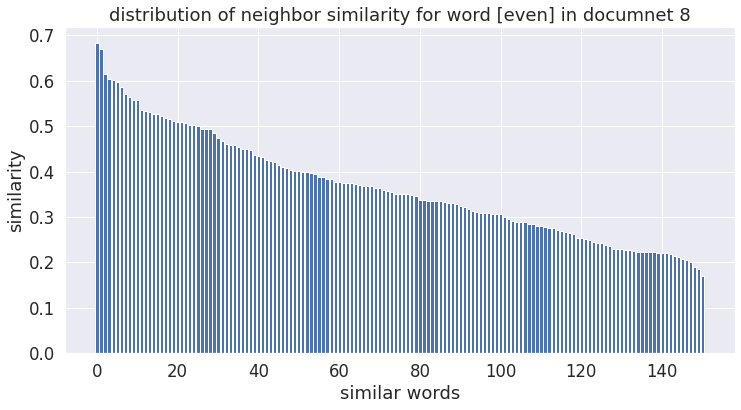

38   -->  free
1690
[0.99999994, 0.79709494, 0.61279273, 0.5642679, 0.5545864, 0.5442368, 0.5313412, 0.5253833, 0.5235249, 0.52066815, 0.51997006, 0.5186891, 0.51168984, 0.5084169, 0.50716686, 0.49402568, 0.4931698, 0.4889232, 0.48380953, 0.47878852, 0.4770788, 0.47578013, 0.4751571, 0.47380304, 0.4731202, 0.468965, 0.4538301, 0.4487048, 0.4469142, 0.44646648, 0.44643766, 0.44412774, 0.4419, 0.43644297, 0.435048, 0.43411538, 0.43274945, 0.4289419, 0.4188649, 0.41712612, 0.4115637, 0.40998933, 0.40905166, 0.4082935, 0.40769935, 0.40334642, 0.4028091, 0.40097776, 0.3982432, 0.39624053, 0.39581683, 0.38912886, 0.3876915, 0.3839733, 0.3838504, 0.3806024, 0.3801797, 0.3778082, 0.3765639, 0.37522894, 0.3732909, 0.37215853, 0.37205893, 0.3711921, 0.36988652, 0.36886352, 0.36824846, 0.368097, 0.36668774, 0.3644118, 0.3607857, 0.36007455, 0.35867792, 0.35584143, 0.34741652, 0.34717336, 0.3467314, 0.3454262, 0.34534043, 0.34475428, 0.3443783, 0.34398535, 0.34340346, 0.34216118, 0.3398785, 0.3369

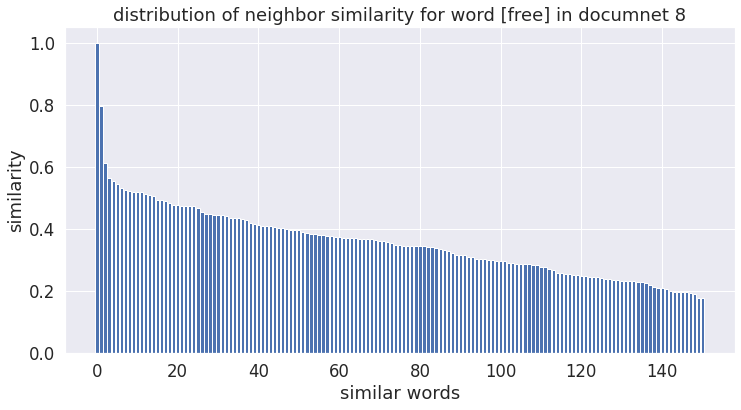

39   -->  elections
1690
[0.83522695, 0.7918801, 0.65948606, 0.55661565, 0.5412603, 0.53814757, 0.5348678, 0.5250052, 0.5140115, 0.51327217, 0.5115806, 0.50882566, 0.50548816, 0.5014984, 0.49943212, 0.4982639, 0.4932161, 0.49290723, 0.48409864, 0.4762721, 0.4682049, 0.46549782, 0.46342105, 0.45839238, 0.45273888, 0.45028126, 0.448501, 0.4458335, 0.442298, 0.44188684, 0.4414839, 0.4409207, 0.43618667, 0.4337921, 0.43023944, 0.42849082, 0.42777777, 0.4208445, 0.41580635, 0.4119357, 0.4115213, 0.408988, 0.4042591, 0.4031765, 0.40088016, 0.39823827, 0.3975134, 0.3962537, 0.3947426, 0.3914222, 0.39083904, 0.38923502, 0.3778031, 0.3759249, 0.37531534, 0.3717979, 0.3681044, 0.3678236, 0.36564165, 0.36473626, 0.36396313, 0.36225563, 0.36183214, 0.35473084, 0.35311484, 0.35281032, 0.34558338, 0.34554392, 0.34552598, 0.34519926, 0.34386358, 0.34254622, 0.34184697, 0.3417709, 0.3414045, 0.33832383, 0.3357688, 0.3348702, 0.33033863, 0.33006167, 0.32764643, 0.32431573, 0.32384023, 0.3218755, 0.3216

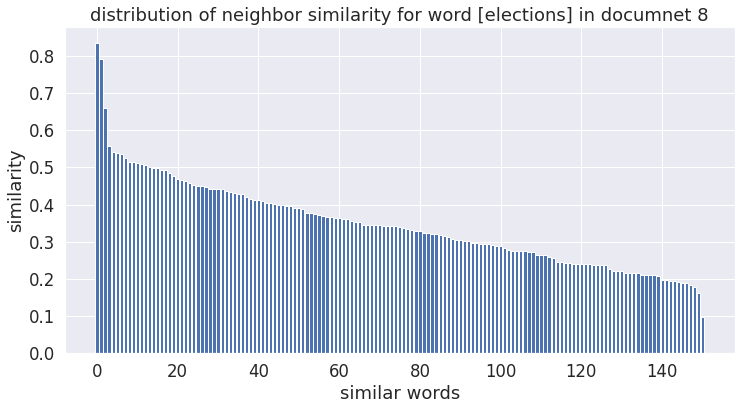

41   -->  held
1690
[0.8025123, 0.7767385, 0.7055921, 0.582131, 0.5665451, 0.5344387, 0.5153153, 0.51475245, 0.49437723, 0.49268028, 0.4769325, 0.47495675, 0.47316444, 0.46230072, 0.4608792, 0.45835543, 0.45616466, 0.44319817, 0.4340946, 0.43104005, 0.42971042, 0.42768016, 0.42338997, 0.4233293, 0.41879857, 0.41750622, 0.41708037, 0.4103647, 0.40979773, 0.4092223, 0.40751973, 0.40737322, 0.40691322, 0.40272182, 0.4018439, 0.4013511, 0.3974811, 0.39676046, 0.38240373, 0.3795198, 0.3792919, 0.37762022, 0.3758033, 0.37531346, 0.37481838, 0.37385023, 0.37203425, 0.366763, 0.36644098, 0.36605275, 0.36567622, 0.3648708, 0.36068857, 0.36024326, 0.35906696, 0.35906577, 0.35727102, 0.3563961, 0.35561436, 0.3547136, 0.35357895, 0.34804717, 0.34793437, 0.347681, 0.3449661, 0.3427669, 0.34142536, 0.34116358, 0.34038553, 0.33786017, 0.33033186, 0.33012286, 0.32771206, 0.32487115, 0.32435754, 0.32325387, 0.32154536, 0.31694758, 0.3149379, 0.31250197, 0.30850017, 0.30750912, 0.305378, 0.30316752, 0.2

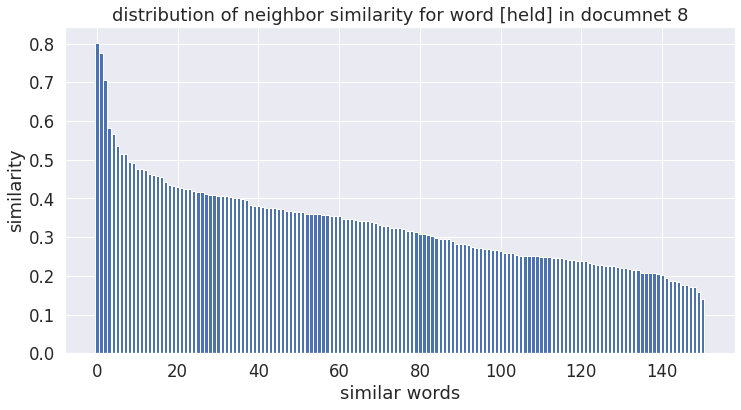

43   -->  april
1690
[0.9999998, 0.79709494, 0.56111294, 0.56072176, 0.5571317, 0.5456721, 0.5455403, 0.54044664, 0.52932245, 0.52724284, 0.5271974, 0.5242518, 0.51759315, 0.51412785, 0.51392883, 0.50814927, 0.5028374, 0.5018547, 0.49152467, 0.48887193, 0.48830375, 0.48827437, 0.4875239, 0.48315018, 0.48293284, 0.48182032, 0.48036006, 0.47962368, 0.47765106, 0.47547573, 0.46660385, 0.464057, 0.4639928, 0.4606289, 0.4568126, 0.45303202, 0.45032096, 0.44763732, 0.44548506, 0.4339735, 0.43224382, 0.42854488, 0.42279974, 0.41894507, 0.4160336, 0.41321355, 0.41197067, 0.40639025, 0.4049053, 0.40408784, 0.4029348, 0.39433342, 0.39428228, 0.39389884, 0.38878232, 0.38865846, 0.38797736, 0.3878769, 0.38712698, 0.38435605, 0.3842409, 0.37829548, 0.37767285, 0.3767559, 0.37546152, 0.36745232, 0.36659896, 0.36366165, 0.36300772, 0.36243367, 0.35395306, 0.35287744, 0.34933823, 0.3490042, 0.3473005, 0.34600142, 0.34268668, 0.33871722, 0.3375526, 0.3371926, 0.33322686, 0.33246702, 0.3316895, 0.331478

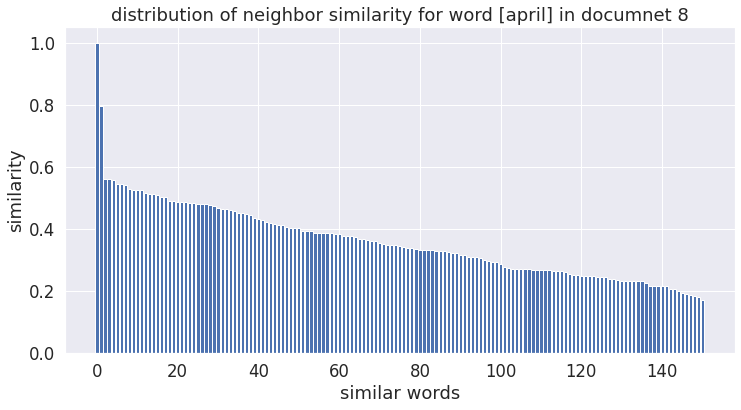

45   -->  late
1690
[0.99999994, 0.902265, 0.87077916, 0.6875559, 0.63050854, 0.61718017, 0.6123792, 0.59681666, 0.58658767, 0.5831319, 0.5629567, 0.54744047, 0.5435692, 0.53116155, 0.52637047, 0.5257169, 0.52531326, 0.5223452, 0.52175653, 0.5170903, 0.51703423, 0.5159476, 0.51303387, 0.50290567, 0.49398005, 0.49264902, 0.4918108, 0.4886641, 0.4855408, 0.48182032, 0.4798464, 0.468965, 0.468552, 0.46822792, 0.4672162, 0.44218272, 0.43957943, 0.43542987, 0.43221605, 0.41835433, 0.41713458, 0.40789104, 0.4066671, 0.40452212, 0.39768362, 0.39490297, 0.3944838, 0.39316872, 0.3911637, 0.39047378, 0.384403, 0.371311, 0.36970392, 0.36708677, 0.36692467, 0.35718358, 0.35645813, 0.3504623, 0.35023114, 0.34555143, 0.341887, 0.34122992, 0.33615896, 0.33554035, 0.33417368, 0.3326126, 0.32931572, 0.32869038, 0.32678884, 0.32056844, 0.31951988, 0.31929308, 0.31486446, 0.31061733, 0.30659348, 0.30651546, 0.30548596, 0.30441883, 0.30383125, 0.30147058, 0.2964515, 0.29640487, 0.29585275, 0.29526964, 0.2

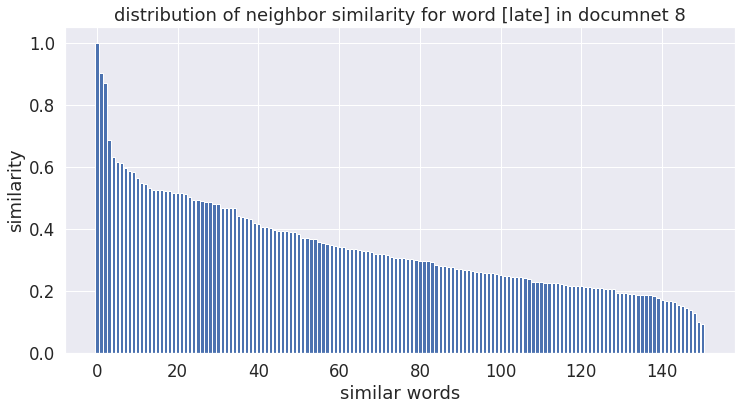

46   -->  saturday
1690
[1.0000001, 0.902265, 0.89833486, 0.6445204, 0.6211458, 0.5692854, 0.5571696, 0.5437952, 0.54295516, 0.53454804, 0.5205704, 0.517724, 0.5172856, 0.5124204, 0.51178306, 0.50814927, 0.50314564, 0.49904922, 0.497941, 0.49199474, 0.49175492, 0.4898874, 0.4897402, 0.48797247, 0.48153025, 0.47878852, 0.47845232, 0.47633937, 0.46943888, 0.44903865, 0.4469137, 0.44268763, 0.44211867, 0.43892056, 0.43832105, 0.4347794, 0.43251866, 0.4323186, 0.42941025, 0.42916167, 0.42672575, 0.4148767, 0.40413457, 0.39380896, 0.39380804, 0.3875052, 0.38585615, 0.38300925, 0.37838298, 0.3778325, 0.3550013, 0.35438454, 0.35435653, 0.35195413, 0.3484407, 0.33652186, 0.33351567, 0.33204046, 0.33013752, 0.32867426, 0.3264501, 0.3250261, 0.32122037, 0.31883088, 0.3183222, 0.31650022, 0.31589895, 0.315341, 0.31140286, 0.31092077, 0.30925363, 0.3066376, 0.30512792, 0.3032756, 0.30125135, 0.30065176, 0.29650787, 0.29533106, 0.2943337, 0.28702596, 0.28570515, 0.28400394, 0.28288573, 0.28095824, 

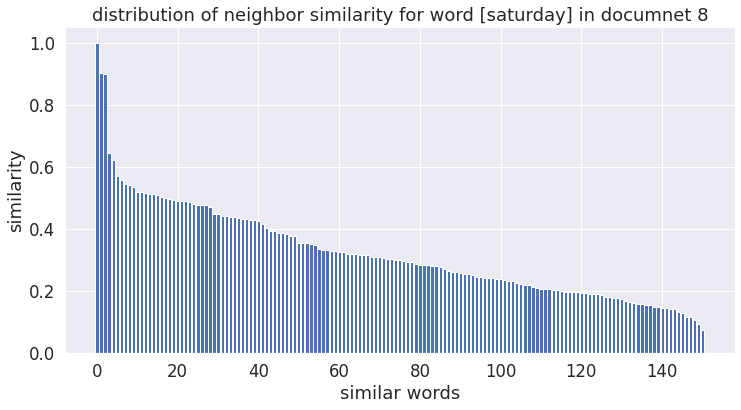

47   -->  night
1690
[1.0000001, 0.89833486, 0.87077916, 0.6821804, 0.6461118, 0.6351659, 0.60849047, 0.59358275, 0.5817977, 0.55994105, 0.5544168, 0.5529218, 0.55064327, 0.5434885, 0.52695256, 0.52463007, 0.5222424, 0.51992834, 0.519049, 0.5092243, 0.50804156, 0.50644493, 0.5041608, 0.50320834, 0.5028374, 0.49871373, 0.4974278, 0.4967214, 0.49602646, 0.49446058, 0.47380304, 0.46974623, 0.4689893, 0.46638626, 0.46327287, 0.46283945, 0.46259248, 0.458313, 0.45660245, 0.44806474, 0.44152862, 0.43480444, 0.42784214, 0.41600364, 0.40770486, 0.40163192, 0.39175826, 0.38246942, 0.37021488, 0.36982155, 0.36901975, 0.36681166, 0.36380813, 0.36370888, 0.36143962, 0.36046833, 0.35810167, 0.35640752, 0.3553186, 0.35073107, 0.35001624, 0.34593883, 0.3436373, 0.3421362, 0.3378076, 0.33621448, 0.33556348, 0.33373046, 0.3320779, 0.32827055, 0.32761678, 0.32561013, 0.325221, 0.32023528, 0.31759542, 0.31615797, 0.31384304, 0.31347746, 0.31291908, 0.31275845, 0.3124411, 0.31179884, 0.31066495, 0.3022864

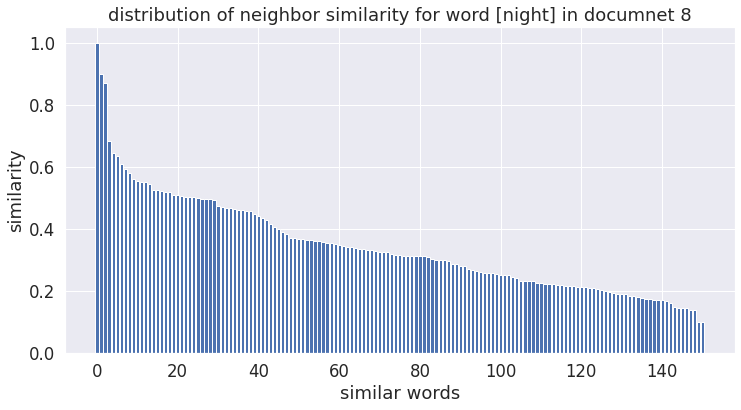

50   -->  group
1690
[1.0, 0.7022433, 0.69313395, 0.6575823, 0.6510107, 0.6461118, 0.63781935, 0.63050854, 0.60923386, 0.5779463, 0.5729994, 0.5692854, 0.569148, 0.5518899, 0.5516759, 0.5414486, 0.54086137, 0.5395357, 0.5123679, 0.5026728, 0.5026586, 0.4993526, 0.49785554, 0.49347717, 0.48856395, 0.48334798, 0.48248607, 0.47757098, 0.46868557, 0.46858057, 0.46730244, 0.45485607, 0.454742, 0.45060354, 0.44981956, 0.4421244, 0.44179147, 0.43681157, 0.42878586, 0.42848074, 0.42835099, 0.42300442, 0.41480666, 0.41440874, 0.41321355, 0.40357643, 0.39913297, 0.39861768, 0.39115933, 0.38912302, 0.3850518, 0.38277617, 0.37976867, 0.3765639, 0.3711248, 0.36492902, 0.3624912, 0.36082143, 0.35666603, 0.35539627, 0.35079467, 0.34333587, 0.34317958, 0.3393507, 0.33448303, 0.32514405, 0.32485843, 0.32167432, 0.3128308, 0.31112432, 0.3094347, 0.30681193, 0.306613, 0.3052413, 0.30476648, 0.3044219, 0.30378306, 0.30146155, 0.29527175, 0.2933367, 0.29279006, 0.29070842, 0.28918028, 0.28891546, 0.2875271

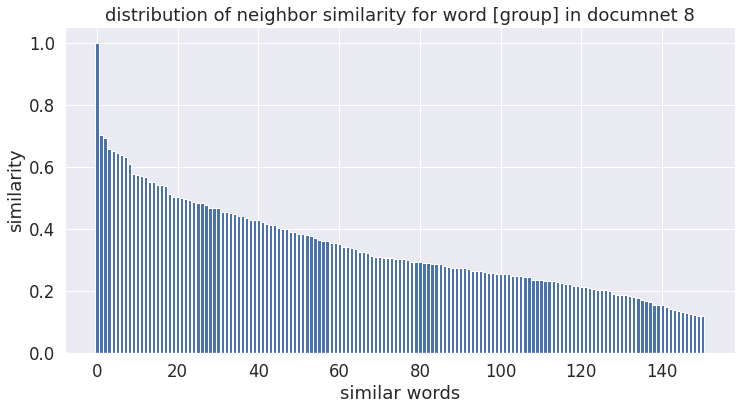

52   -->  party
1690
[0.70293516, 0.6894598, 0.66983926, 0.66830456, 0.66650957, 0.664042, 0.62248033, 0.61442035, 0.5906899, 0.56084615, 0.5596282, 0.5529086, 0.5527525, 0.5476434, 0.54459643, 0.5443396, 0.5390918, 0.5344323, 0.5336522, 0.5312222, 0.5300218, 0.529549, 0.5210204, 0.518383, 0.51758957, 0.5152206, 0.5106195, 0.5063633, 0.50525594, 0.50113565, 0.49630776, 0.4938243, 0.49359274, 0.4910872, 0.4909002, 0.48636556, 0.48635846, 0.4858501, 0.48521197, 0.47975492, 0.4746084, 0.4721672, 0.47128797, 0.46918154, 0.46699086, 0.46531498, 0.4495867, 0.44942605, 0.43795985, 0.4320145, 0.43016407, 0.43000054, 0.4291361, 0.4219478, 0.41056898, 0.38919485, 0.38152748, 0.37741736, 0.35029158, 0.350029, 0.34153432, 0.34110773, 0.33723193, 0.3329414, 0.33152232, 0.33120194, 0.32994318, 0.32939714, 0.32598656, 0.32503775, 0.3228714, 0.32286817, 0.32223696, 0.3222168, 0.3183947, 0.31680092, 0.3156574, 0.31540495, 0.30754137, 0.30206603, 0.30134982, 0.30039698, 0.29867986, 0.29866675, 0.2971873

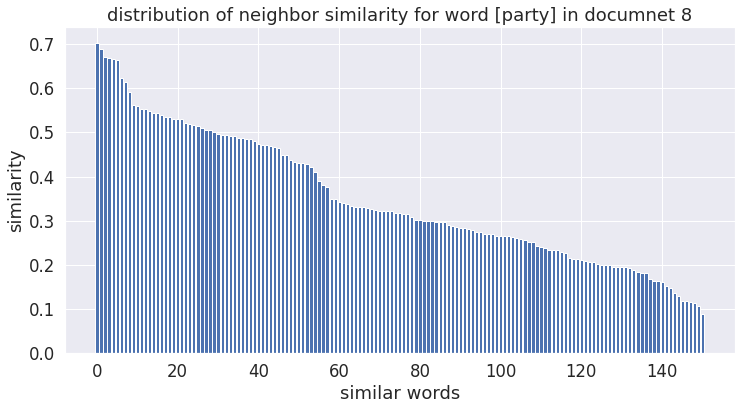

53   -->  officials
1690
[0.77493393, 0.72923464, 0.6846715, 0.6820415, 0.67421806, 0.67190313, 0.6542195, 0.6197033, 0.61445767, 0.6027638, 0.5981335, 0.5825795, 0.5811229, 0.57672197, 0.56902766, 0.56374943, 0.56030935, 0.5543919, 0.548722, 0.54663765, 0.54371345, 0.5402719, 0.53912145, 0.53690475, 0.5348928, 0.5344872, 0.5304954, 0.5291956, 0.5289988, 0.52396417, 0.5225067, 0.5195499, 0.5134473, 0.51015073, 0.5008093, 0.48099488, 0.4749546, 0.46359986, 0.45840016, 0.45647264, 0.44362327, 0.44261494, 0.44213057, 0.44067222, 0.437886, 0.43661097, 0.4359622, 0.43267202, 0.43206722, 0.42754605, 0.42554134, 0.416716, 0.41514766, 0.41471595, 0.40719718, 0.40139273, 0.39588127, 0.3949194, 0.38714296, 0.38395026, 0.38374, 0.37973744, 0.37134093, 0.36668274, 0.36505005, 0.36328757, 0.36304808, 0.36128724, 0.36113405, 0.3576647, 0.35630772, 0.3545357, 0.3541872, 0.3541584, 0.34897435, 0.34733713, 0.34728146, 0.34286892, 0.34063846, 0.33967337, 0.3366914, 0.3362131, 0.3356108, 0.33530435, 0.33

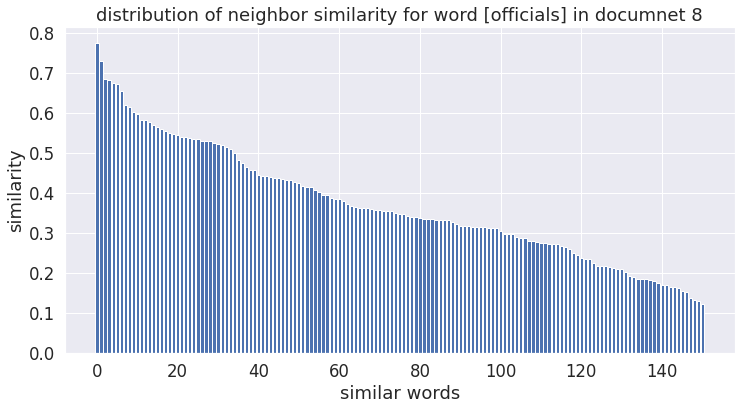

55   -->  many
1690
[0.8858489, 0.8644996, 0.8033382, 0.73939574, 0.685134, 0.67825866, 0.6407245, 0.6314744, 0.6266016, 0.6200577, 0.6176938, 0.60233676, 0.5993052, 0.5988084, 0.59645027, 0.5934496, 0.5879791, 0.5878836, 0.57450366, 0.5668115, 0.546274, 0.5448071, 0.5441135, 0.5395044, 0.5122175, 0.50894046, 0.49984303, 0.4979534, 0.49144953, 0.48011154, 0.4793464, 0.47538728, 0.47065413, 0.46409065, 0.46396852, 0.46389627, 0.46264628, 0.46212316, 0.45973328, 0.45592913, 0.45343232, 0.4526719, 0.45257744, 0.44957238, 0.4487459, 0.4455246, 0.44546103, 0.44151053, 0.4401973, 0.43742013, 0.43684843, 0.4344304, 0.4313584, 0.42863923, 0.42733955, 0.42650393, 0.42491716, 0.4246755, 0.42322516, 0.42314497, 0.41905284, 0.4179176, 0.41454896, 0.41352984, 0.413247, 0.40806907, 0.40720353, 0.4020957, 0.40102348, 0.40002462, 0.39951178, 0.39941633, 0.3981265, 0.3979025, 0.39711004, 0.39431, 0.38721186, 0.38703883, 0.38621867, 0.38369197, 0.37790287, 0.37125748, 0.36967766, 0.36683196, 0.36584356,

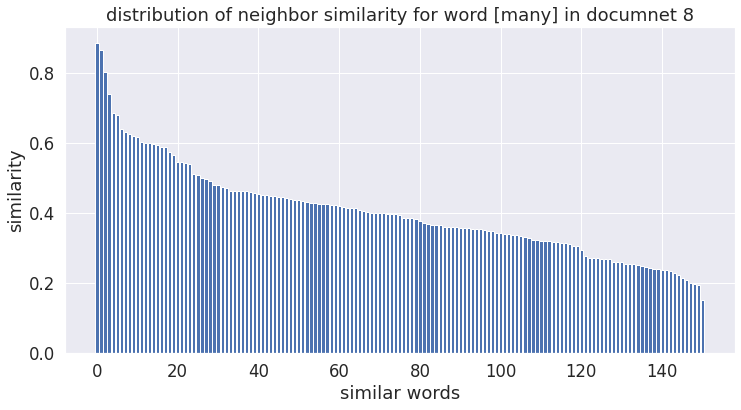

58   -->  quickly
1690
[1.0, 0.89471346, 0.83918947, 0.7399626, 0.7086254, 0.6767547, 0.66310704, 0.6593033, 0.6562919, 0.62613875, 0.6152825, 0.60923386, 0.5957749, 0.54644203, 0.5302148, 0.52175653, 0.52046597, 0.519049, 0.5141582, 0.51207876, 0.5115819, 0.50579166, 0.50560457, 0.5005174, 0.49557635, 0.48848432, 0.48718128, 0.4834466, 0.47845232, 0.4767567, 0.47382095, 0.47183508, 0.46869382, 0.4680749, 0.4667259, 0.46669197, 0.4633038, 0.46225917, 0.4602366, 0.4588703, 0.45471743, 0.44898, 0.44859636, 0.44599158, 0.4442259, 0.44326282, 0.44298226, 0.4417318, 0.43903857, 0.43851328, 0.43706208, 0.43531576, 0.42999065, 0.42854488, 0.42664397, 0.42607903, 0.42512882, 0.42032507, 0.41464245, 0.41154385, 0.4109994, 0.40732586, 0.40650138, 0.40555212, 0.40531218, 0.40516317, 0.40055013, 0.3992589, 0.39702547, 0.39624053, 0.39568934, 0.3955337, 0.39533025, 0.38507187, 0.38424605, 0.38141322, 0.38098925, 0.38066825, 0.38021252, 0.3788348, 0.37590423, 0.3743983, 0.3741091, 0.37351534, 0.3726

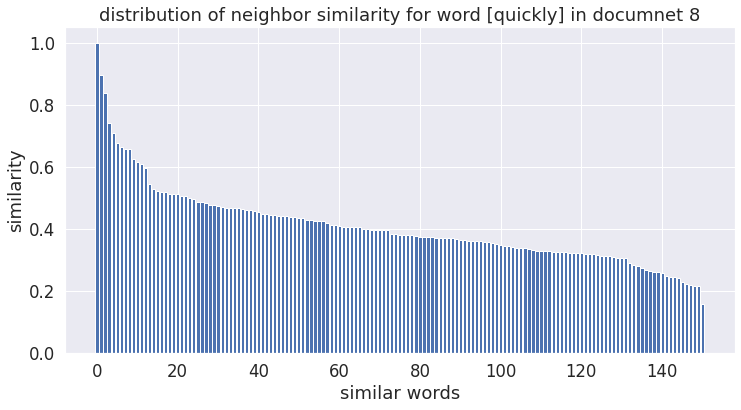

59   -->  severed
1690
[1.0, 0.89471346, 0.853229, 0.7769741, 0.7653877, 0.6973766, 0.6567654, 0.65021986, 0.6422042, 0.6250563, 0.5842955, 0.5687685, 0.5518899, 0.5147875, 0.51231, 0.5091754, 0.50186396, 0.5015111, 0.5005851, 0.49987912, 0.4965902, 0.49341816, 0.49122632, 0.49032426, 0.48896855, 0.4857515, 0.48358175, 0.48281613, 0.4807038, 0.47933453, 0.47905138, 0.468552, 0.46584114, 0.46401307, 0.46283945, 0.46196365, 0.45562455, 0.45263907, 0.45168823, 0.44962335, 0.44954672, 0.44584376, 0.44557083, 0.4410507, 0.43953258, 0.43632436, 0.4347794, 0.43192342, 0.43143222, 0.43033075, 0.4300652, 0.42877534, 0.42763188, 0.42265332, 0.42113146, 0.41467553, 0.40863544, 0.40502, 0.40345109, 0.40331584, 0.40300697, 0.40155923, 0.3982761, 0.39526737, 0.3949911, 0.39389884, 0.39323002, 0.39239594, 0.3917424, 0.39113358, 0.38828343, 0.38526875, 0.38340217, 0.3815114, 0.3798591, 0.3773675, 0.3770035, 0.37453136, 0.37326658, 0.3729785, 0.37216306, 0.371659, 0.36923203, 0.36805508, 0.36606526, 0.

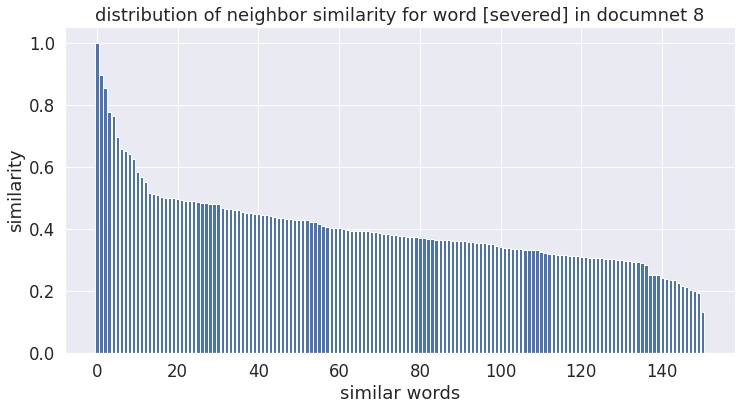

61   -->  relationship
1690
[1.0, 0.853229, 0.8468139, 0.7399626, 0.66080326, 0.63128996, 0.5933714, 0.5929167, 0.55814266, 0.5435203, 0.50906223, 0.48856395, 0.48675895, 0.48593006, 0.45744994, 0.4565302, 0.4539001, 0.45316327, 0.45242363, 0.45204994, 0.44213185, 0.43447024, 0.43301016, 0.43228823, 0.43082094, 0.4298275, 0.42783278, 0.42326215, 0.42162666, 0.42120332, 0.42105597, 0.42032215, 0.4187333, 0.41864046, 0.41449818, 0.4115814, 0.41030395, 0.41021138, 0.40696698, 0.40525848, 0.40231854, 0.39979982, 0.39950663, 0.3969976, 0.39105272, 0.3878932, 0.38702083, 0.385539, 0.38284314, 0.38185698, 0.38131395, 0.3785627, 0.37853712, 0.371311, 0.37091714, 0.36982155, 0.36709908, 0.3654254, 0.36366165, 0.3610136, 0.35738382, 0.35527784, 0.35356978, 0.35352963, 0.35149956, 0.35105073, 0.3504792, 0.34967995, 0.3484407, 0.34785324, 0.34782672, 0.3473692, 0.34622538, 0.3430963, 0.34246767, 0.3394128, 0.33633813, 0.33470684, 0.3345369, 0.33423826, 0.3331604, 0.33239096, 0.32902458, 0.3281618,

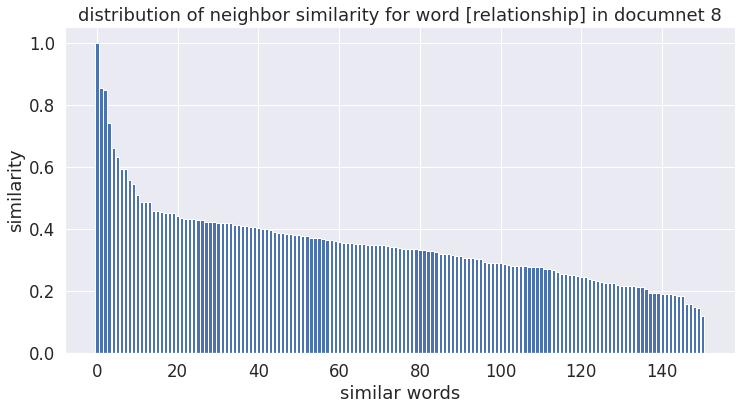

64   -->  ce
1690
[0.7415118, 0.72512114, 0.72427404, 0.71870196, 0.7137681, 0.692977, 0.69162655, 0.66528565, 0.66522074, 0.64900285, 0.6272165, 0.59698117, 0.59555835, 0.5892956, 0.5384832, 0.53611565, 0.52921367, 0.524333, 0.51936257, 0.51900774, 0.505796, 0.5035927, 0.4994185, 0.49616963, 0.49536607, 0.49193013, 0.48987097, 0.48393667, 0.4831733, 0.4784105, 0.47562003, 0.4745747, 0.47097278, 0.46999037, 0.467517, 0.46575132, 0.46569037, 0.46075872, 0.4580645, 0.4578704, 0.4577247, 0.4566783, 0.45659164, 0.45578933, 0.45373565, 0.4492345, 0.44812363, 0.44587243, 0.4447744, 0.43788075, 0.43634954, 0.43572015, 0.43543917, 0.43461448, 0.4322727, 0.4318055, 0.43105713, 0.42901906, 0.42892295, 0.4252446, 0.42211848, 0.42101493, 0.4208766, 0.420695, 0.41995347, 0.4185424, 0.41267818, 0.40571192, 0.40525946, 0.4041369, 0.40411568, 0.4034332, 0.4033622, 0.40188336, 0.39895606, 0.39645058, 0.3953275, 0.3896134, 0.38857883, 0.37291747, 0.36545378, 0.364354, 0.36312675, 0.3591237, 0.35846573, 

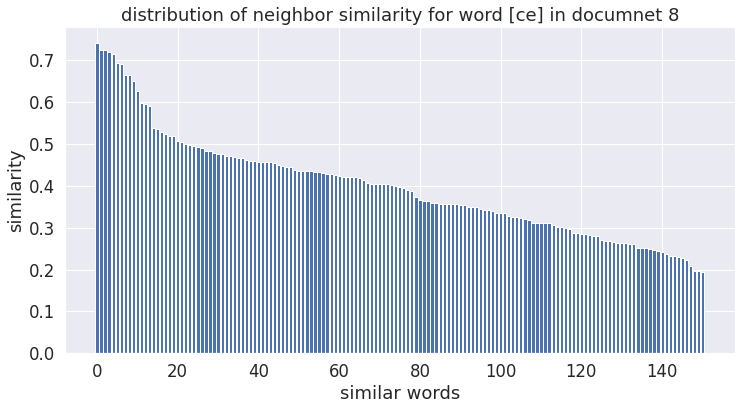

65   -->  ##aus
1690
[0.74597436, 0.73077124, 0.7185204, 0.68692404, 0.6595881, 0.65643024, 0.65371644, 0.65125823, 0.6511508, 0.63728666, 0.5988238, 0.58762485, 0.5855265, 0.578237, 0.4974066, 0.4962714, 0.48490545, 0.4809571, 0.47414982, 0.4739436, 0.4676848, 0.46395952, 0.46251547, 0.46189722, 0.46187982, 0.4601068, 0.45772776, 0.4506843, 0.44744462, 0.44162586, 0.43709096, 0.43698606, 0.43664628, 0.4337458, 0.43234223, 0.43221205, 0.43072197, 0.42891902, 0.42496157, 0.4246279, 0.41995054, 0.4191855, 0.4164863, 0.415726, 0.41458362, 0.41397607, 0.41093045, 0.40981025, 0.4059844, 0.40418357, 0.40262383, 0.40212065, 0.40172875, 0.40001193, 0.39894077, 0.3985859, 0.39398834, 0.39230317, 0.39212164, 0.39030555, 0.3883967, 0.3880669, 0.38775063, 0.38686192, 0.38115504, 0.3807513, 0.37914482, 0.3748401, 0.37206936, 0.37073267, 0.3673339, 0.36101973, 0.360686, 0.35959423, 0.35823256, 0.35799932, 0.35776544, 0.3530315, 0.35115433, 0.34961617, 0.34337416, 0.34325537, 0.3431704, 0.34028113, 0

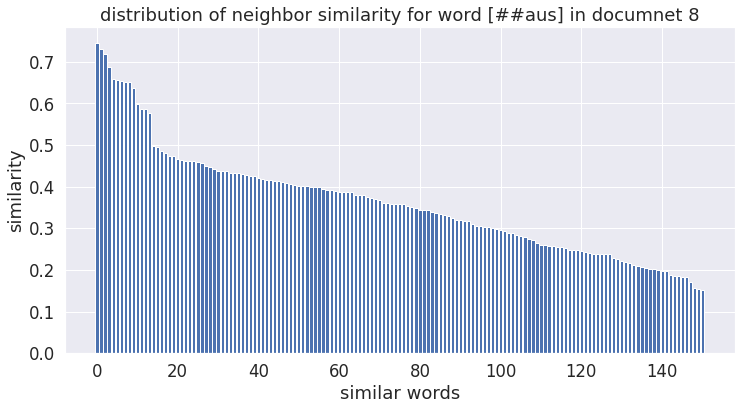

66   -->  ##escu
1690
[0.76745, 0.75785476, 0.7442316, 0.7318789, 0.7158465, 0.70856947, 0.6804302, 0.6796665, 0.6720587, 0.61196774, 0.6093924, 0.5930908, 0.5880083, 0.5871582, 0.5729538, 0.5364335, 0.5134848, 0.5083441, 0.5082178, 0.5069945, 0.4981324, 0.49610165, 0.4839724, 0.47726372, 0.47301915, 0.4723948, 0.47015643, 0.4661204, 0.46555614, 0.46158367, 0.4591965, 0.45778012, 0.45638984, 0.45608318, 0.45496064, 0.45308256, 0.45226854, 0.45222494, 0.4503179, 0.44819552, 0.44806102, 0.4444749, 0.44191805, 0.44100106, 0.43958372, 0.43874085, 0.43842945, 0.43837696, 0.43613702, 0.43546784, 0.43268338, 0.4300297, 0.42978323, 0.4281097, 0.4233687, 0.41481674, 0.41271365, 0.40706018, 0.4069726, 0.4047258, 0.40305597, 0.40182185, 0.39797586, 0.39752537, 0.39237523, 0.39211422, 0.39203662, 0.38944334, 0.38943976, 0.3865422, 0.38049573, 0.37606192, 0.37454295, 0.37015587, 0.36866152, 0.3650272, 0.36501753, 0.36232024, 0.35741735, 0.3567785, 0.3524738, 0.35172668, 0.34912002, 0.34713745, 0.34

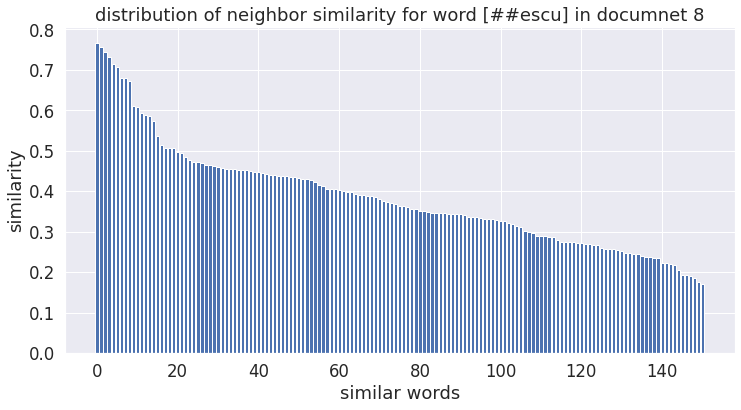

67   -->  dictatorship
1690
[0.7718593, 0.76573795, 0.75034475, 0.7410922, 0.73496133, 0.722803, 0.7197101, 0.70168257, 0.6911771, 0.6845027, 0.67697966, 0.5983834, 0.5036758, 0.4994782, 0.49903575, 0.4990053, 0.49153262, 0.49013382, 0.48982885, 0.4803623, 0.476857, 0.47620654, 0.4708779, 0.4692991, 0.46692568, 0.4667695, 0.46572244, 0.46412128, 0.4582361, 0.4578496, 0.45683157, 0.4519321, 0.44835037, 0.44800055, 0.44065794, 0.437905, 0.4331997, 0.4284076, 0.4276351, 0.42207223, 0.4183749, 0.41759372, 0.41543025, 0.4136447, 0.41292524, 0.41160744, 0.4110195, 0.4081325, 0.40523225, 0.40371668, 0.4032756, 0.40288168, 0.3970363, 0.39685372, 0.3961621, 0.39576948, 0.39553648, 0.39338958, 0.38879478, 0.3869658, 0.38208953, 0.37951308, 0.3779558, 0.37778145, 0.37593493, 0.3752975, 0.37447357, 0.37178284, 0.36439383, 0.35894045, 0.3589164, 0.3580578, 0.354087, 0.35248983, 0.34692818, 0.34625858, 0.34573334, 0.34095097, 0.34056717, 0.33894202, 0.33868238, 0.33410227, 0.32790706, 0.32599756, 0.

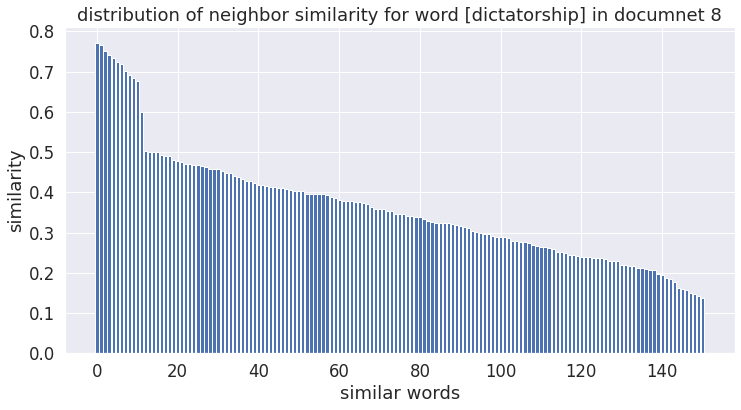

70   -->  popular
1690
[0.9999999, 0.9190784, 0.8618428, 0.8140104, 0.77680266, 0.76425016, 0.7449548, 0.5957749, 0.5687685, 0.5318302, 0.52637047, 0.5235249, 0.51317203, 0.51178306, 0.5109605, 0.50857586, 0.5039008, 0.49785554, 0.4967214, 0.49375337, 0.49179304, 0.48675895, 0.47962368, 0.47909904, 0.47842103, 0.47638705, 0.47313634, 0.47191712, 0.4709101, 0.4703174, 0.46922106, 0.4672187, 0.4653522, 0.46191794, 0.45577794, 0.4541183, 0.45385355, 0.452662, 0.45037538, 0.4494288, 0.44662684, 0.44555765, 0.4406569, 0.4368553, 0.43252984, 0.43206143, 0.43028045, 0.42863226, 0.42839694, 0.42837226, 0.42767623, 0.42754903, 0.42500857, 0.42472547, 0.4238106, 0.4228372, 0.42184943, 0.41742775, 0.4128745, 0.41224024, 0.4092592, 0.40889308, 0.4017936, 0.4011995, 0.3967852, 0.3959455, 0.3943124, 0.39357853, 0.39356574, 0.39321816, 0.3885203, 0.3881997, 0.38651314, 0.377451, 0.375131, 0.37444392, 0.37140948, 0.36837536, 0.36055726, 0.3576364, 0.35179132, 0.35173815, 0.3501414, 0.34744018, 0.34618

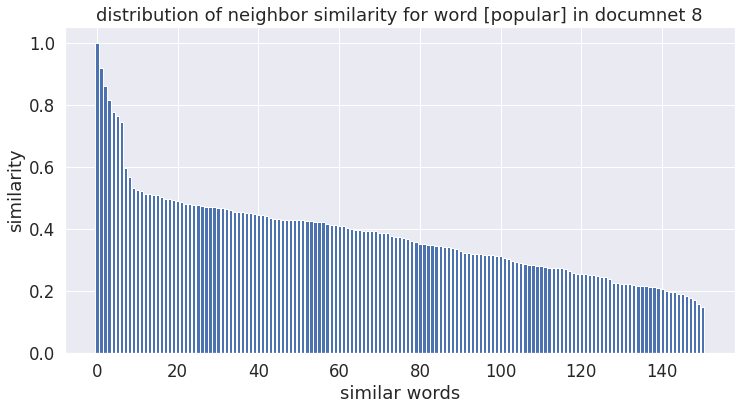

71   -->  uprising
1690
[0.9999999, 0.9190784, 0.8947544, 0.842286, 0.8112094, 0.7942853, 0.77576923, 0.6152825, 0.5842955, 0.5552301, 0.54732513, 0.52370334, 0.51904154, 0.50906223, 0.50780815, 0.50290567, 0.5026586, 0.49446058, 0.491122, 0.4897402, 0.4866541, 0.48272765, 0.4799515, 0.47765106, 0.47752523, 0.47578013, 0.4720195, 0.46689153, 0.46324563, 0.46090233, 0.46068645, 0.46042812, 0.45780724, 0.4574076, 0.45725867, 0.45486432, 0.45296472, 0.4468839, 0.44518942, 0.4417421, 0.4369726, 0.43676317, 0.43423244, 0.43260157, 0.43253303, 0.42938995, 0.42897242, 0.42662558, 0.42400348, 0.41899025, 0.41856742, 0.41701496, 0.41673523, 0.41553158, 0.4146775, 0.41220143, 0.41161853, 0.4089471, 0.40754038, 0.40706462, 0.40544248, 0.40204328, 0.39995918, 0.39823297, 0.39063483, 0.3866951, 0.3859535, 0.3849989, 0.3802168, 0.37961614, 0.37625033, 0.36887884, 0.3683621, 0.3653739, 0.36380553, 0.36350268, 0.36201692, 0.3614222, 0.36092842, 0.34975982, 0.3448171, 0.34384775, 0.33886704, 0.33853143

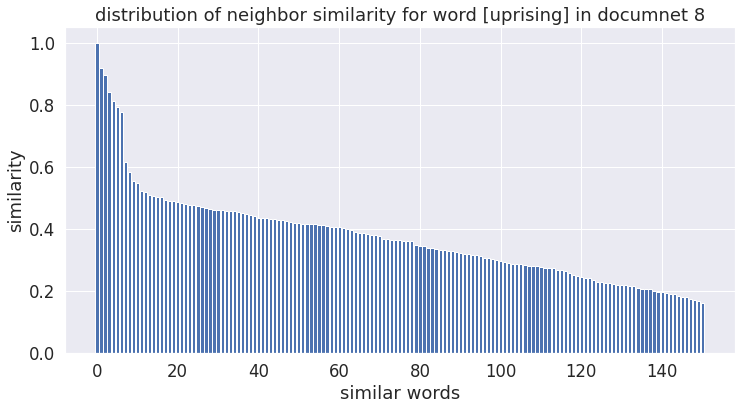

72   -->  swept
1690
[0.99999994, 0.8947544, 0.8856373, 0.8685874, 0.8618428, 0.8612425, 0.80563295, 0.6562919, 0.65021986, 0.59695756, 0.5909038, 0.5435203, 0.5257169, 0.52077854, 0.51654613, 0.5134275, 0.50644493, 0.50561076, 0.50412774, 0.4971543, 0.49432573, 0.49406937, 0.49403122, 0.49356407, 0.49254966, 0.49199474, 0.491994, 0.4879489, 0.472673, 0.47207636, 0.46858057, 0.46841273, 0.46609688, 0.46410578, 0.4613276, 0.45859396, 0.4547975, 0.4522599, 0.4509548, 0.45032096, 0.44699216, 0.44531918, 0.44488353, 0.44412774, 0.44249773, 0.43881282, 0.43756166, 0.43545556, 0.4276985, 0.4272154, 0.42298397, 0.42070776, 0.42014036, 0.41833848, 0.41790015, 0.417436, 0.41616327, 0.41541463, 0.40975413, 0.4086861, 0.4070559, 0.4053144, 0.40361595, 0.40137595, 0.3980889, 0.3953383, 0.39449605, 0.393458, 0.3917184, 0.38969636, 0.38805103, 0.38772786, 0.38521397, 0.38224357, 0.37854064, 0.3781668, 0.3749333, 0.36938825, 0.3679706, 0.3677137, 0.36337948, 0.36167544, 0.3583946, 0.35634285, 0.35546

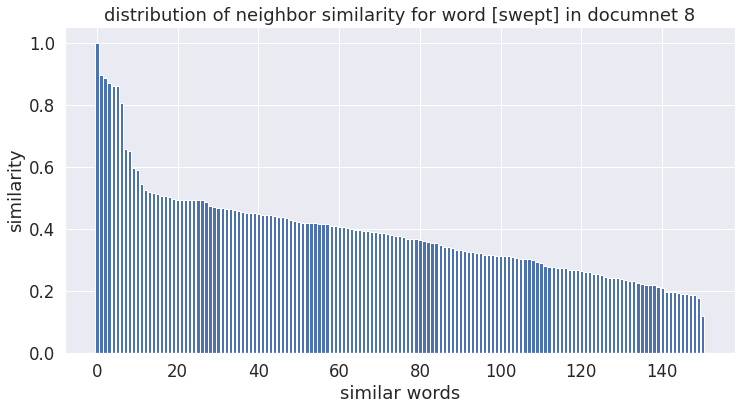

76   -->  power
1690
[1.0, 0.91615653, 0.892128, 0.8856373, 0.842286, 0.8140104, 0.7681575, 0.66310704, 0.6567654, 0.61421454, 0.6083456, 0.5933714, 0.5427021, 0.5359438, 0.5319129, 0.52531326, 0.51882243, 0.51732975, 0.51650167, 0.5144841, 0.51382554, 0.5080432, 0.506327, 0.50311196, 0.5018547, 0.50055075, 0.49602646, 0.49461597, 0.49347717, 0.49201345, 0.49011287, 0.4889232, 0.48878425, 0.48494422, 0.4847361, 0.48253083, 0.48239118, 0.48153025, 0.48127314, 0.47527093, 0.47241446, 0.47055203, 0.4608956, 0.45984757, 0.4590725, 0.4581375, 0.45732266, 0.45609793, 0.45235205, 0.45089918, 0.4464556, 0.44624338, 0.44567263, 0.4426282, 0.44087818, 0.44085163, 0.43669626, 0.436243, 0.43591487, 0.432585, 0.4324887, 0.426314, 0.42605516, 0.42513585, 0.4207158, 0.41937512, 0.416421, 0.41567832, 0.41185957, 0.41167757, 0.41053042, 0.40745658, 0.4061075, 0.39970124, 0.3996487, 0.3979141, 0.39600027, 0.3899687, 0.38407415, 0.37643224, 0.3734755, 0.3730266, 0.37105465, 0.37021568, 0.36786827, 0.3600

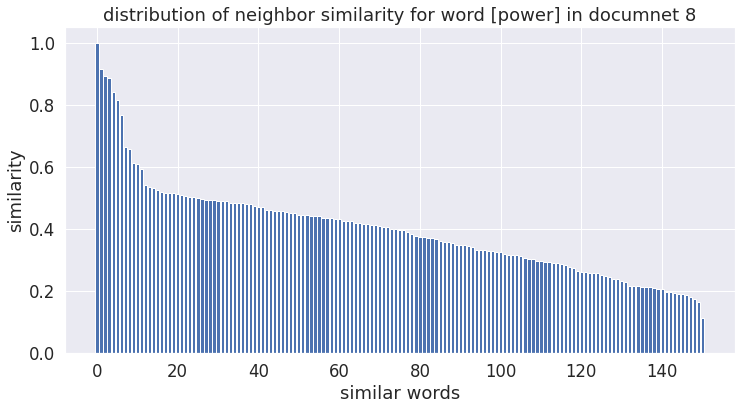

78   -->  went
1690
[1.0000001, 0.7380043, 0.72818315, 0.69313395, 0.6875559, 0.6821804, 0.6493716, 0.6211458, 0.5928657, 0.59040153, 0.5836541, 0.58013403, 0.5754453, 0.5750651, 0.5473168, 0.54644203, 0.53163457, 0.52244014, 0.5173818, 0.502239, 0.49616438, 0.49583957, 0.4951769, 0.4941708, 0.49356407, 0.48843223, 0.48358175, 0.48260903, 0.48127314, 0.47909904, 0.46534204, 0.4583599, 0.4581271, 0.45725867, 0.45267475, 0.44763732, 0.44535634, 0.42755833, 0.4188649, 0.41021138, 0.4078454, 0.403023, 0.39196312, 0.39140815, 0.39057228, 0.38930845, 0.3826515, 0.37393907, 0.3724121, 0.36734375, 0.36504734, 0.35522383, 0.35499424, 0.34845454, 0.34493268, 0.339762, 0.31243518, 0.2997155, 0.2996118, 0.29416603, 0.2895703, 0.28281385, 0.2801007, 0.27999818, 0.27982062, 0.27835137, 0.27579427, 0.2748788, 0.27174664, 0.27133, 0.27033985, 0.26810068, 0.26780975, 0.2649004, 0.26263994, 0.2624045, 0.25897115, 0.25587338, 0.25497907, 0.25410146, 0.2540554, 0.2530343, 0.25173315, 0.25066873, 0.2470547

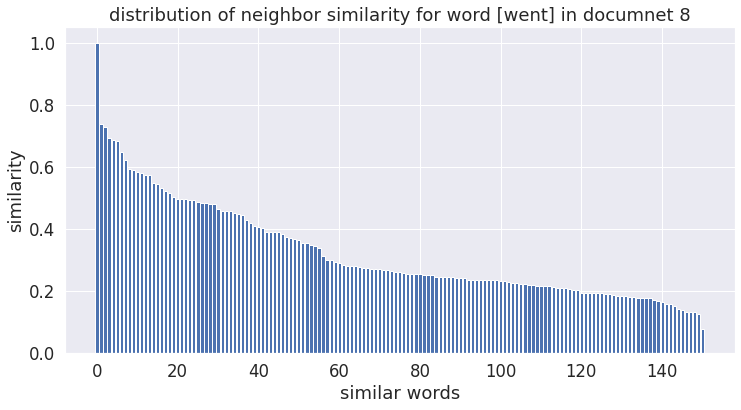

81   -->  national
1690
[1.0000002, 0.6493716, 0.6445204, 0.6351659, 0.59681666, 0.57645416, 0.5731516, 0.5718421, 0.56217796, 0.561705, 0.55731666, 0.5481487, 0.54290587, 0.54086137, 0.53816986, 0.532779, 0.5209422, 0.5134248, 0.49179304, 0.48887193, 0.48380953, 0.47237766, 0.46691644, 0.46148694, 0.46139598, 0.46047848, 0.45782623, 0.4468839, 0.4464556, 0.44599158, 0.44356176, 0.43192172, 0.43139666, 0.43028045, 0.42700964, 0.42614436, 0.42169023, 0.42014036, 0.41863456, 0.41778788, 0.40917045, 0.40862638, 0.40506852, 0.3900069, 0.3885442, 0.3869126, 0.3832521, 0.3798591, 0.37924692, 0.36651677, 0.3632865, 0.3610136, 0.35223266, 0.3430257, 0.3408876, 0.3354, 0.3227074, 0.31696728, 0.31352556, 0.3086128, 0.30003422, 0.2981126, 0.29727966, 0.29667276, 0.29074603, 0.28743398, 0.28492284, 0.2815448, 0.278482, 0.27757132, 0.27113095, 0.26397467, 0.26248825, 0.2604624, 0.25613582, 0.2537316, 0.2534377, 0.25274152, 0.25232244, 0.24984479, 0.24950159, 0.24796468, 0.24692334, 0.24670196, 0.24

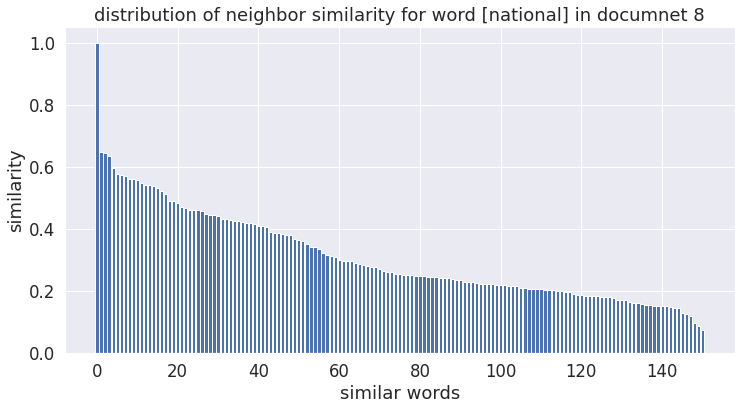

82   -->  television
1690
[0.7942779, 0.7088816, 0.65075207, 0.62953967, 0.62265855, 0.6136749, 0.59968865, 0.5991479, 0.5963926, 0.59028757, 0.5862509, 0.5713659, 0.5700923, 0.5655353, 0.52309656, 0.5175327, 0.50169575, 0.4968336, 0.49532187, 0.49429068, 0.49421188, 0.4816758, 0.48124647, 0.48098487, 0.47922498, 0.47279382, 0.47044772, 0.46740296, 0.46702066, 0.46662632, 0.4600258, 0.45993555, 0.4597956, 0.44667834, 0.44487044, 0.4448275, 0.44444585, 0.44335485, 0.44268364, 0.42888203, 0.42348993, 0.41825575, 0.40407026, 0.394216, 0.39210334, 0.39039534, 0.38612625, 0.38477036, 0.38461873, 0.38039085, 0.36637872, 0.35133886, 0.34666693, 0.34544072, 0.34527048, 0.34510836, 0.34255904, 0.3386444, 0.33312884, 0.33240345, 0.3278284, 0.3220623, 0.31492805, 0.3090581, 0.28783745, 0.2844239, 0.2843017, 0.2836581, 0.2821461, 0.28204134, 0.2734148, 0.27161312, 0.2710523, 0.26589924, 0.2623397, 0.2601923, 0.2581156, 0.257857, 0.25520232, 0.25335327, 0.25077483, 0.2505787, 0.25056177, 0.24851531

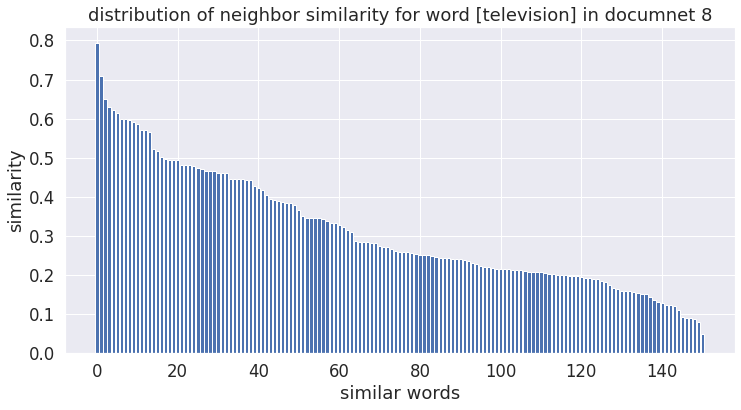

84   -->  announce
1690
[1.0, 0.6811024, 0.66708267, 0.6537757, 0.6301631, 0.6286181, 0.58512896, 0.5836541, 0.57507753, 0.55731666, 0.5529218, 0.5516759, 0.5417267, 0.51662815, 0.5158551, 0.51303387, 0.48797247, 0.48315018, 0.46923864, 0.46800715, 0.4661691, 0.4523169, 0.43902868, 0.43644297, 0.4295816, 0.42911142, 0.4228372, 0.4228068, 0.4210466, 0.4207158, 0.41856742, 0.41511124, 0.41314152, 0.393458, 0.39157197, 0.38725713, 0.38423333, 0.3839057, 0.3815114, 0.38066825, 0.38015652, 0.37779862, 0.37626997, 0.3753722, 0.3750006, 0.3742977, 0.37285328, 0.37032214, 0.3598652, 0.35812312, 0.35706192, 0.34948164, 0.34520006, 0.34414905, 0.3363217, 0.3322206, 0.32607716, 0.32222074, 0.3211133, 0.3175935, 0.3151287, 0.30822426, 0.305941, 0.30335748, 0.2962273, 0.29281846, 0.2927833, 0.28780156, 0.2875806, 0.28230315, 0.28078184, 0.27941793, 0.2775205, 0.27695113, 0.2718258, 0.26927847, 0.26630557, 0.26594156, 0.2586924, 0.25318402, 0.25052255, 0.24735828, 0.24654907, 0.24648276, 0.24378234,

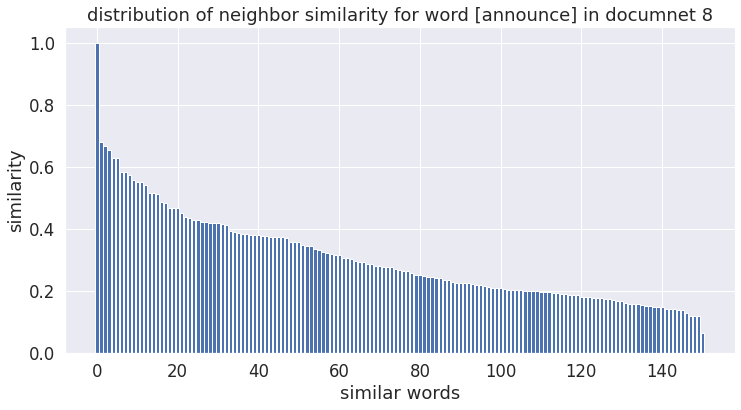

86   -->  special
1690
[0.9999999, 0.7853229, 0.6537757, 0.6251221, 0.57645416, 0.5442368, 0.52695256, 0.5172856, 0.51412785, 0.50336766, 0.5010927, 0.4951769, 0.4855408, 0.47727174, 0.47684664, 0.47114304, 0.46868557, 0.4672187, 0.46358514, 0.45628503, 0.45465863, 0.45321697, 0.4512456, 0.44596052, 0.43688282, 0.42999774, 0.4287135, 0.42870498, 0.42831767, 0.4263767, 0.42400348, 0.41921854, 0.41829002, 0.41659203, 0.41618362, 0.4101569, 0.4101014, 0.40880963, 0.40405032, 0.38158372, 0.37972176, 0.3679706, 0.36786827, 0.36676532, 0.35607776, 0.35567242, 0.34391603, 0.3434396, 0.339935, 0.3385893, 0.33756018, 0.33719483, 0.33392745, 0.32285488, 0.32184523, 0.32082778, 0.3171423, 0.3154019, 0.31131935, 0.30923593, 0.30765516, 0.30456668, 0.30416256, 0.30166316, 0.2981005, 0.29476815, 0.29115605, 0.2898331, 0.28850025, 0.28759027, 0.28742424, 0.2858746, 0.2840764, 0.2829064, 0.2818459, 0.28183562, 0.28175834, 0.2791801, 0.27857494, 0.27445993, 0.2738629, 0.27375636, 0.2735488, 0.27196628,

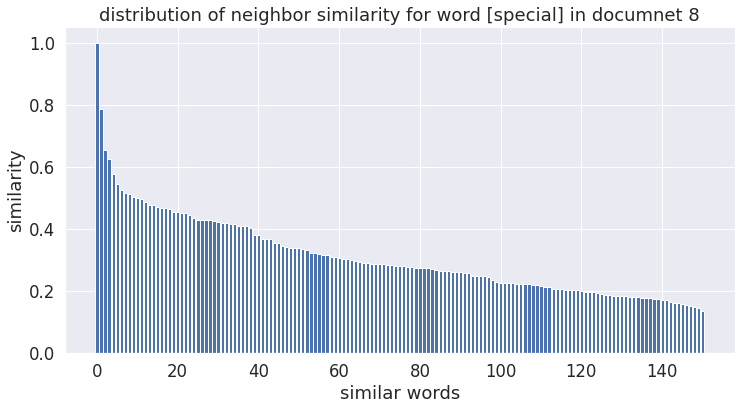

87   -->  congress
1690
[1.0000001, 0.7853229, 0.6811024, 0.61906886, 0.55994105, 0.5481487, 0.5473168, 0.5428557, 0.54044664, 0.5395357, 0.5360469, 0.53454804, 0.5239756, 0.5170903, 0.5160159, 0.5124356, 0.50751615, 0.4931698, 0.48455024, 0.4831104, 0.47617197, 0.4691928, 0.46612412, 0.46482754, 0.45793965, 0.45290735, 0.44512242, 0.44254404, 0.44179952, 0.4417421, 0.43719363, 0.43087918, 0.4308689, 0.425094, 0.42500857, 0.42392954, 0.4212499, 0.42123818, 0.41053042, 0.4064287, 0.40519503, 0.39568934, 0.39449605, 0.3904687, 0.3900505, 0.3712448, 0.36784622, 0.36416945, 0.3529079, 0.35244867, 0.34372938, 0.34278768, 0.34266597, 0.3419626, 0.3405823, 0.3384019, 0.33359087, 0.33330888, 0.32953566, 0.32815915, 0.32741845, 0.326004, 0.32504565, 0.31750423, 0.30131269, 0.29479837, 0.29457158, 0.29297107, 0.29056954, 0.28098923, 0.280212, 0.2791391, 0.27823275, 0.27793398, 0.27705804, 0.2730979, 0.2711013, 0.267655, 0.26503426, 0.26443878, 0.26300088, 0.26190808, 0.26126444, 0.26059645, 0.26

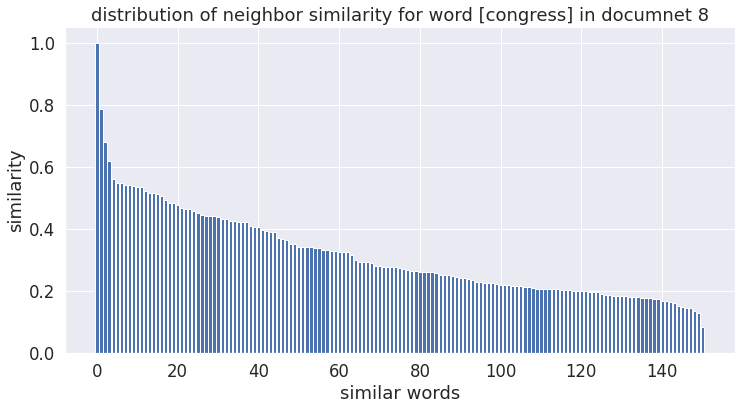

90   -->  message
1690
[0.99999994, 0.7959927, 0.7553083, 0.73692906, 0.7262712, 0.63781935, 0.6301631, 0.5750651, 0.53816986, 0.5360469, 0.5222424, 0.4928742, 0.4886641, 0.47754496, 0.47727174, 0.4633038, 0.4622952, 0.45924628, 0.4526923, 0.45033354, 0.4473657, 0.43892056, 0.43496826, 0.4335404, 0.4300652, 0.42647582, 0.41990784, 0.41899025, 0.41799498, 0.41575873, 0.41309774, 0.4102718, 0.40417612, 0.40019885, 0.39979982, 0.3996487, 0.39428228, 0.39321816, 0.39136243, 0.39011598, 0.3856003, 0.38228095, 0.38026798, 0.3781668, 0.3656317, 0.35787547, 0.35446197, 0.35044697, 0.3432708, 0.34308246, 0.3423484, 0.3398785, 0.33659965, 0.33597067, 0.33173144, 0.32795388, 0.32572305, 0.32021302, 0.31778342, 0.31689292, 0.3147662, 0.31342363, 0.31182414, 0.3108788, 0.30761656, 0.30543846, 0.3052964, 0.3046008, 0.3030606, 0.3008492, 0.29837552, 0.2983654, 0.2946419, 0.29350373, 0.29332292, 0.2924525, 0.2896427, 0.28713244, 0.28522688, 0.28496253, 0.28261042, 0.28233135, 0.28177163, 0.2808448, 0.

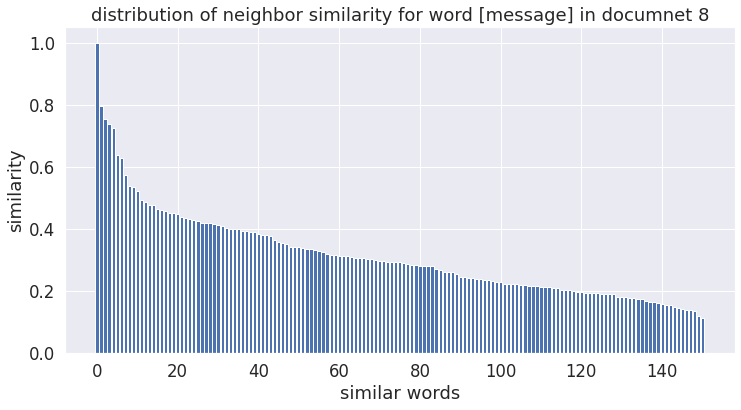

92   -->  repeated
1690
[0.9999999, 0.8541627, 0.8080144, 0.7959927, 0.6629453, 0.5779463, 0.5754453, 0.57507753, 0.524699, 0.52463007, 0.5223452, 0.5134248, 0.5109673, 0.4750989, 0.46612412, 0.45903313, 0.45237255, 0.4512456, 0.44574204, 0.44434583, 0.44326282, 0.44268763, 0.44224852, 0.43681583, 0.43667364, 0.4361315, 0.42979103, 0.42927647, 0.425897, 0.4241752, 0.42259315, 0.4185359, 0.41673523, 0.41346174, 0.41167757, 0.4092592, 0.4086861, 0.4086256, 0.40331584, 0.38857645, 0.38797736, 0.38377148, 0.36863053, 0.35960186, 0.35871628, 0.35867792, 0.35804793, 0.35757536, 0.35342804, 0.3524808, 0.35187483, 0.34182337, 0.34105045, 0.3394128, 0.3329102, 0.33099532, 0.32693917, 0.32636902, 0.3219986, 0.32126018, 0.3144239, 0.31376815, 0.31143492, 0.3110284, 0.3109148, 0.3101058, 0.3093778, 0.30822688, 0.3075756, 0.30749786, 0.30624306, 0.3017641, 0.2976299, 0.29630107, 0.29184145, 0.28989285, 0.28973407, 0.28954297, 0.28931984, 0.28876182, 0.2850306, 0.28273165, 0.27918866, 0.27551302, 0.

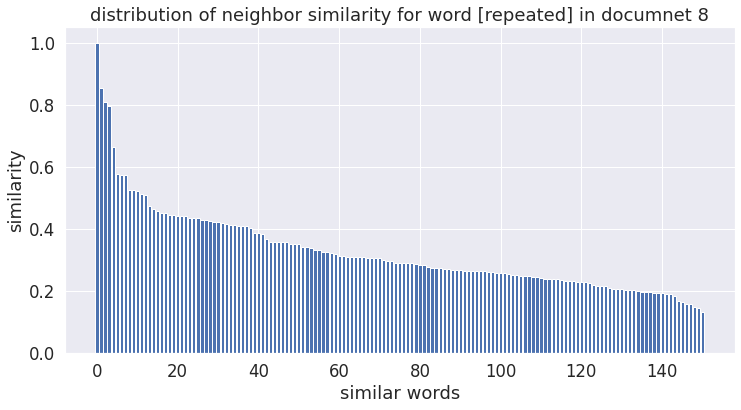

93   -->  today
1690
[1.0, 0.8541627, 0.7574855, 0.7262712, 0.60897017, 0.60849047, 0.58658767, 0.58512896, 0.58013403, 0.5731516, 0.5729994, 0.5437952, 0.53666604, 0.5358987, 0.5239756, 0.50336766, 0.49393904, 0.49220017, 0.48702723, 0.48300248, 0.4761166, 0.47265336, 0.46690768, 0.46550772, 0.4638869, 0.46386325, 0.4626421, 0.4588703, 0.4575203, 0.4556378, 0.45303202, 0.45089918, 0.44443357, 0.44194427, 0.4369726, 0.4290098, 0.4289419, 0.42839694, 0.4272154, 0.42524093, 0.4244764, 0.41101122, 0.40648654, 0.40345109, 0.40101516, 0.39301908, 0.38917083, 0.3870182, 0.38153523, 0.3734187, 0.3623659, 0.36125293, 0.35679603, 0.3563146, 0.34952164, 0.34785324, 0.34140944, 0.33834586, 0.33741185, 0.33009905, 0.32987756, 0.3277583, 0.32763135, 0.32696718, 0.32497633, 0.3230734, 0.31847495, 0.31220174, 0.3068375, 0.3062957, 0.30505112, 0.30313784, 0.30297604, 0.30156377, 0.30075407, 0.30041587, 0.30039978, 0.29869318, 0.29641438, 0.2956236, 0.2955582, 0.29296598, 0.2908404, 0.28625524, 0.28515

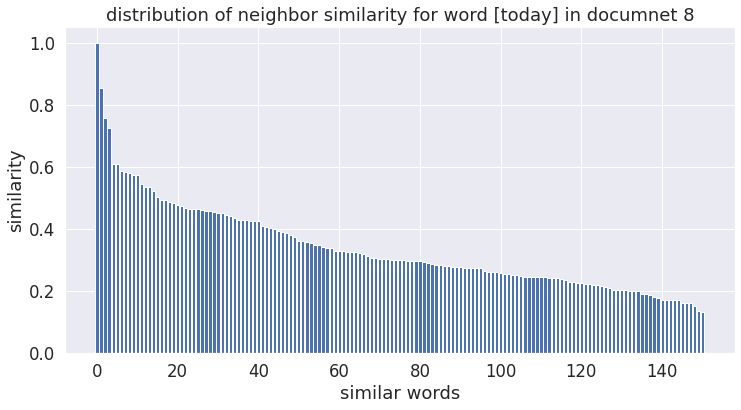

96   -->  rum
1690
[0.99999994, 0.73348707, 0.561705, 0.53866625, 0.5340714, 0.4857654, 0.47144833, 0.46482754, 0.4626421, 0.45628503, 0.45267475, 0.45237255, 0.44806474, 0.4470694, 0.44092298, 0.43496826, 0.42941025, 0.42892405, 0.42300442, 0.4228068, 0.42216885, 0.41464245, 0.41197067, 0.41190776, 0.4105866, 0.40889308, 0.40789104, 0.4073386, 0.39637148, 0.395118, 0.39373815, 0.39063483, 0.3876915, 0.38407415, 0.38224357, 0.38196057, 0.38041466, 0.3793683, 0.37904066, 0.3761765, 0.37226054, 0.37102097, 0.36895433, 0.36879686, 0.36805508, 0.3657915, 0.35913557, 0.35903537, 0.3585149, 0.35427976, 0.35393983, 0.35381046, 0.34910682, 0.3473692, 0.3447467, 0.3435466, 0.3407274, 0.3347823, 0.3276866, 0.32656044, 0.3253923, 0.3244214, 0.3243236, 0.3230118, 0.32196957, 0.3217191, 0.3168063, 0.31547803, 0.31339306, 0.31021923, 0.30953825, 0.303091, 0.30153066, 0.29915303, 0.2980883, 0.29298526, 0.28910154, 0.28779846, 0.28763357, 0.28702745, 0.28400278, 0.28349265, 0.28305757, 0.28235626, 0.2

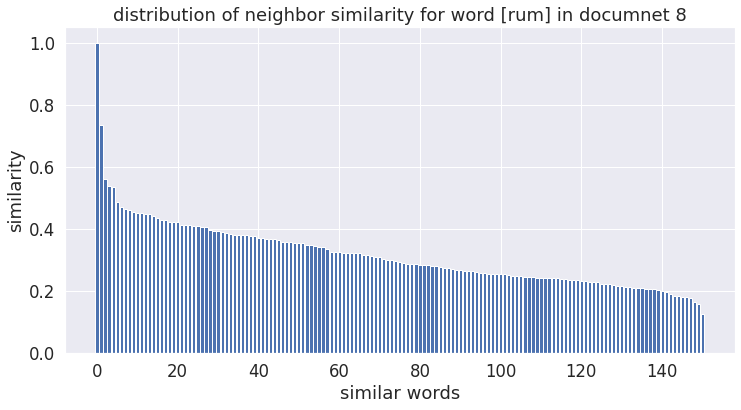

97   -->  ##anian
1690
[1.0000002, 0.73348707, 0.58905494, 0.56217796, 0.55528796, 0.5160545, 0.5048286, 0.4884953, 0.47981754, 0.47159314, 0.46550772, 0.45290735, 0.43832105, 0.43244186, 0.43069202, 0.4287293, 0.42784214, 0.4276356, 0.42346677, 0.42259315, 0.42184943, 0.42166677, 0.41592175, 0.4146775, 0.41440874, 0.41309774, 0.4125898, 0.40975413, 0.40905166, 0.40880963, 0.40824187, 0.40452212, 0.403023, 0.4007956, 0.39970124, 0.3992589, 0.39906454, 0.39471996, 0.39247715, 0.38865846, 0.37779862, 0.37077177, 0.37047547, 0.36764574, 0.36371377, 0.35745013, 0.35718036, 0.3560688, 0.35478914, 0.35405087, 0.3502438, 0.34967995, 0.34889525, 0.34723306, 0.3428569, 0.3423734, 0.3414725, 0.34071332, 0.3362231, 0.33003914, 0.32739574, 0.32504514, 0.32477987, 0.3235133, 0.31830463, 0.3177982, 0.31561387, 0.31182742, 0.3109722, 0.31053072, 0.30725265, 0.3066377, 0.30380878, 0.2998945, 0.29846802, 0.29705918, 0.296575, 0.29545185, 0.2953647, 0.2949456, 0.29278916, 0.2924965, 0.292441, 0.29180464

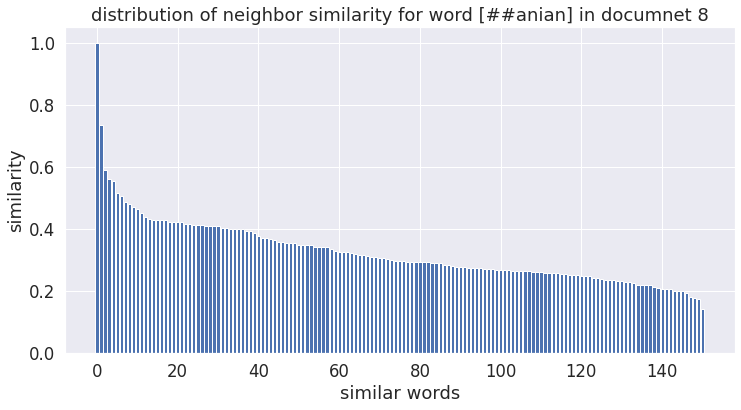

98   -->  newspapers
1690
[0.9999999, 0.6998473, 0.6357696, 0.6233164, 0.58905494, 0.5854504, 0.5478972, 0.54703206, 0.53679156, 0.53666604, 0.5340714, 0.5109673, 0.4724146, 0.45782623, 0.454742, 0.45320648, 0.4526923, 0.44118097, 0.4308689, 0.42911142, 0.42566383, 0.42419022, 0.4213211, 0.42106724, 0.4109994, 0.4078454, 0.4066671, 0.40544248, 0.4029348, 0.4021832, 0.40163192, 0.39937833, 0.3979141, 0.3967852, 0.3917184, 0.39051884, 0.38617295, 0.3838504, 0.3806643, 0.379633, 0.37838298, 0.3709754, 0.37006366, 0.3696975, 0.36709908, 0.36676532, 0.36563736, 0.35367388, 0.35221255, 0.35197705, 0.34723246, 0.34672457, 0.3397324, 0.3376376, 0.33687326, 0.33611512, 0.33601636, 0.33587086, 0.3330258, 0.33255184, 0.33232027, 0.3281167, 0.32741302, 0.3246484, 0.32095027, 0.3191679, 0.31911695, 0.31524122, 0.3124279, 0.31231064, 0.31144994, 0.31011692, 0.30998468, 0.30797058, 0.3063477, 0.30633485, 0.30525035, 0.30401874, 0.30229372, 0.30208412, 0.30200833, 0.30024135, 0.30011934, 0.29773825, 0

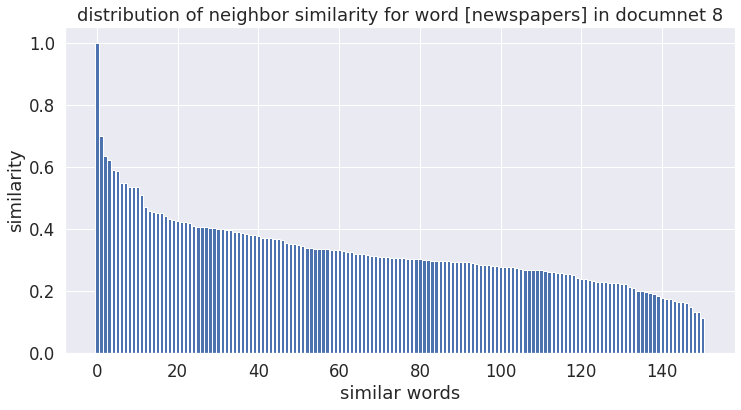

101   -->  like
1690
[1.0, 0.6198523, 0.5240675, 0.50986004, 0.49393904, 0.4750989, 0.46846384, 0.45320648, 0.44997507, 0.4296955, 0.42816606, 0.42232603, 0.4102718, 0.40824187, 0.40511578, 0.39316872, 0.38015652, 0.37924692, 0.37794533, 0.3724121, 0.36370888, 0.36167544, 0.3560503, 0.35539627, 0.3550013, 0.35462466, 0.35179132, 0.34534937, 0.3443783, 0.3435466, 0.33886704, 0.33797902, 0.33785808, 0.33776972, 0.33652443, 0.3314784, 0.3253915, 0.32504565, 0.32423002, 0.32072675, 0.31864178, 0.31861567, 0.3072234, 0.30671388, 0.301053, 0.29966176, 0.29853308, 0.2914144, 0.2898331, 0.28938428, 0.28852803, 0.2865307, 0.28602895, 0.28040266, 0.2773576, 0.27713424, 0.2747761, 0.27375293, 0.2608576, 0.25789043, 0.25642806, 0.25593427, 0.2553204, 0.25513464, 0.2548737, 0.25161275, 0.2516108, 0.25157046, 0.24714352, 0.24576992, 0.24371962, 0.24233407, 0.23931183, 0.23395693, 0.23328304, 0.23291957, 0.22994554, 0.2287167, 0.22827819, 0.22653015, 0.2263125, 0.21957768, 0.21530391, 0.21509337, 0.2

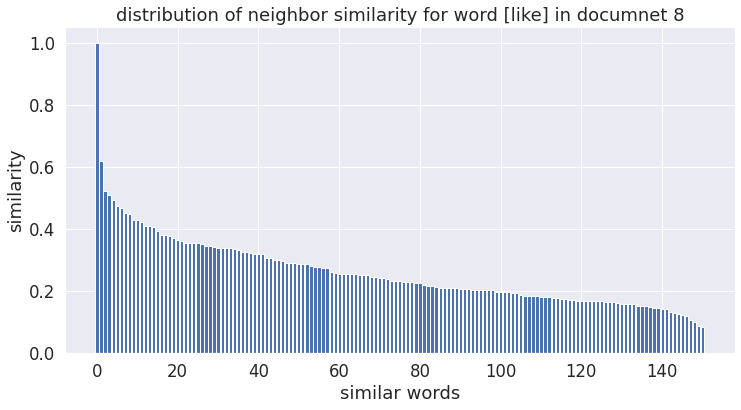

103   -->  television
1690
[1.0000002, 0.6198523, 0.5854504, 0.5718421, 0.55528796, 0.5420474, 0.5409254, 0.53866625, 0.5358987, 0.52878606, 0.524699, 0.50228363, 0.5005412, 0.4928742, 0.47531193, 0.4689893, 0.4668627, 0.46534204, 0.46290982, 0.44903865, 0.43542987, 0.4339735, 0.4295816, 0.42878586, 0.42636526, 0.42513585, 0.4195286, 0.41224024, 0.40754038, 0.40734953, 0.40519503, 0.40405032, 0.40395474, 0.40361595, 0.40334642, 0.39041767, 0.38777333, 0.3874007, 0.38424605, 0.37775567, 0.36606526, 0.36121, 0.35464954, 0.35352963, 0.34875685, 0.3458175, 0.3456724, 0.34139216, 0.34105074, 0.34085327, 0.3386994, 0.3303125, 0.326707, 0.32568064, 0.3252523, 0.32202843, 0.32166362, 0.3201172, 0.31880525, 0.3174818, 0.31568974, 0.31495723, 0.31435803, 0.31006944, 0.3099432, 0.3098471, 0.30808622, 0.30716094, 0.3066937, 0.3011998, 0.3001029, 0.29934818, 0.29667225, 0.29497933, 0.2940841, 0.29302642, 0.2903336, 0.29016328, 0.2877986, 0.28768554, 0.2860921, 0.28397554, 0.28247803, 0.27917686, 0.

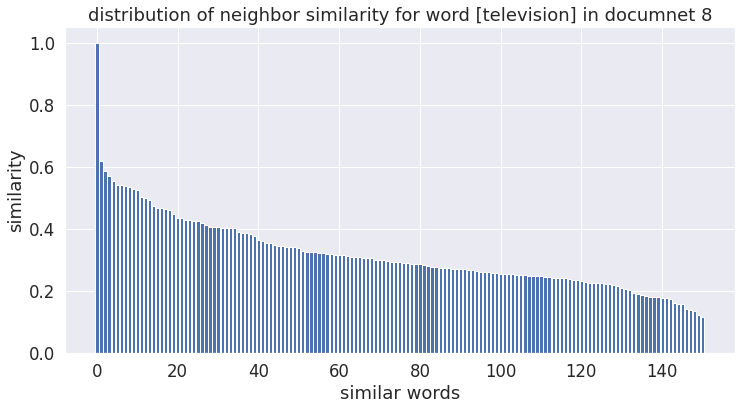

106   -->  controlled
1690
[1.0000001, 0.7219728, 0.6658109, 0.6357696, 0.63168883, 0.6237328, 0.61531293, 0.5409254, 0.50986004, 0.49201345, 0.4880727, 0.47981754, 0.4779395, 0.47012043, 0.4613276, 0.4575203, 0.43316972, 0.42892405, 0.42665765, 0.425897, 0.42472067, 0.4238106, 0.42265332, 0.42073956, 0.42032507, 0.4187333, 0.41701496, 0.41416973, 0.40707487, 0.40506852, 0.40493995, 0.40400055, 0.40041417, 0.39913297, 0.3921737, 0.39173836, 0.39170367, 0.38930845, 0.3856003, 0.3839057, 0.3823461, 0.37817946, 0.37767285, 0.37522894, 0.3732407, 0.36938703, 0.3682812, 0.36692467, 0.36380813, 0.36191446, 0.3577735, 0.35597757, 0.35549414, 0.3460102, 0.34583887, 0.34456253, 0.34308833, 0.34266597, 0.3417375, 0.34034652, 0.33887854, 0.33643484, 0.33471218, 0.33465827, 0.33455324, 0.33290192, 0.3285926, 0.32715213, 0.3250503, 0.3250261, 0.32379064, 0.3223066, 0.3198447, 0.3171423, 0.31486726, 0.31396776, 0.3115667, 0.30850422, 0.3084829, 0.3072482, 0.3066644, 0.3065772, 0.30379862, 0.2987489,

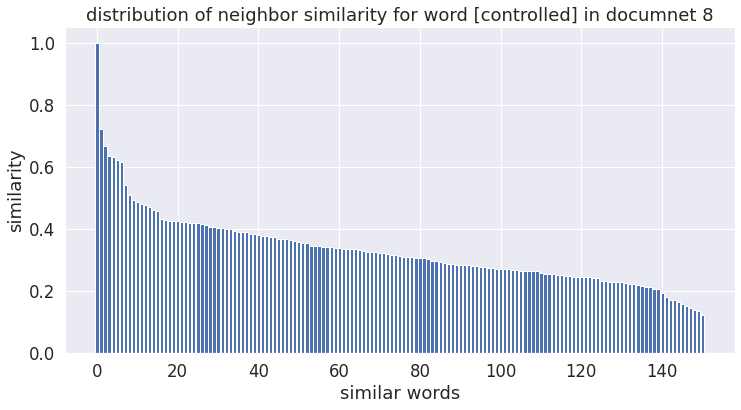

109   -->  country
1690
[0.7231425, 0.708586, 0.6489825, 0.6106755, 0.59784365, 0.58980834, 0.5777018, 0.5645498, 0.5506512, 0.53948116, 0.53784776, 0.53372586, 0.51897293, 0.5070951, 0.49791563, 0.49694216, 0.49685782, 0.49140573, 0.49120432, 0.48961458, 0.48916122, 0.48275855, 0.47620118, 0.4729367, 0.46749002, 0.46183962, 0.46016914, 0.45729056, 0.44918108, 0.44849965, 0.44082585, 0.43628985, 0.42983338, 0.42885804, 0.42630875, 0.42499286, 0.42390966, 0.42346987, 0.42327398, 0.42134786, 0.4200732, 0.41814786, 0.41705143, 0.41692847, 0.41689652, 0.41622108, 0.41118646, 0.41042346, 0.41031694, 0.40939283, 0.40893003, 0.40695706, 0.40429938, 0.40325177, 0.40294152, 0.4001545, 0.39788765, 0.39186224, 0.38852662, 0.38742846, 0.38524535, 0.38515538, 0.38188857, 0.38091773, 0.38028678, 0.3789963, 0.3788328, 0.37656784, 0.37655497, 0.3757973, 0.37351346, 0.37154886, 0.3710174, 0.3706823, 0.36406553, 0.36257094, 0.3599327, 0.35882443, 0.3587245, 0.35758033, 0.35459656, 0.3503062, 0.3474335, 

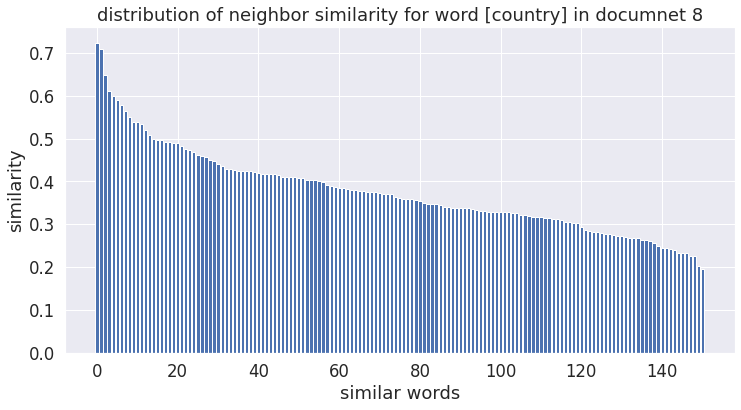

112   -->  new
1690
[0.7806108, 0.7384007, 0.728523, 0.72414297, 0.61447287, 0.5654707, 0.5274697, 0.5162435, 0.50374913, 0.4987678, 0.48959142, 0.48129493, 0.47679138, 0.47368327, 0.47249082, 0.46658736, 0.4621383, 0.4608253, 0.4598124, 0.45378402, 0.4535408, 0.4421539, 0.4378671, 0.4349271, 0.42942792, 0.42702067, 0.42590553, 0.42234343, 0.42143577, 0.42126194, 0.41774517, 0.41718596, 0.4128539, 0.4115883, 0.4108433, 0.4052388, 0.39853525, 0.39457017, 0.39430392, 0.3929979, 0.39178443, 0.38990226, 0.3851021, 0.38279226, 0.37870985, 0.37772876, 0.3756103, 0.37435615, 0.3738754, 0.37368017, 0.37347922, 0.37325174, 0.37118992, 0.37114877, 0.37016898, 0.36959374, 0.36567882, 0.3652739, 0.3634776, 0.36314094, 0.36280245, 0.3618373, 0.3615538, 0.36007634, 0.35889336, 0.35877797, 0.35792333, 0.35759908, 0.35745794, 0.35450807, 0.35449833, 0.35417277, 0.3504179, 0.34936804, 0.347922, 0.34775656, 0.34684065, 0.34554136, 0.34526977, 0.34521914, 0.3447795, 0.34444535, 0.34193388, 0.34005734, 0.

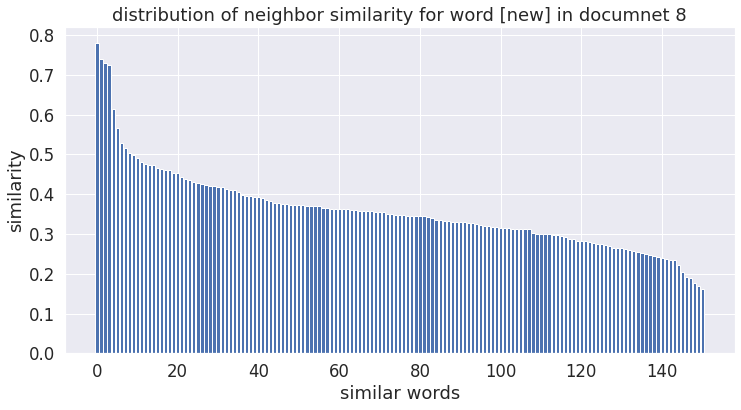

114   -->  non
1690
[1.0000001, 0.77358896, 0.7495865, 0.68421745, 0.63168883, 0.53679156, 0.5080584, 0.50228363, 0.48878425, 0.47811344, 0.47159314, 0.45167804, 0.4470694, 0.4469142, 0.44662684, 0.43545556, 0.43281525, 0.43260157, 0.43224382, 0.42816606, 0.42383623, 0.4168465, 0.4147945, 0.4097823, 0.4095109, 0.40673882, 0.40556085, 0.40531218, 0.40363294, 0.40155923, 0.39587563, 0.3958227, 0.3955449, 0.3944838, 0.39301908, 0.39197174, 0.3903001, 0.38828212, 0.38752097, 0.38579398, 0.3841153, 0.38300925, 0.38082814, 0.38032794, 0.37976867, 0.3794664, 0.37853712, 0.37668517, 0.3759701, 0.37509692, 0.37305975, 0.37279493, 0.37183994, 0.37034202, 0.36758322, 0.36651677, 0.36549187, 0.36378703, 0.36315605, 0.36184192, 0.36046833, 0.35898274, 0.35871628, 0.35758364, 0.35667336, 0.35632423, 0.35605985, 0.35491037, 0.35218483, 0.35106874, 0.35006797, 0.34989807, 0.34691983, 0.34493268, 0.34278768, 0.3423552, 0.34217447, 0.340732, 0.34035152, 0.33875835, 0.33756018, 0.33747488, 0.33664414, 0.

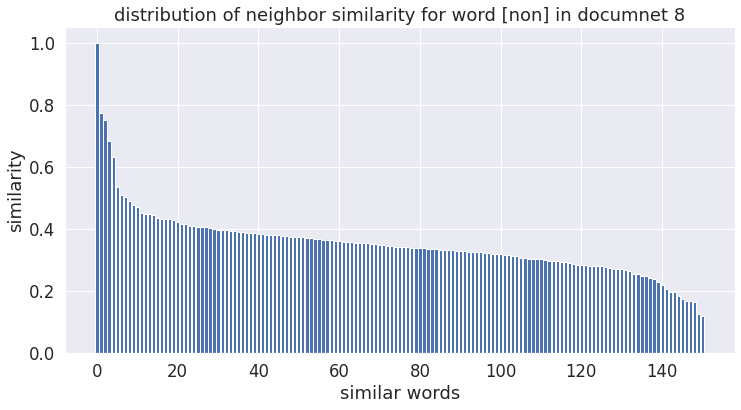

116   -->  communist
1690
[1.0, 0.77358896, 0.7363782, 0.6251712, 0.6237328, 0.5478972, 0.5160545, 0.5005412, 0.49011287, 0.4857654, 0.47750476, 0.470378, 0.46636435, 0.464057, 0.45327532, 0.45216823, 0.45192838, 0.4494288, 0.44859636, 0.43274945, 0.43192342, 0.4296955, 0.42938995, 0.42700964, 0.4248557, 0.42298397, 0.41372514, 0.4087435, 0.40512216, 0.39950663, 0.39576703, 0.39520615, 0.39496958, 0.3929032, 0.3921211, 0.39051393, 0.3900505, 0.38967764, 0.38917083, 0.388665, 0.38814783, 0.38798824, 0.38770646, 0.38731372, 0.38448042, 0.38277617, 0.38158372, 0.38143075, 0.38049006, 0.37928444, 0.37889677, 0.3778325, 0.37728885, 0.3750124, 0.37262076, 0.36670732, 0.3644691, 0.36340398, 0.3602091, 0.35893792, 0.3577718, 0.35600007, 0.3556265, 0.3553186, 0.3553077, 0.35499424, 0.35174927, 0.35023114, 0.34987834, 0.34872347, 0.34836861, 0.34538305, 0.34173658, 0.34161508, 0.33854473, 0.3382064, 0.3381493, 0.3340466, 0.3329102, 0.32916266, 0.3290389, 0.32795388, 0.32607716, 0.32555425, 0.324

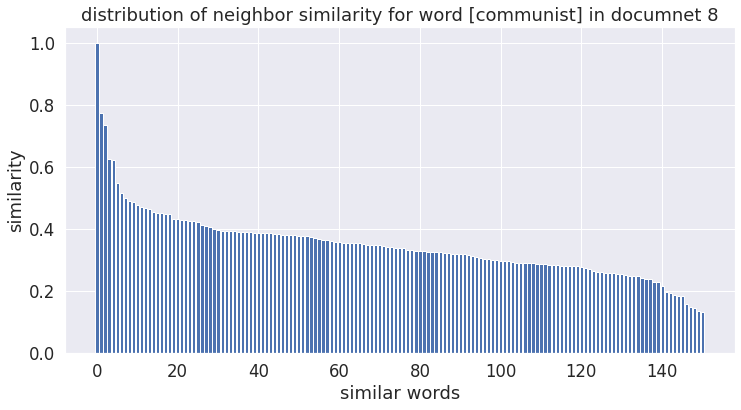

117   -->  leaders
1690
[1.0000001, 0.7495865, 0.7363782, 0.6998473, 0.6982112, 0.6658109, 0.5420474, 0.5415539, 0.51963234, 0.51392883, 0.5048286, 0.50311196, 0.48822123, 0.48788226, 0.48466694, 0.48300248, 0.4799515, 0.47748882, 0.47537768, 0.4751571, 0.47313634, 0.47180015, 0.47144833, 0.46609688, 0.44997507, 0.44531143, 0.44224852, 0.44143325, 0.43681157, 0.43443263, 0.4335404, 0.43192172, 0.43087918, 0.42607903, 0.41713458, 0.41618362, 0.4126824, 0.41190636, 0.41106787, 0.4098179, 0.40770486, 0.40626365, 0.40199122, 0.39981964, 0.39958906, 0.39548922, 0.3949911, 0.39157197, 0.38952336, 0.3878932, 0.38585615, 0.38393804, 0.38383722, 0.37566832, 0.37393907, 0.37006766, 0.36831504, 0.3648995, 0.36352986, 0.3624068, 0.36228225, 0.36206234, 0.36129916, 0.35931164, 0.35606182, 0.3560083, 0.35473025, 0.35447115, 0.3504964, 0.3504846, 0.35022217, 0.3498831, 0.34924418, 0.34878647, 0.34815413, 0.34679344, 0.34678417, 0.34530458, 0.344829, 0.34392977, 0.3432653, 0.34294605, 0.33932215, 0.33

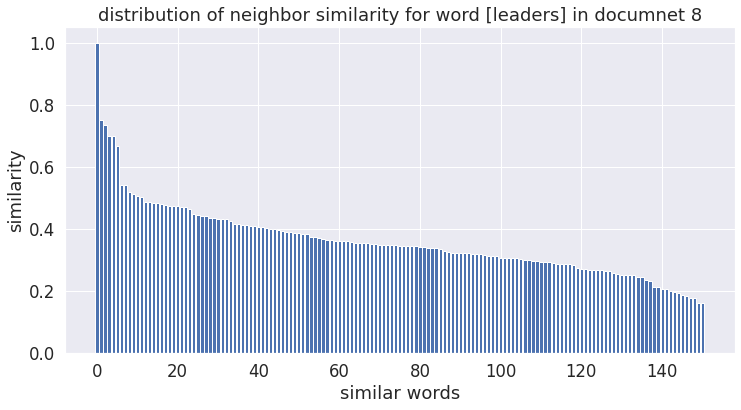

120   -->  many
1690
[0.99999994, 0.7441014, 0.7321069, 0.72076845, 0.71333134, 0.69657993, 0.6412444, 0.58753127, 0.53975487, 0.51559174, 0.51462877, 0.5126517, 0.5007981, 0.48279685, 0.4735964, 0.46029502, 0.45611942, 0.4512461, 0.4456975, 0.4375565, 0.43227875, 0.42000282, 0.4198165, 0.41892335, 0.41877824, 0.41541484, 0.40983856, 0.40527618, 0.40103155, 0.3974396, 0.39533025, 0.39046818, 0.38718343, 0.38652554, 0.38586885, 0.3829863, 0.38264105, 0.38193315, 0.3802625, 0.37948364, 0.37765, 0.3773675, 0.36916637, 0.36573714, 0.36420953, 0.36004645, 0.35293084, 0.352643, 0.35076353, 0.34726346, 0.3471947, 0.3410408, 0.34075168, 0.3402271, 0.3367645, 0.3357572, 0.33373892, 0.3323964, 0.33050305, 0.3264969, 0.32416198, 0.32114172, 0.3188649, 0.31867903, 0.31652224, 0.312854, 0.3114265, 0.3100945, 0.3074808, 0.306337, 0.30520102, 0.30413455, 0.3027695, 0.29837495, 0.29803026, 0.29779527, 0.2973209, 0.2953359, 0.2937618, 0.29230225, 0.28861737, 0.28774214, 0.2871338, 0.28504196, 0.2823935

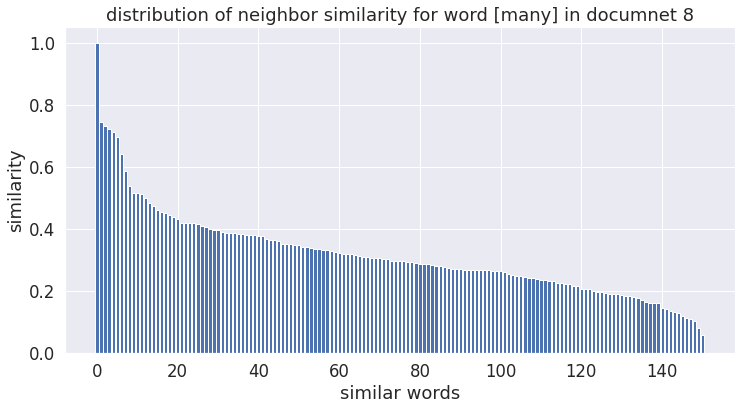

123   -->  party
1690
[0.6634002, 0.59458697, 0.58145607, 0.5489794, 0.54004705, 0.51821893, 0.51566094, 0.5002187, 0.46529514, 0.42706212, 0.42100745, 0.4111482, 0.40714335, 0.40112156, 0.38905573, 0.38888785, 0.38457412, 0.38082737, 0.36972553, 0.36302823, 0.36071098, 0.3591618, 0.35653412, 0.353054, 0.34568623, 0.34501168, 0.34403923, 0.34402213, 0.3434937, 0.3334437, 0.3301689, 0.32996917, 0.32835433, 0.32053825, 0.3198493, 0.31983614, 0.31946656, 0.312914, 0.30931556, 0.3063439, 0.305696, 0.3046396, 0.30158716, 0.30032143, 0.29795098, 0.2954299, 0.29445177, 0.29387808, 0.2932715, 0.29126757, 0.2911859, 0.29065686, 0.29004526, 0.28834906, 0.28736508, 0.2865084, 0.28626335, 0.2853762, 0.28501916, 0.28460574, 0.284516, 0.2822018, 0.28031802, 0.27930197, 0.27645582, 0.27608863, 0.27335578, 0.27331325, 0.27215123, 0.27076522, 0.27064532, 0.27042076, 0.2700854, 0.2698958, 0.26761436, 0.26628226, 0.26403195, 0.26184928, 0.26179978, 0.26169464, 0.26088446, 0.26024526, 0.25901222, 0.258381

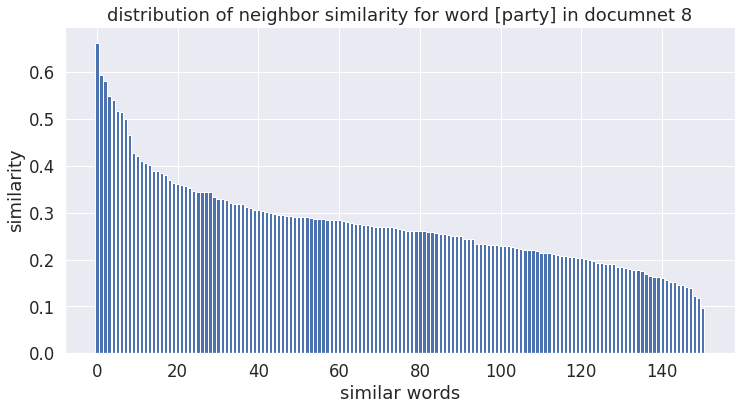

126   -->  leading
1690
[0.99999976, 0.8383829, 0.7441014, 0.5911673, 0.57091606, 0.5396204, 0.52665997, 0.51862085, 0.5124131, 0.49909216, 0.49697566, 0.49366313, 0.49358624, 0.4827765, 0.4805107, 0.46988598, 0.46285412, 0.4576206, 0.44369942, 0.43607008, 0.4257633, 0.4231155, 0.42187187, 0.42155862, 0.41760466, 0.41757566, 0.40953255, 0.3996609, 0.3985478, 0.39452457, 0.393364, 0.39183962, 0.38823965, 0.38747957, 0.38408744, 0.3835676, 0.3810495, 0.377275, 0.3739068, 0.36496803, 0.36352986, 0.3625762, 0.35953796, 0.35854298, 0.3582046, 0.35679686, 0.35661972, 0.35088384, 0.34997898, 0.34968844, 0.3496295, 0.34578794, 0.34243295, 0.34161508, 0.3411735, 0.3410635, 0.34000373, 0.33730388, 0.33453092, 0.33161682, 0.33143386, 0.3298112, 0.32714868, 0.32581902, 0.3257814, 0.32572126, 0.323163, 0.3229219, 0.31875134, 0.31447452, 0.31165242, 0.30854547, 0.30749464, 0.30640715, 0.3059816, 0.2936943, 0.29059386, 0.28851712, 0.28768057, 0.28728238, 0.28260213, 0.28185257, 0.28168774, 0.281442, 

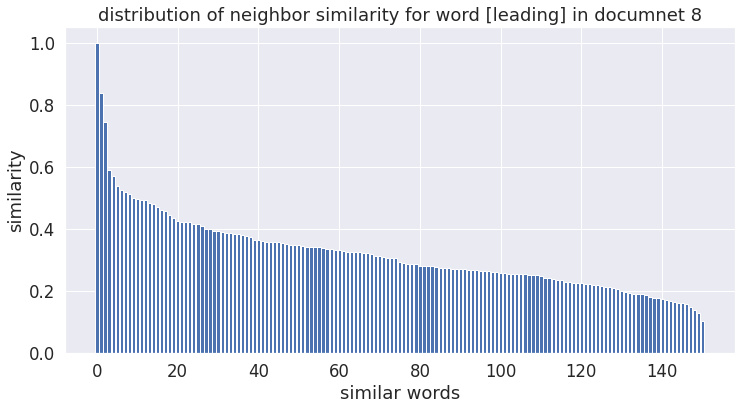

127   -->  figures
1690
[1.0000001, 0.8383829, 0.7321069, 0.58304405, 0.5791764, 0.57100296, 0.5462442, 0.54265004, 0.5298481, 0.5250492, 0.5235348, 0.52228993, 0.51020455, 0.47222376, 0.46927047, 0.4491691, 0.44893616, 0.44777465, 0.4414974, 0.42674965, 0.42473865, 0.42038417, 0.4130103, 0.41104227, 0.4098179, 0.4093426, 0.4080423, 0.40182817, 0.40004823, 0.39411545, 0.39405787, 0.39335698, 0.3915728, 0.39007333, 0.38774568, 0.38682944, 0.38259542, 0.3780597, 0.3762556, 0.37214902, 0.37135458, 0.37070304, 0.36891747, 0.36783665, 0.3618415, 0.36056566, 0.35537148, 0.34857413, 0.34836477, 0.34651136, 0.34507856, 0.34113663, 0.33854473, 0.33816236, 0.33707088, 0.33664414, 0.3335908, 0.33297285, 0.3323549, 0.33130032, 0.33025622, 0.3297918, 0.32801345, 0.3270741, 0.3157739, 0.31536996, 0.31531054, 0.31177822, 0.31077647, 0.30935133, 0.30800718, 0.30782774, 0.30624658, 0.3061592, 0.29736644, 0.296634, 0.29563516, 0.29558283, 0.29541934, 0.293476, 0.29148453, 0.28970194, 0.28615087, 0.28594

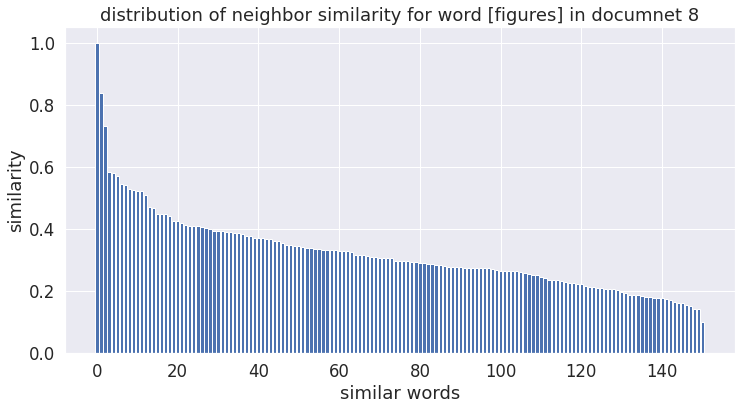

130   -->  detained
1690
[0.9999999, 0.8261867, 0.6402683, 0.58753127, 0.5308753, 0.5298481, 0.52050114, 0.5079898, 0.49366313, 0.483409, 0.4435324, 0.43766513, 0.43176693, 0.41818693, 0.41803682, 0.39499032, 0.39497805, 0.38694632, 0.3824414, 0.37505907, 0.3743926, 0.37013826, 0.36939514, 0.36093736, 0.35035, 0.33485365, 0.3258046, 0.3204956, 0.31641692, 0.31605363, 0.3132849, 0.30537394, 0.30001575, 0.29863805, 0.29729897, 0.29579246, 0.29572573, 0.2957149, 0.29534817, 0.2952962, 0.29463178, 0.29174733, 0.2901737, 0.28937593, 0.28490376, 0.2839358, 0.278445, 0.27744973, 0.2772627, 0.2757003, 0.27136397, 0.27091, 0.27067053, 0.26952326, 0.26894754, 0.2685796, 0.26418275, 0.26415914, 0.26405382, 0.262743, 0.26218015, 0.25928012, 0.25884724, 0.2579061, 0.25536415, 0.25530905, 0.2540447, 0.25238907, 0.25212923, 0.25156546, 0.24960151, 0.24951492, 0.24936238, 0.24890958, 0.24674982, 0.24656844, 0.24633451, 0.2446701, 0.24276574, 0.23575044, 0.23561722, 0.23463936, 0.2342861, 0.23069222, 0

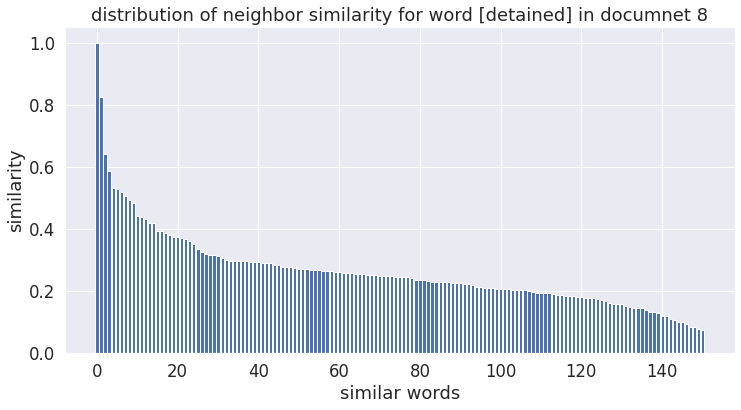

131   -->  since
1690
[0.9999999, 0.623137, 0.5803667, 0.5308753, 0.5275099, 0.51927024, 0.51559174, 0.46903202, 0.46073815, 0.4598313, 0.4554069, 0.44373927, 0.4414974, 0.4368897, 0.4309281, 0.4306869, 0.4170083, 0.39875135, 0.3985478, 0.39660716, 0.3952101, 0.3850728, 0.38436267, 0.379623, 0.3726104, 0.36643016, 0.36201692, 0.36133313, 0.35766798, 0.3576364, 0.3566522, 0.35546052, 0.3533246, 0.35144693, 0.34933895, 0.34874782, 0.34392142, 0.3432051, 0.3423023, 0.3394618, 0.33635104, 0.33499625, 0.3344465, 0.33381093, 0.33296585, 0.32886767, 0.32840902, 0.3280208, 0.32640713, 0.32601547, 0.32392853, 0.32361174, 0.32018155, 0.3186343, 0.3180261, 0.31374383, 0.3132894, 0.31145412, 0.3113652, 0.3112144, 0.31036943, 0.3103377, 0.30986938, 0.30943567, 0.3049464, 0.30456942, 0.30395916, 0.30199498, 0.30106342, 0.29864466, 0.29750007, 0.29742113, 0.296263, 0.29614124, 0.29508257, 0.29229078, 0.28986263, 0.28967875, 0.288576, 0.28774464, 0.28622144, 0.2830736, 0.28204697, 0.2808641, 0.2775967

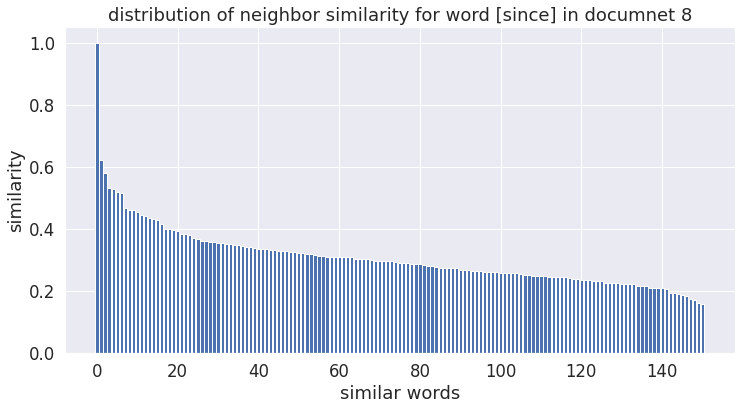

132   -->  president
1690
[1.0000001, 0.81612676, 0.80800676, 0.77922904, 0.66465414, 0.5911673, 0.58304405, 0.53975487, 0.5275099, 0.52593523, 0.5189692, 0.50557745, 0.49803394, 0.4792055, 0.47098416, 0.4607013, 0.4590069, 0.4513718, 0.44597253, 0.4320748, 0.43176693, 0.42283946, 0.41742775, 0.4157663, 0.41479695, 0.41239196, 0.40987873, 0.40869913, 0.40745658, 0.40204328, 0.3997475, 0.39847705, 0.39276144, 0.38915423, 0.38805103, 0.3850019, 0.38032794, 0.37889677, 0.37781906, 0.37623674, 0.37243968, 0.37239414, 0.3708647, 0.36879808, 0.36809212, 0.36718386, 0.36671245, 0.36668774, 0.3646618, 0.3624068, 0.36107603, 0.35940892, 0.3563791, 0.34965295, 0.3476713, 0.3470971, 0.3464243, 0.34501535, 0.3446251, 0.34433904, 0.34403443, 0.3437734, 0.34287104, 0.34152642, 0.34079587, 0.3390612, 0.33864227, 0.33795196, 0.328966, 0.3266395, 0.3265498, 0.32429004, 0.32365358, 0.32331812, 0.3208003, 0.3196354, 0.3183848, 0.3179268, 0.3173275, 0.31615123, 0.31400523, 0.31285554, 0.30951095, 0.303464

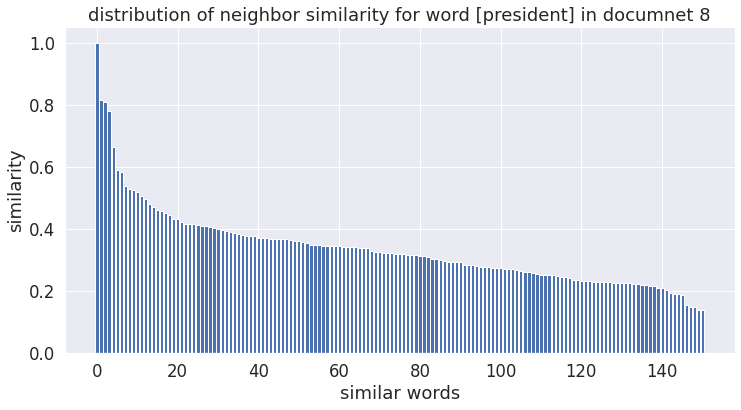

133   -->  nicola
1690
[0.99999994, 0.8620428, 0.7978438, 0.77922904, 0.5508889, 0.5344912, 0.52960145, 0.5250492, 0.51462877, 0.5034673, 0.49909216, 0.46903202, 0.46741775, 0.45932442, 0.4401712, 0.4259115, 0.41818693, 0.417319, 0.41728547, 0.40269962, 0.40023947, 0.39388195, 0.39117217, 0.38312805, 0.37633902, 0.37444392, 0.3743481, 0.37182254, 0.36549187, 0.3644691, 0.36082244, 0.35942185, 0.3535908, 0.35258847, 0.35236382, 0.35217977, 0.3519494, 0.3489303, 0.3470199, 0.34685203, 0.34594384, 0.34462953, 0.3378891, 0.33412874, 0.3291065, 0.32537013, 0.32014686, 0.3201114, 0.31788835, 0.31650996, 0.3162982, 0.31315142, 0.30573517, 0.30091932, 0.30079657, 0.29807353, 0.29721478, 0.29671925, 0.29523945, 0.29209465, 0.29121646, 0.2888925, 0.28852433, 0.2881565, 0.28792042, 0.287901, 0.28751534, 0.286772, 0.2852869, 0.28314885, 0.27943832, 0.27926192, 0.27921948, 0.27795228, 0.27748784, 0.2756376, 0.27433515, 0.27394712, 0.27325514, 0.2706473, 0.2694162, 0.26901156, 0.267392, 0.26722717, 

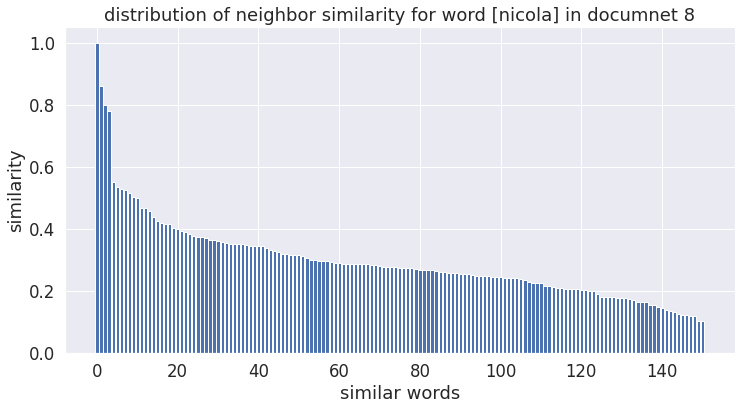

134   -->  ##e
1690
[1.0, 0.8293444, 0.81612676, 0.7978438, 0.53460765, 0.52228993, 0.5124131, 0.50673205, 0.5007981, 0.47911713, 0.4617024, 0.45213708, 0.45063695, 0.44373927, 0.44336915, 0.42783555, 0.42418036, 0.41069165, 0.40438122, 0.40003544, 0.39389452, 0.38849455, 0.38344026, 0.38168713, 0.37482083, 0.3743926, 0.36969015, 0.35518485, 0.35506195, 0.35436022, 0.34948084, 0.34906456, 0.34623456, 0.34149152, 0.3414829, 0.34046704, 0.34009573, 0.33782777, 0.33774543, 0.33661819, 0.33565974, 0.33336836, 0.33276483, 0.33062804, 0.32979375, 0.3266053, 0.3264444, 0.3239435, 0.32121605, 0.32040972, 0.3185976, 0.3184101, 0.3176007, 0.3167094, 0.31501234, 0.31440315, 0.3120649, 0.31129947, 0.3104511, 0.30709124, 0.30523276, 0.30435288, 0.30394998, 0.30244103, 0.30159396, 0.30037484, 0.29967898, 0.29790625, 0.2978632, 0.29749376, 0.2960447, 0.29540467, 0.29201293, 0.29137123, 0.2889424, 0.28875178, 0.2887255, 0.2886191, 0.28630537, 0.28546312, 0.28487974, 0.28474957, 0.28451794, 0.28313595,

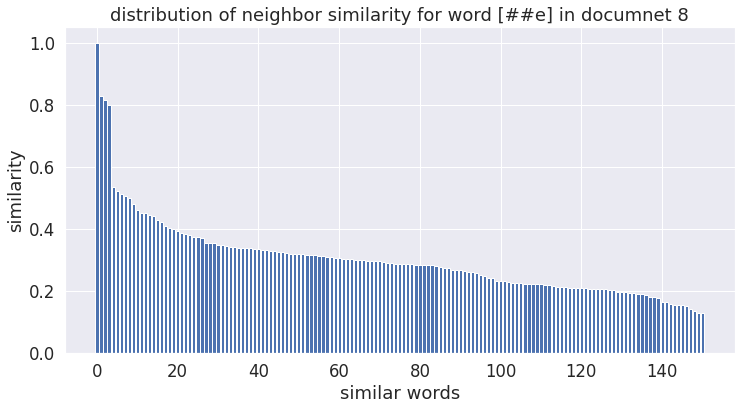

135   -->  ce
1690
[0.87938714, 0.87007594, 0.8542707, 0.7896858, 0.6142975, 0.55022, 0.53477335, 0.49375224, 0.49224254, 0.48986346, 0.4700678, 0.4624001, 0.44318813, 0.4414236, 0.43232933, 0.42837495, 0.42549044, 0.42388442, 0.41814068, 0.41476506, 0.41439813, 0.40036148, 0.3964295, 0.39348462, 0.38782513, 0.38610676, 0.3835572, 0.3807566, 0.37456542, 0.3711306, 0.3710013, 0.36909324, 0.3679008, 0.36666644, 0.36616835, 0.36497653, 0.36242944, 0.35418767, 0.3505928, 0.34976667, 0.33712953, 0.3368571, 0.33637896, 0.33182776, 0.33095983, 0.33058387, 0.33053303, 0.32827455, 0.327386, 0.32150778, 0.32016432, 0.31829855, 0.31828576, 0.314822, 0.31447554, 0.31424606, 0.31276128, 0.3118168, 0.3110543, 0.3108618, 0.30838192, 0.3081531, 0.3078869, 0.30477977, 0.30375147, 0.30068785, 0.29953325, 0.29933718, 0.29788768, 0.2977575, 0.29354233, 0.29001707, 0.28822616, 0.2847725, 0.28368816, 0.28146252, 0.28126538, 0.2784541, 0.27694088, 0.27375886, 0.27179384, 0.27120727, 0.2703892, 0.2701719, 0.2

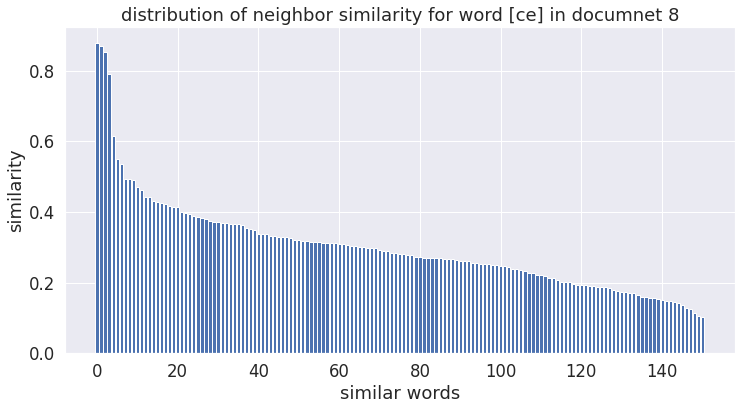

136   -->  ##aus
1690
[0.87811947, 0.8495076, 0.8076337, 0.8060721, 0.6070057, 0.5941892, 0.5493684, 0.50165117, 0.49700803, 0.49410188, 0.49102795, 0.47492862, 0.45041576, 0.44991407, 0.44049963, 0.43218434, 0.42989314, 0.4180601, 0.4170611, 0.41643456, 0.409306, 0.40440106, 0.40350744, 0.40050986, 0.40047407, 0.3993439, 0.3955056, 0.3933258, 0.38899523, 0.38795912, 0.3746742, 0.36474878, 0.3645404, 0.36411855, 0.36401004, 0.36370677, 0.3609531, 0.3592388, 0.3556098, 0.3549248, 0.3539142, 0.35171014, 0.35110885, 0.35048243, 0.3431108, 0.34246975, 0.3347482, 0.32588682, 0.32251915, 0.32233173, 0.32201657, 0.3214508, 0.31966394, 0.3193625, 0.31625056, 0.31616187, 0.3145743, 0.31387916, 0.3122368, 0.31023747, 0.30723062, 0.3057396, 0.30564946, 0.3027287, 0.3021428, 0.30048054, 0.30022562, 0.29946586, 0.29909873, 0.2983662, 0.2964322, 0.29504803, 0.29339564, 0.29297772, 0.29063275, 0.2884019, 0.28614938, 0.28600895, 0.2852249, 0.28430167, 0.28356314, 0.2832694, 0.27919847, 0.27335337, 0.2

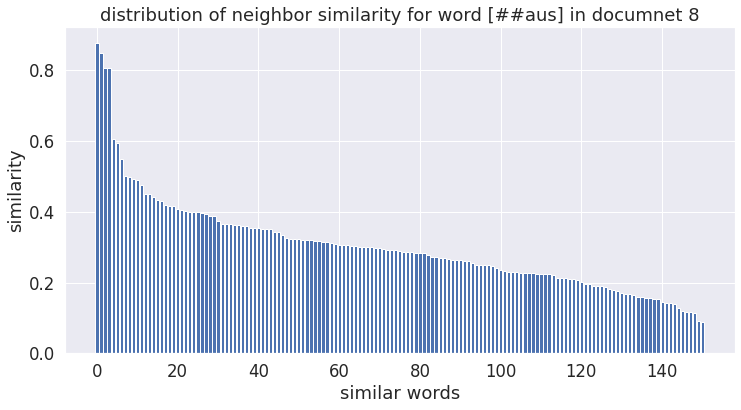

137   -->  ##escu
1690
[0.9999999, 0.8620428, 0.8293444, 0.80800676, 0.6469419, 0.571939, 0.5398655, 0.5235348, 0.51862085, 0.5126517, 0.48316586, 0.4829157, 0.4562333, 0.4554069, 0.4539674, 0.44587895, 0.4283973, 0.42256376, 0.4208281, 0.4089216, 0.40715182, 0.40423572, 0.40175748, 0.39897934, 0.3970209, 0.39684808, 0.39356574, 0.38694632, 0.38439405, 0.38351673, 0.38195416, 0.3734755, 0.37214112, 0.36765993, 0.36659488, 0.36092842, 0.3583946, 0.35667336, 0.35627592, 0.35600007, 0.34971228, 0.34924674, 0.34847766, 0.34387022, 0.33510947, 0.33064097, 0.328856, 0.32790327, 0.326848, 0.32527074, 0.3231058, 0.322979, 0.3196909, 0.31927562, 0.31895506, 0.3181904, 0.3180014, 0.31770244, 0.31683585, 0.3168087, 0.31516114, 0.31501213, 0.3143895, 0.31230086, 0.3112726, 0.31088275, 0.31083182, 0.3091342, 0.3068989, 0.306097, 0.30353743, 0.3030746, 0.30290723, 0.3017736, 0.29915422, 0.29718325, 0.2948994, 0.29474652, 0.29456663, 0.29188275, 0.2911973, 0.2888259, 0.28860846, 0.28720808, 0.287113,

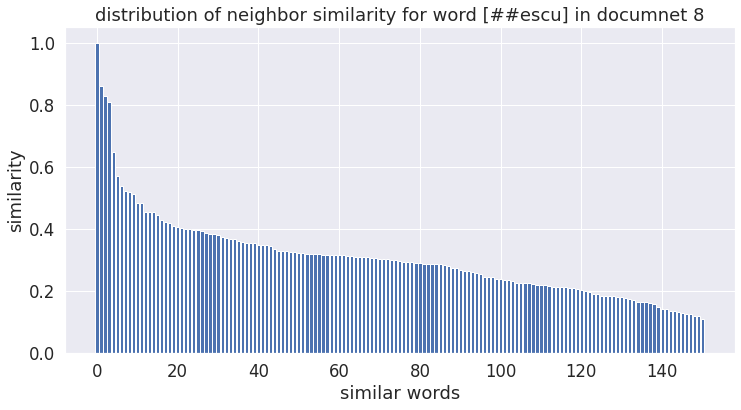

140   -->  overthrow
1690
[1.0000002, 0.66465414, 0.6469419, 0.5508889, 0.53460765, 0.52066326, 0.51927024, 0.4576206, 0.45296472, 0.4491691, 0.43923527, 0.42837226, 0.4276985, 0.426314, 0.42116785, 0.4170855, 0.41541484, 0.41173142, 0.4111591, 0.4085525, 0.40510446, 0.40050918, 0.40041697, 0.400218, 0.39744374, 0.3961439, 0.3903085, 0.3857093, 0.3824414, 0.37295672, 0.37215853, 0.36765364, 0.3660965, 0.36419848, 0.36300772, 0.36260533, 0.36228225, 0.36050305, 0.35647464, 0.3542629, 0.3503293, 0.34691983, 0.34657004, 0.3458913, 0.34425333, 0.34174895, 0.34129116, 0.3402846, 0.33810717, 0.33602196, 0.3352927, 0.33195508, 0.32953566, 0.32871217, 0.3276369, 0.32707438, 0.32629007, 0.32392865, 0.32366037, 0.32285488, 0.32088816, 0.31826282, 0.31800285, 0.3149227, 0.31454998, 0.31182414, 0.3107409, 0.3102623, 0.30973595, 0.309538, 0.30945784, 0.30820477, 0.30817586, 0.3059286, 0.30441803, 0.3042337, 0.30409163, 0.30153066, 0.30075407, 0.29853263, 0.29821146, 0.29727966, 0.29724813, 0.296377

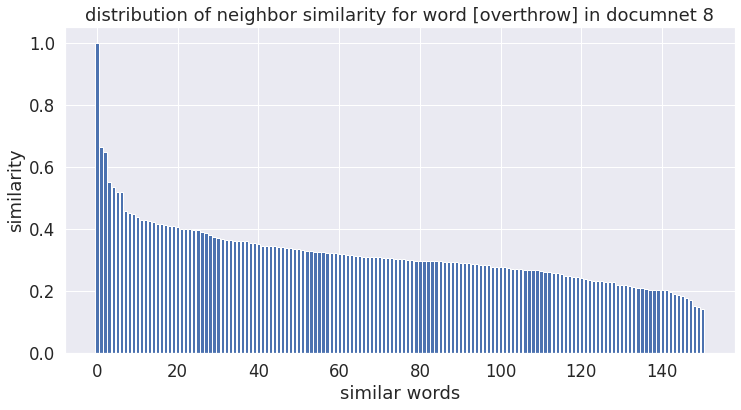

144   -->  urging
1690
[1.0000001, 0.68833196, 0.54260385, 0.4437748, 0.44334307, 0.3850728, 0.37505907, 0.34948164, 0.33039486, 0.32094488, 0.30303267, 0.30195802, 0.2957698, 0.2953558, 0.29332292, 0.27185917, 0.27185148, 0.2665252, 0.26060447, 0.2603368, 0.2574268, 0.2553204, 0.25221258, 0.25071332, 0.2490487, 0.24883392, 0.24697092, 0.2452969, 0.24396934, 0.24229407, 0.24202868, 0.24047759, 0.23992671, 0.23964666, 0.23771882, 0.2376669, 0.23651886, 0.23345011, 0.2324687, 0.22633961, 0.22602046, 0.22391775, 0.22377327, 0.22143117, 0.22060212, 0.22039267, 0.21938705, 0.21678174, 0.21382752, 0.21308482, 0.21172339, 0.21157122, 0.20974681, 0.20853916, 0.20825374, 0.20489305, 0.20415641, 0.20123121, 0.19802639, 0.19535746, 0.19419792, 0.1916256, 0.19146794, 0.19110897, 0.18946135, 0.18624064, 0.18475287, 0.18324283, 0.1814872, 0.18101609, 0.17959963, 0.17927858, 0.1779671, 0.17704585, 0.17689751, 0.176535, 0.1760654, 0.17569296, 0.1755065, 0.17265001, 0.17189008, 0.17059359, 0.16725883, 

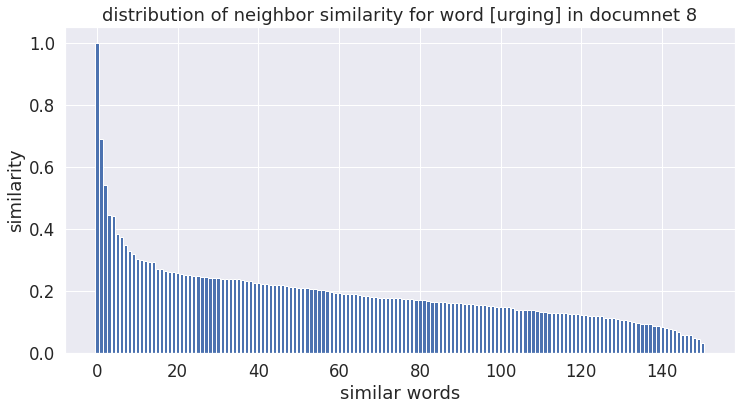

146   -->  party
1690
[0.6596135, 0.62879837, 0.60631967, 0.55705404, 0.55208814, 0.5250844, 0.49102396, 0.487209, 0.48283496, 0.4621529, 0.46166557, 0.45429683, 0.43900082, 0.4346081, 0.42564484, 0.4255798, 0.4213738, 0.41109523, 0.4096139, 0.40787166, 0.40722823, 0.40552747, 0.4027084, 0.40027803, 0.398932, 0.39603937, 0.39172316, 0.3875907, 0.38654953, 0.37968352, 0.37851995, 0.36996222, 0.3697623, 0.36931905, 0.36418575, 0.35816374, 0.35801074, 0.3556025, 0.35236245, 0.35231167, 0.3480638, 0.34623086, 0.34587413, 0.3454712, 0.34492397, 0.3445482, 0.33646807, 0.33546445, 0.33423376, 0.33374274, 0.3292098, 0.3271376, 0.3269984, 0.32551992, 0.3254259, 0.32468274, 0.3239442, 0.3188349, 0.3159557, 0.3148436, 0.31418633, 0.31373423, 0.31264183, 0.3118857, 0.31112832, 0.31069475, 0.3102527, 0.30741853, 0.30734792, 0.30511653, 0.30233294, 0.30211467, 0.30163607, 0.2995882, 0.29943347, 0.2987693, 0.29789162, 0.29675788, 0.29624254, 0.29523814, 0.29504988, 0.29415286, 0.29387516, 0.29028183,

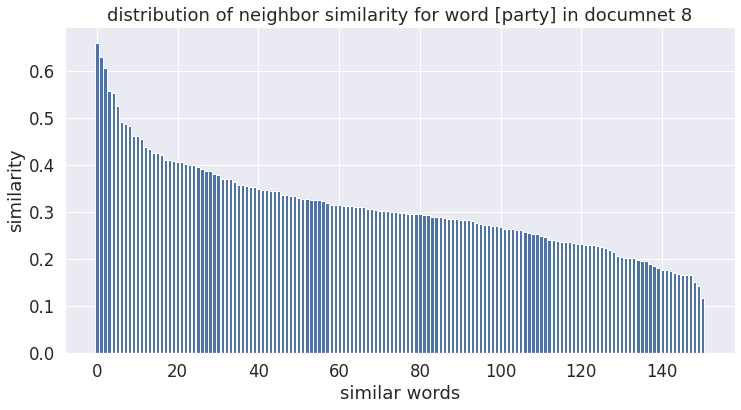

149   -->  dissolution
1690
[1.0, 0.5770352, 0.52066326, 0.47098416, 0.4581012, 0.4551738, 0.45465863, 0.4437748, 0.4435324, 0.4374191, 0.43719363, 0.43379194, 0.43352038, 0.41728547, 0.4170083, 0.41207597, 0.39897934, 0.39405787, 0.39294875, 0.3753722, 0.37233016, 0.37121812, 0.36837465, 0.36301377, 0.35679686, 0.35436022, 0.35257757, 0.34967268, 0.34769687, 0.34717336, 0.34153423, 0.34075168, 0.33844554, 0.3317569, 0.32924202, 0.3277583, 0.32572305, 0.3200767, 0.31794977, 0.31225055, 0.30624306, 0.30478168, 0.30398187, 0.3014934, 0.30128843, 0.29841775, 0.29813787, 0.29463446, 0.2922715, 0.2921222, 0.29074603, 0.2906239, 0.2891648, 0.2878948, 0.28718063, 0.28501806, 0.28292224, 0.28249562, 0.2815981, 0.280761, 0.2797942, 0.2775752, 0.2773576, 0.27551413, 0.27456254, 0.27318338, 0.27256712, 0.2689036, 0.26852304, 0.26740795, 0.2667116, 0.26479274, 0.26285186, 0.26275158, 0.262296, 0.26180285, 0.25950572, 0.25932673, 0.25868997, 0.25809252, 0.2580895, 0.25767064, 0.2522826, 0.25082716,

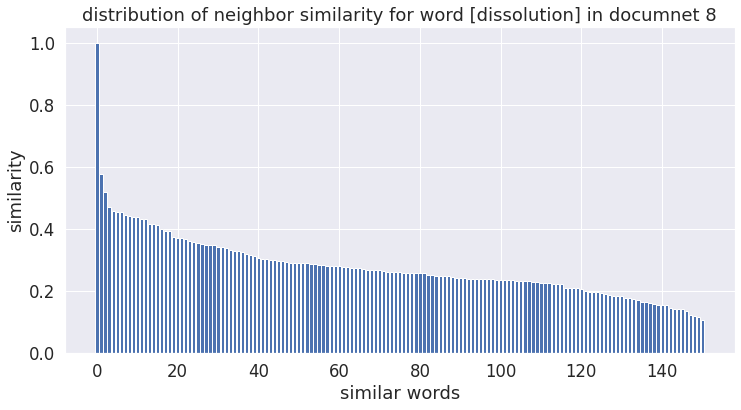

150   -->  appear
1690
[0.99999964, 0.6412444, 0.6096241, 0.5766507, 0.5498449, 0.5472816, 0.52819586, 0.5220146, 0.51020455, 0.49697566, 0.483409, 0.4743334, 0.465523, 0.4619342, 0.4481791, 0.4320748, 0.4259115, 0.42418036, 0.42256376, 0.3792488, 0.37490863, 0.37196344, 0.36986136, 0.36643016, 0.35759893, 0.34771544, 0.34633932, 0.3446421, 0.34005553, 0.33677852, 0.33408064, 0.3326814, 0.33258027, 0.33153555, 0.32796687, 0.32412535, 0.32325125, 0.32242674, 0.31996855, 0.31925088, 0.31873947, 0.31800285, 0.31133872, 0.31128877, 0.3098747, 0.30835533, 0.30795306, 0.3076107, 0.3048534, 0.30453408, 0.30350947, 0.30263147, 0.30128843, 0.3002944, 0.30015245, 0.29972148, 0.2957698, 0.29516223, 0.29410145, 0.29399338, 0.2890271, 0.28896493, 0.28788933, 0.28779402, 0.2875039, 0.28680074, 0.28605682, 0.2837822, 0.2813062, 0.2803688, 0.2778644, 0.27472594, 0.2744426, 0.2744046, 0.27140284, 0.2711705, 0.26548266, 0.2643364, 0.26195276, 0.2611328, 0.26067564, 0.25972006, 0.25743383, 0.25653845, 0.

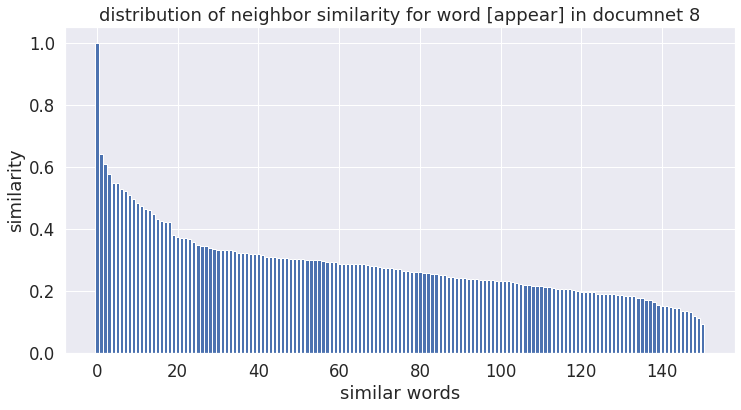

153   -->  high
1690
[1.0, 0.8420831, 0.72321856, 0.6543212, 0.5403016, 0.52819586, 0.51672626, 0.48279685, 0.4805107, 0.45378384, 0.44777465, 0.4469894, 0.41711128, 0.416253, 0.4147945, 0.41422865, 0.40015042, 0.39443985, 0.38967764, 0.37832206, 0.37268466, 0.37198752, 0.37006766, 0.3693286, 0.36911735, 0.36671245, 0.366072, 0.36093736, 0.3609033, 0.3594514, 0.35738474, 0.35597757, 0.3545012, 0.35292763, 0.35091475, 0.34883413, 0.34591186, 0.34213647, 0.34057552, 0.3373149, 0.33557475, 0.3324837, 0.33213902, 0.32965893, 0.3277112, 0.32606316, 0.32211924, 0.32018155, 0.3191679, 0.3175997, 0.31743062, 0.3158863, 0.31549552, 0.31540996, 0.31526738, 0.31479436, 0.31385493, 0.3107409, 0.3043593, 0.30394998, 0.30286735, 0.3017641, 0.3014476, 0.3013134, 0.2992583, 0.2979244, 0.29734594, 0.29721978, 0.2970962, 0.29672882, 0.2965523, 0.29654086, 0.29258955, 0.2919076, 0.29188275, 0.2911589, 0.29106402, 0.28920275, 0.28835905, 0.28712463, 0.28672817, 0.28661507, 0.2864076, 0.28496253, 0.2832296

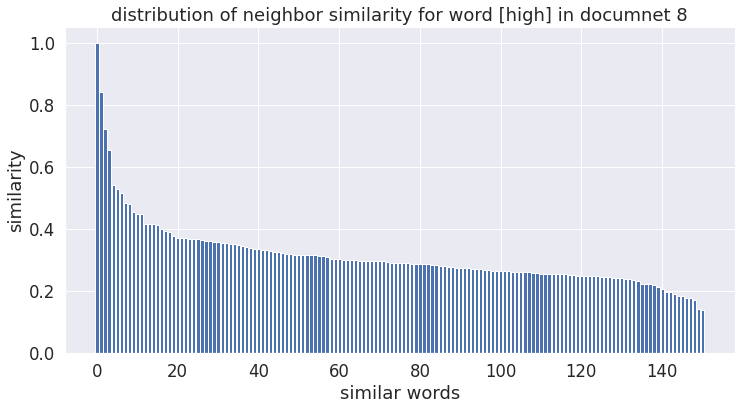

155   -->  ranking
1690
[1.0, 0.8420831, 0.77587163, 0.55262375, 0.5190356, 0.4899796, 0.4743334, 0.46988598, 0.4543674, 0.44893616, 0.4456975, 0.4183926, 0.40227342, 0.40153784, 0.4009069, 0.3904811, 0.37848043, 0.37262076, 0.36939514, 0.36548418, 0.36477107, 0.35106874, 0.3464243, 0.3450287, 0.3433449, 0.3423023, 0.34174895, 0.3400037, 0.33932215, 0.3356578, 0.33455324, 0.33354393, 0.33319998, 0.33124214, 0.3312017, 0.3296679, 0.32952505, 0.32707465, 0.32682145, 0.32451352, 0.32424092, 0.32386976, 0.32223037, 0.31948388, 0.3169436, 0.31219676, 0.3090344, 0.30525035, 0.30251452, 0.30244905, 0.30133668, 0.30019957, 0.2946303, 0.2930159, 0.29204237, 0.2913214, 0.29007557, 0.28934163, 0.28876182, 0.28867126, 0.2886191, 0.28755653, 0.28629607, 0.2808448, 0.2801987, 0.27931005, 0.27691272, 0.276405, 0.27615017, 0.2760958, 0.27607036, 0.27202612, 0.2702159, 0.26884025, 0.26842797, 0.26830018, 0.2681949, 0.2678044, 0.26646668, 0.26583046, 0.26460603, 0.26451448, 0.2643324, 0.26406068, 0.2640

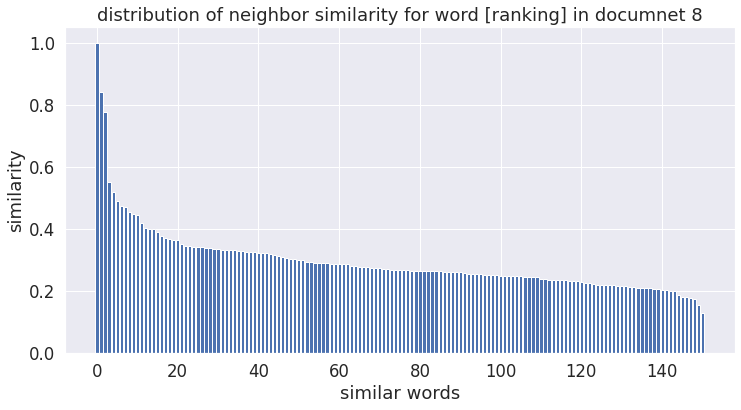

156   -->  officials
1690
[1.0, 0.77587163, 0.72321856, 0.6374607, 0.56760323, 0.54265004, 0.5333625, 0.5135843, 0.4827765, 0.47126278, 0.4619342, 0.4512461, 0.44242314, 0.44083798, 0.43766513, 0.4272498, 0.42098147, 0.40233982, 0.39958906, 0.3972263, 0.39660716, 0.39280516, 0.3850019, 0.38164616, 0.37722567, 0.37296313, 0.3719855, 0.36782125, 0.36315605, 0.35558295, 0.35485786, 0.35462755, 0.3525914, 0.3510863, 0.3503293, 0.3493846, 0.34803745, 0.34635788, 0.3462407, 0.34378535, 0.3397324, 0.33884597, 0.33693242, 0.3334444, 0.3331123, 0.3324628, 0.3319268, 0.3305601, 0.33050793, 0.32950985, 0.3285926, 0.32752705, 0.32555425, 0.32446766, 0.32429844, 0.32095176, 0.31587577, 0.31440315, 0.3116469, 0.3108638, 0.31075034, 0.3090371, 0.3084283, 0.30495703, 0.3041636, 0.2994725, 0.29845518, 0.2975905, 0.29721478, 0.2953558, 0.2922134, 0.29064488, 0.29052502, 0.28935552, 0.288875, 0.28860846, 0.2878899, 0.28768554, 0.28650677, 0.28641137, 0.28614193, 0.2853544, 0.28351146, 0.28160396, 0.28143

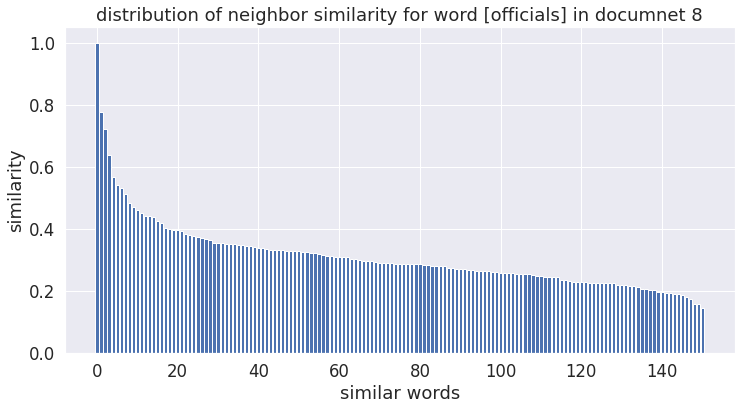

157   -->  seeking
1690
[0.9999999, 0.6374607, 0.5403016, 0.5190356, 0.50355446, 0.48205343, 0.45547265, 0.45213547, 0.4481791, 0.44334307, 0.4372969, 0.3952101, 0.39499032, 0.37948364, 0.36936322, 0.35586149, 0.34898633, 0.34573036, 0.34263572, 0.34136784, 0.33359873, 0.33082056, 0.3302895, 0.3299954, 0.32908374, 0.3277889, 0.3252021, 0.32330453, 0.3218508, 0.3163479, 0.31516218, 0.31461072, 0.30810812, 0.30782774, 0.30689877, 0.30640715, 0.30430168, 0.30251288, 0.3002233, 0.29853263, 0.29778653, 0.29705918, 0.29514378, 0.2946573, 0.2942858, 0.29310715, 0.29227614, 0.29156727, 0.28991008, 0.28701302, 0.28413108, 0.28343463, 0.27795228, 0.27704415, 0.27477866, 0.272366, 0.27205077, 0.27196684, 0.27006146, 0.26973444, 0.26618555, 0.26353702, 0.26285186, 0.26089573, 0.25706774, 0.25696844, 0.25637397, 0.2560273, 0.25529426, 0.25313678, 0.25287044, 0.25224084, 0.2504333, 0.24978946, 0.24940255, 0.2452398, 0.24099189, 0.23990127, 0.23984969, 0.23676892, 0.23619416, 0.23477738, 0.23395476, 

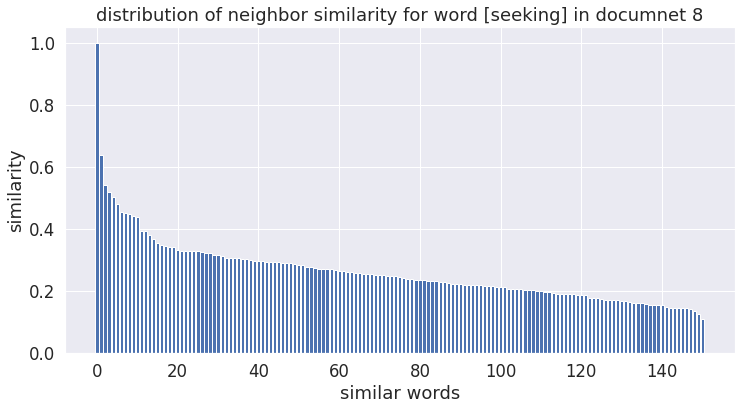

159   -->  new
1690
[0.78414977, 0.7318384, 0.56518734, 0.48978195, 0.47461116, 0.46690235, 0.42759854, 0.42257527, 0.41898316, 0.40898868, 0.40269426, 0.39459822, 0.3938074, 0.39171845, 0.39136308, 0.39084455, 0.39012975, 0.38751468, 0.38674968, 0.38604984, 0.38446677, 0.3842402, 0.38047364, 0.3793133, 0.37591866, 0.37531728, 0.3737121, 0.37323853, 0.36737218, 0.36735737, 0.36735338, 0.3662982, 0.36378068, 0.36371025, 0.36295614, 0.3623699, 0.36163652, 0.36141762, 0.36115128, 0.35918778, 0.35752076, 0.35489655, 0.35292262, 0.3526281, 0.34719178, 0.3468187, 0.34598216, 0.34528375, 0.3423488, 0.34225175, 0.34124923, 0.33911377, 0.338059, 0.33780557, 0.33710438, 0.33573565, 0.33534297, 0.33426243, 0.33302933, 0.33248103, 0.33212754, 0.332014, 0.33166784, 0.33165812, 0.33099237, 0.32916012, 0.32887587, 0.32786143, 0.3266943, 0.324432, 0.32401323, 0.32355344, 0.32322305, 0.32257617, 0.32037264, 0.3203615, 0.3201273, 0.31898063, 0.31785518, 0.31728685, 0.3167798, 0.31445065, 0.31116012, 0.3

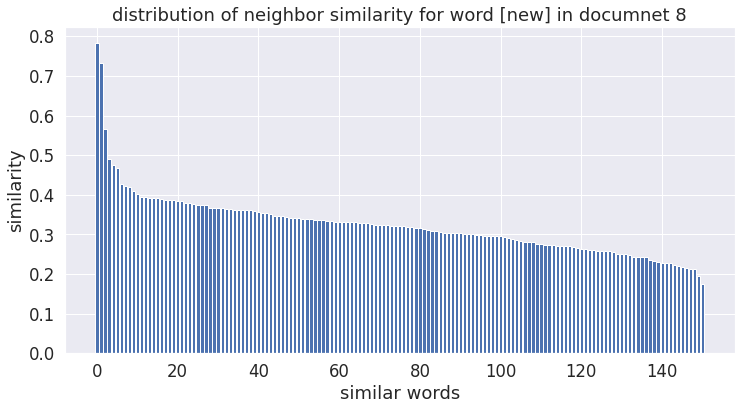

160   -->  political
1690
[1.0000001, 0.76606524, 0.51672626, 0.5135843, 0.50355446, 0.4899796, 0.44369942, 0.43621904, 0.42940593, 0.42473865, 0.4171071, 0.40987873, 0.39875135, 0.39757812, 0.39654866, 0.39046818, 0.38886338, 0.38804042, 0.387482, 0.3854934, 0.3838532, 0.3822382, 0.3792488, 0.37646565, 0.3760606, 0.37549335, 0.37461007, 0.37279493, 0.37215766, 0.3711921, 0.37013826, 0.36951658, 0.36935577, 0.36831504, 0.36419848, 0.362948, 0.3602091, 0.35882393, 0.35877156, 0.35795334, 0.35744184, 0.35720456, 0.35703334, 0.35627592, 0.35566318, 0.35236382, 0.35187113, 0.35095125, 0.35089213, 0.35027242, 0.35021603, 0.34679633, 0.3464955, 0.34379143, 0.34373522, 0.34353423, 0.3424903, 0.3414725, 0.3376376, 0.33563036, 0.3353849, 0.3331746, 0.3328029, 0.33276483, 0.33239096, 0.33178318, 0.33151513, 0.33024597, 0.32715213, 0.32677847, 0.32600614, 0.32578868, 0.32515973, 0.3246343, 0.32406756, 0.3233809, 0.32012528, 0.31801203, 0.31696728, 0.31662506, 0.31623614, 0.31555873, 0.31555638, 0

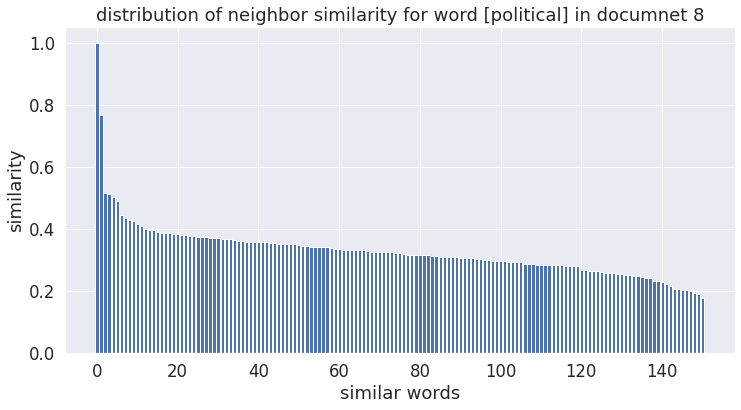

161   -->  profile
1690
[1.0000002, 0.76606524, 0.48205343, 0.47126278, 0.4543674, 0.45378384, 0.4209379, 0.4208961, 0.3733207, 0.37214902, 0.36986136, 0.36559474, 0.3624026, 0.3606775, 0.35789332, 0.35708648, 0.35368863, 0.35319376, 0.35035, 0.34837866, 0.34791112, 0.3420754, 0.3411735, 0.34111404, 0.34035152, 0.3374542, 0.33713797, 0.3365428, 0.33528626, 0.33499625, 0.33373892, 0.33313012, 0.33012342, 0.3299791, 0.32849228, 0.32707438, 0.32655656, 0.32639414, 0.32577926, 0.3248648, 0.32328576, 0.32263193, 0.31989804, 0.31952053, 0.3195004, 0.31873003, 0.3180127, 0.3155709, 0.3134769, 0.31246898, 0.31229734, 0.31204742, 0.31185097, 0.3117404, 0.3108788, 0.31032556, 0.31030646, 0.30998468, 0.30974633, 0.30822688, 0.30669236, 0.3043731, 0.3041609, 0.30364496, 0.30246976, 0.3009278, 0.29960933, 0.29840925, 0.29720533, 0.29366857, 0.292441, 0.29240865, 0.29139882, 0.28941813, 0.2891648, 0.28831577, 0.28735018, 0.2866637, 0.28634787, 0.28527412, 0.28515834, 0.28415433, 0.28039843, 0.278613

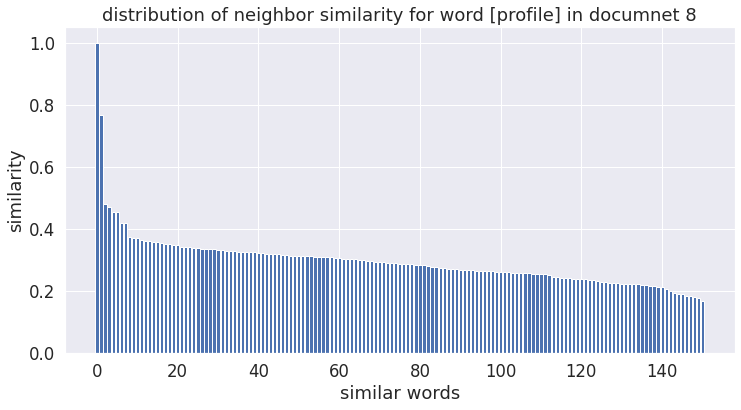

164   -->  open
1690
[1.0, 0.79263294, 0.67618155, 0.61279273, 0.6096258, 0.44872248, 0.44548506, 0.42831767, 0.36935577, 0.3384019, 0.32639414, 0.3189537, 0.3183848, 0.31023097, 0.30763274, 0.29813787, 0.29581073, 0.2953647, 0.29490763, 0.29459885, 0.2940841, 0.2895258, 0.28582478, 0.28185257, 0.27941793, 0.27629364, 0.27575737, 0.2735501, 0.2724627, 0.27113095, 0.27035147, 0.2689368, 0.2656681, 0.26410767, 0.26358622, 0.26356858, 0.2631694, 0.26252234, 0.25948116, 0.25676715, 0.25638083, 0.25578523, 0.25312144, 0.2526908, 0.2517234, 0.2515391, 0.24964881, 0.24754336, 0.24723828, 0.24595723, 0.2437779, 0.24328384, 0.24253449, 0.24233407, 0.24176633, 0.24143615, 0.23915681, 0.23903264, 0.23878856, 0.23661917, 0.23517513, 0.23263386, 0.23102762, 0.23069222, 0.22954392, 0.22940789, 0.22909832, 0.2283544, 0.22509703, 0.22471857, 0.22467485, 0.22302702, 0.22247568, 0.22184247, 0.22134012, 0.22105195, 0.22022416, 0.2179102, 0.21610627, 0.21582492, 0.21561658, 0.21396938, 0.2135486, 0.212399

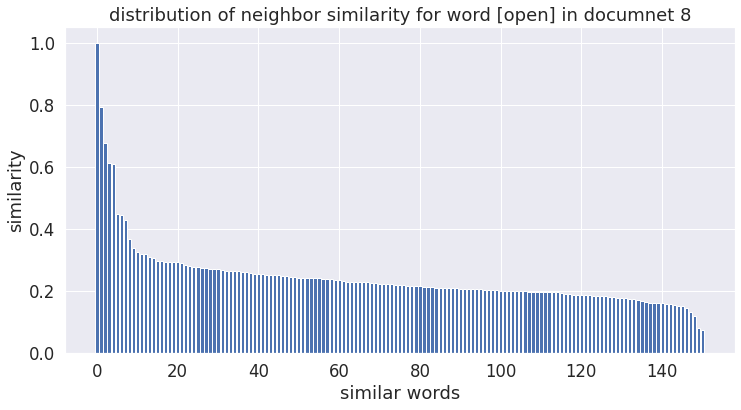

165   -->  elections
1690
[1.0, 0.79263294, 0.72753775, 0.68918747, 0.5642679, 0.48830375, 0.38362604, 0.3464955, 0.34391603, 0.34217447, 0.33864227, 0.3386317, 0.3323964, 0.3288893, 0.32815915, 0.31825435, 0.31808043, 0.31706437, 0.31683585, 0.3109166, 0.30858657, 0.30639482, 0.3061592, 0.30263147, 0.3011998, 0.29966015, 0.29720533, 0.29679048, 0.29570353, 0.2942806, 0.29393464, 0.2937209, 0.29363483, 0.29151756, 0.28638995, 0.28508854, 0.28375977, 0.28260213, 0.28118035, 0.27926192, 0.2791646, 0.27855068, 0.2775752, 0.27669376, 0.27353394, 0.27291542, 0.2728266, 0.2726982, 0.27134478, 0.27065212, 0.27047604, 0.26987416, 0.26769853, 0.26760232, 0.26644337, 0.265961, 0.26476413, 0.26288772, 0.26265547, 0.26194245, 0.2613058, 0.2587978, 0.25802067, 0.2563933, 0.25551772, 0.25518864, 0.25347054, 0.25331885, 0.25314122, 0.25255746, 0.25232244, 0.25193503, 0.25173315, 0.25132382, 0.25097567, 0.24912837, 0.24891132, 0.24878988, 0.24773505, 0.2477001, 0.2464896, 0.245832, 0.2440318, 0.243782

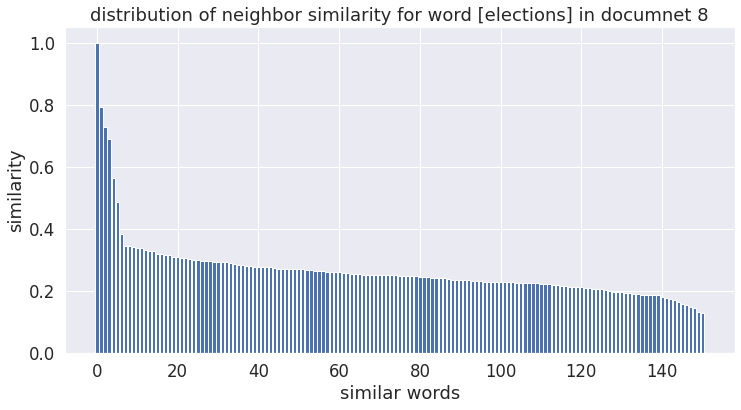

167   -->  held
1690
[1.0000002, 0.79076636, 0.72753775, 0.67618155, 0.51997006, 0.49817717, 0.4606289, 0.3563791, 0.35021603, 0.3423552, 0.34182337, 0.3363217, 0.33392745, 0.33009905, 0.32668105, 0.3250503, 0.31927562, 0.31911707, 0.31894577, 0.31329298, 0.31026733, 0.30808622, 0.30765697, 0.3067414, 0.30348593, 0.30331644, 0.30325276, 0.3011564, 0.29796734, 0.29749376, 0.29453018, 0.29240865, 0.28893024, 0.28861678, 0.28831655, 0.28790188, 0.28788933, 0.28668338, 0.28634602, 0.2854278, 0.28504196, 0.28403586, 0.2826277, 0.2825932, 0.2815861, 0.2801007, 0.27993602, 0.27977043, 0.27789176, 0.27713424, 0.27705804, 0.2762357, 0.27609, 0.27601957, 0.27521276, 0.27420527, 0.2733668, 0.2724644, 0.27107775, 0.2703996, 0.2689105, 0.26627406, 0.26428908, 0.26012605, 0.25990254, 0.25854096, 0.25811163, 0.2580895, 0.25757888, 0.25746688, 0.25674137, 0.25448328, 0.25314736, 0.25252876, 0.25223058, 0.24922422, 0.24908702, 0.24897048, 0.24817556, 0.24731812, 0.24670196, 0.24576554, 0.24529183, 0.24

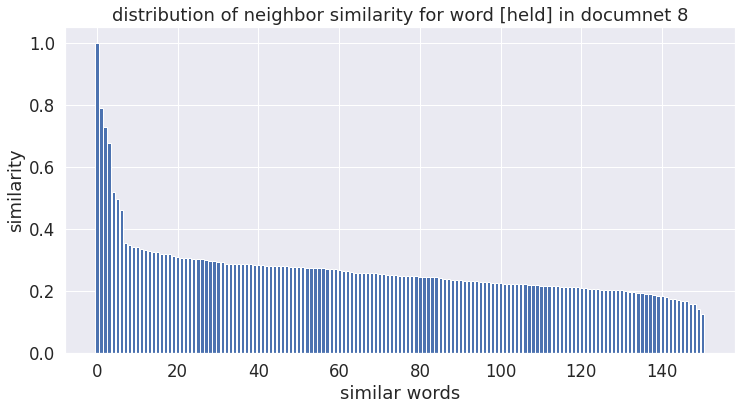

169   -->  swirl
1690
[0.659191, 0.6351137, 0.5523562, 0.5313659, 0.50751495, 0.49513468, 0.4944104, 0.4842965, 0.4602298, 0.4577393, 0.4348669, 0.42106435, 0.4189121, 0.41852754, 0.41326356, 0.40414932, 0.40291318, 0.3969698, 0.3860153, 0.38577533, 0.38454127, 0.38253087, 0.3818574, 0.37232494, 0.3717584, 0.37141505, 0.3688025, 0.36835846, 0.3653491, 0.36404723, 0.36226594, 0.35682324, 0.35643572, 0.35512725, 0.35379547, 0.3519796, 0.351301, 0.34907597, 0.34836185, 0.34574708, 0.34436402, 0.34091914, 0.33586764, 0.33168328, 0.32843888, 0.32841572, 0.32681474, 0.325448, 0.3252622, 0.32515138, 0.32408565, 0.3239835, 0.3226028, 0.32191852, 0.31952694, 0.31867954, 0.31456733, 0.31423205, 0.31323043, 0.31313762, 0.30860302, 0.30801448, 0.30774617, 0.30688953, 0.3055981, 0.3017851, 0.3006038, 0.2994364, 0.29798946, 0.29670644, 0.29072508, 0.28922963, 0.2888776, 0.2840404, 0.28251296, 0.28110957, 0.27897507, 0.2780069, 0.27529335, 0.27425212, 0.2718892, 0.26949078, 0.26854238, 0.26748028, 0.

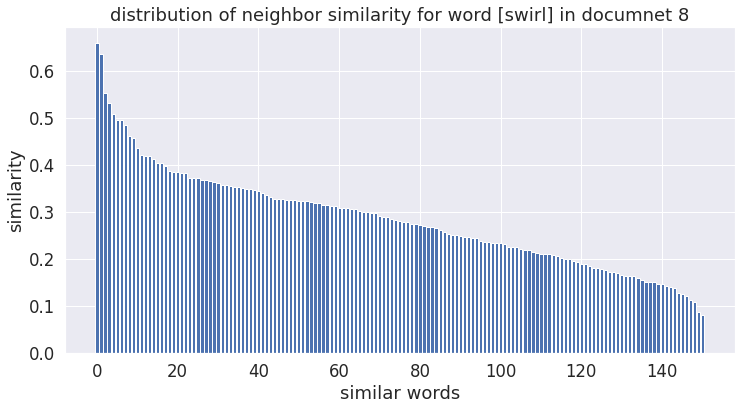

171   -->  revolutionary
1690
[0.839608, 0.5755986, 0.571025, 0.562826, 0.5450703, 0.5435747, 0.53384995, 0.53166807, 0.51071113, 0.5083283, 0.49697763, 0.48268872, 0.46619204, 0.4615181, 0.45317733, 0.45082402, 0.44726098, 0.4402722, 0.43803346, 0.42883253, 0.4264865, 0.42244518, 0.4208084, 0.41783315, 0.41707218, 0.41402614, 0.41265878, 0.4122845, 0.41212755, 0.40913618, 0.40379196, 0.39903325, 0.39761695, 0.39223698, 0.39208454, 0.39180726, 0.39089113, 0.38994253, 0.3886543, 0.38606352, 0.3859262, 0.3807323, 0.37603673, 0.37393725, 0.37381262, 0.37190098, 0.3686666, 0.3674414, 0.36409795, 0.3552085, 0.3508749, 0.3508463, 0.3505992, 0.34961903, 0.3491288, 0.34112543, 0.34056816, 0.34007198, 0.33991742, 0.33736622, 0.33511704, 0.33278686, 0.33111224, 0.33062258, 0.32965347, 0.32939428, 0.32818317, 0.3240435, 0.3238824, 0.32257503, 0.32197416, 0.32187334, 0.32082248, 0.31920034, 0.3153115, 0.31354988, 0.3110437, 0.3086666, 0.30705646, 0.30676287, 0.3053399, 0.3050658, 0.30059567, 0.299

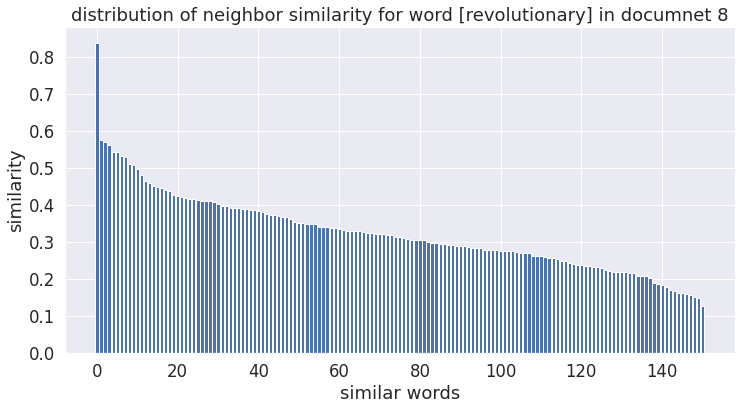

172   -->  fe
1690
[0.85816497, 0.5945855, 0.5746796, 0.54386944, 0.5036174, 0.47891605, 0.4705193, 0.46182927, 0.45626915, 0.4536616, 0.43908143, 0.42623007, 0.42618853, 0.42569745, 0.42179778, 0.42074218, 0.42068446, 0.41873857, 0.41808665, 0.40887052, 0.40463197, 0.4007889, 0.3997891, 0.39718193, 0.39648148, 0.3962902, 0.39263898, 0.3908747, 0.38464418, 0.3844936, 0.3800316, 0.37954134, 0.37898362, 0.37727344, 0.37496135, 0.37274107, 0.3718666, 0.37171936, 0.3680209, 0.36791965, 0.36567953, 0.3595034, 0.3581223, 0.3577447, 0.3572997, 0.35704812, 0.3545246, 0.3429347, 0.34206027, 0.34157497, 0.34151265, 0.331859, 0.33028892, 0.32871628, 0.32505924, 0.32070604, 0.31336707, 0.31288153, 0.3115942, 0.31024945, 0.30827022, 0.30577105, 0.30387625, 0.29998043, 0.2998179, 0.29609668, 0.29480374, 0.29367405, 0.2935025, 0.292022, 0.28781202, 0.2868733, 0.28678524, 0.2864771, 0.28639817, 0.28449747, 0.28330332, 0.2829159, 0.28186816, 0.2788937, 0.27731216, 0.27722347, 0.27578595, 0.27507108, 0.

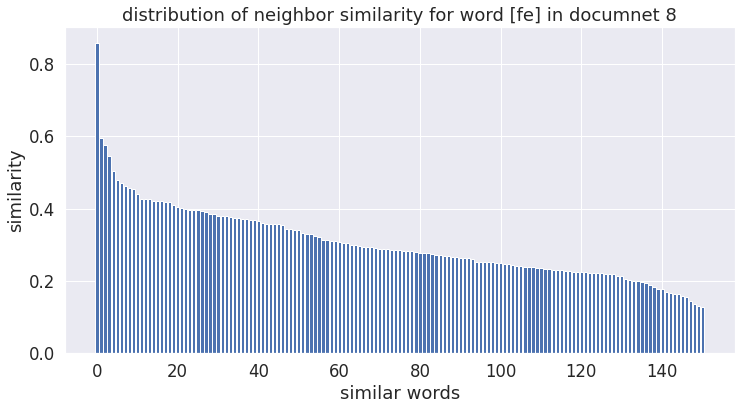

173   -->  ##r
1690
[0.8697638, 0.55132604, 0.50855863, 0.4987663, 0.49873284, 0.4903732, 0.478533, 0.45889753, 0.45663288, 0.44700336, 0.44585788, 0.44432032, 0.44370434, 0.43636942, 0.43099982, 0.43082196, 0.42869908, 0.4257724, 0.41910756, 0.41750458, 0.41694954, 0.4145289, 0.41282296, 0.41181573, 0.40770802, 0.40635502, 0.40476, 0.40417904, 0.40407264, 0.40276825, 0.40013444, 0.39983743, 0.39660144, 0.39360708, 0.39009047, 0.38600743, 0.3818931, 0.37849984, 0.37825027, 0.37475947, 0.3745645, 0.37107885, 0.3698324, 0.36722454, 0.3629273, 0.3627271, 0.3531681, 0.35259873, 0.35147017, 0.3495717, 0.34613466, 0.3405447, 0.33938164, 0.33932632, 0.33903483, 0.3338486, 0.3326192, 0.33160633, 0.3285476, 0.32615906, 0.3239115, 0.32299, 0.3208201, 0.3157547, 0.31490648, 0.3141631, 0.31322378, 0.31085405, 0.3069019, 0.30644318, 0.3062086, 0.3019583, 0.30102575, 0.29391688, 0.28630906, 0.28531346, 0.28467667, 0.28126997, 0.28107357, 0.27888286, 0.27598852, 0.2757851, 0.27013242, 0.26878917, 0.2

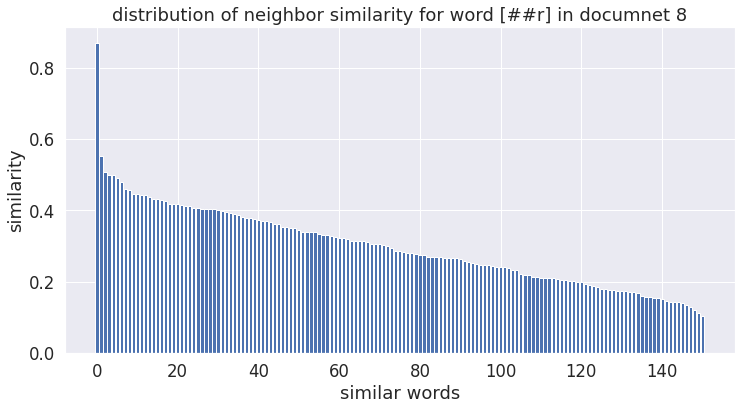

174   -->  ##vor
1690
[0.7074182, 0.63849115, 0.6157051, 0.60222983, 0.6006324, 0.5635394, 0.5610706, 0.5364044, 0.52695197, 0.4931218, 0.49097356, 0.4899796, 0.48503008, 0.4776221, 0.4720241, 0.46182793, 0.45745558, 0.4476462, 0.4463573, 0.4437238, 0.43908608, 0.43857092, 0.4383366, 0.42916325, 0.4189007, 0.41732338, 0.41661668, 0.40935314, 0.40845233, 0.40527532, 0.40425384, 0.39805275, 0.39427763, 0.39419377, 0.39334908, 0.38850045, 0.38824695, 0.38625047, 0.38072956, 0.37827608, 0.37494802, 0.37421602, 0.3674507, 0.36723137, 0.36458892, 0.3631071, 0.36117858, 0.35965085, 0.35635665, 0.3547525, 0.3535874, 0.35352117, 0.34145892, 0.34036422, 0.33765933, 0.33740103, 0.3360236, 0.33488768, 0.3348183, 0.3290174, 0.32747817, 0.3250677, 0.32501012, 0.31944036, 0.31769317, 0.31731611, 0.31608444, 0.3105725, 0.30782282, 0.30610377, 0.3050197, 0.3049904, 0.301861, 0.29951108, 0.29779863, 0.29778332, 0.2921965, 0.28756595, 0.28736946, 0.2863147, 0.28462803, 0.28331086, 0.2811728, 0.2810614, 0

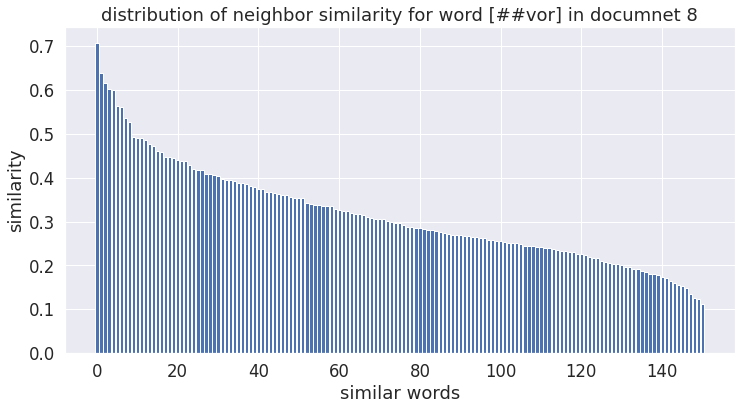

176   -->  eager
1690
[1.0, 0.87140024, 0.56660694, 0.55988026, 0.53011864, 0.5169529, 0.5063759, 0.5020252, 0.49403846, 0.4910109, 0.44535476, 0.445158, 0.44278365, 0.44066796, 0.43418676, 0.43250307, 0.429025, 0.42707258, 0.42276412, 0.41632286, 0.41014206, 0.40776598, 0.40272936, 0.3985569, 0.3971591, 0.39509934, 0.39421564, 0.39229238, 0.3917286, 0.3916818, 0.38428783, 0.38333005, 0.38056648, 0.37950844, 0.3788285, 0.37709367, 0.37601689, 0.37402415, 0.37098536, 0.37074566, 0.3613124, 0.3549381, 0.3535908, 0.34924674, 0.34674203, 0.34663442, 0.34136784, 0.34112966, 0.33684957, 0.3265498, 0.3236402, 0.3224909, 0.32148904, 0.31798333, 0.3162615, 0.31501234, 0.30813864, 0.30227464, 0.3010611, 0.30020228, 0.29972148, 0.299085, 0.293476, 0.29081017, 0.28933305, 0.28614193, 0.28595328, 0.2858407, 0.28484648, 0.28239352, 0.28124133, 0.27522075, 0.27303916, 0.27015424, 0.26842797, 0.26807794, 0.26204202, 0.25776473, 0.25760537, 0.25748384, 0.25662723, 0.2557751, 0.25562993, 0.2542267, 0.25

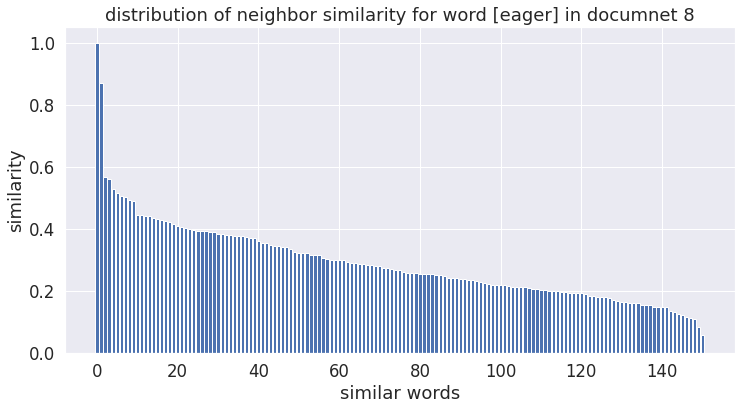

177   -->  ##ness
1690
[1.0000001, 0.87140024, 0.54283, 0.50357413, 0.49809444, 0.4968692, 0.47691318, 0.44718102, 0.42995587, 0.42315447, 0.4194891, 0.41903767, 0.41558293, 0.41538215, 0.41317284, 0.40797532, 0.40474278, 0.40462416, 0.40325505, 0.4005525, 0.39876, 0.39723843, 0.39015883, 0.3889114, 0.3840739, 0.38274342, 0.38250914, 0.3806991, 0.37889504, 0.37843716, 0.37837353, 0.3765453, 0.37340236, 0.37320137, 0.37066627, 0.37043074, 0.36230373, 0.36224246, 0.36207613, 0.3562566, 0.35580474, 0.35257202, 0.35116646, 0.3455181, 0.34511808, 0.33988303, 0.33334616, 0.33161446, 0.3315846, 0.3301053, 0.32989404, 0.3257435, 0.32411027, 0.3225026, 0.31847715, 0.30808073, 0.3077435, 0.3070457, 0.30689877, 0.3028314, 0.30047113, 0.30011505, 0.296309, 0.2922134, 0.2888222, 0.2875039, 0.286772, 0.28527647, 0.28474957, 0.28309068, 0.2811181, 0.27881372, 0.277816, 0.26863363, 0.26852846, 0.2667363, 0.26646668, 0.26550645, 0.26369977, 0.26242173, 0.2622419, 0.26104143, 0.26067623, 0.25798222, 0.2

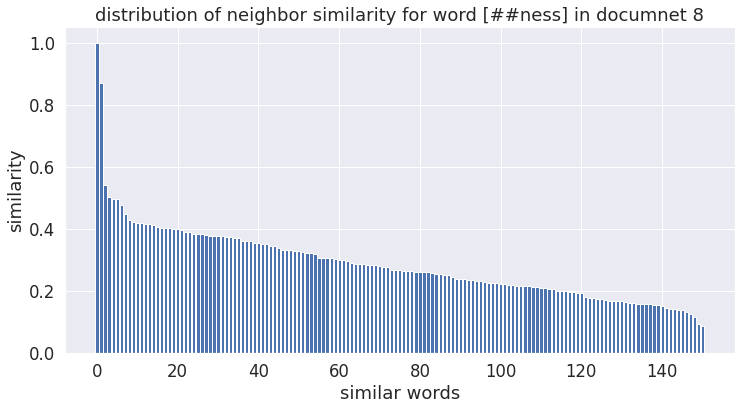

179   -->  erase
1690
[1.0, 0.67890084, 0.63295174, 0.5855226, 0.56369233, 0.51090574, 0.5034648, 0.49950403, 0.48690033, 0.4634844, 0.46066937, 0.45826203, 0.45744193, 0.45296198, 0.44817585, 0.44545293, 0.44484514, 0.43994537, 0.4393949, 0.43727243, 0.43621895, 0.4354009, 0.42732662, 0.42413592, 0.41793117, 0.413889, 0.41266176, 0.41207597, 0.40249166, 0.3982531, 0.3901223, 0.3883615, 0.3881669, 0.38679287, 0.38603145, 0.38329333, 0.38176066, 0.38080186, 0.37625265, 0.3721831, 0.37098536, 0.37066627, 0.36996725, 0.36901173, 0.36653233, 0.36512876, 0.3612659, 0.3600473, 0.35925883, 0.35736614, 0.35709086, 0.35686362, 0.3562497, 0.35572743, 0.3544085, 0.3530711, 0.34474784, 0.34144878, 0.34015578, 0.33997014, 0.33725372, 0.33722183, 0.3367179, 0.33563036, 0.33526397, 0.32540143, 0.32340348, 0.32250902, 0.31873003, 0.31867903, 0.31730753, 0.30945784, 0.30854547, 0.3083603, 0.30796176, 0.30672055, 0.30599403, 0.30021673, 0.29750007, 0.2952962, 0.29148453, 0.29028723, 0.28542358, 0.281378

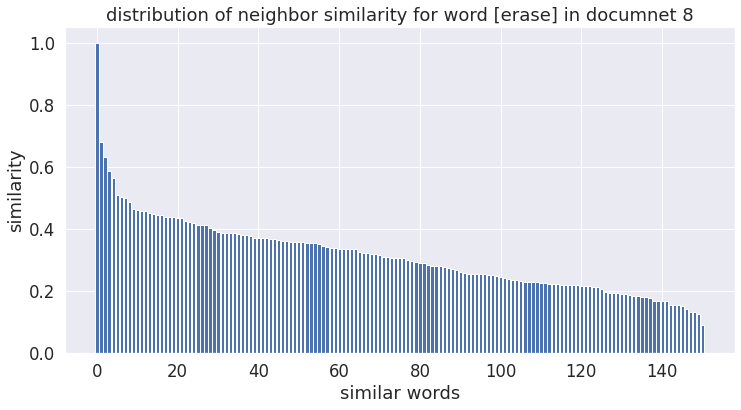

181   -->  vest
1690
[0.99999994, 0.84700155, 0.8346202, 0.8057107, 0.63295174, 0.6128115, 0.5779223, 0.55171955, 0.54965144, 0.5329164, 0.5313157, 0.51999617, 0.51525, 0.49686843, 0.49337235, 0.49135426, 0.48952127, 0.48427182, 0.48031968, 0.4801042, 0.46856546, 0.4646648, 0.46182418, 0.45977062, 0.45968416, 0.45635375, 0.45611942, 0.45610526, 0.45331737, 0.45303082, 0.4505201, 0.44632024, 0.4439903, 0.44170454, 0.4399558, 0.43930376, 0.4390539, 0.43731356, 0.4371418, 0.43689036, 0.43641683, 0.43618643, 0.43607008, 0.43269855, 0.4322127, 0.4317275, 0.4283894, 0.42038417, 0.41884208, 0.4127543, 0.4056098, 0.4030611, 0.3996097, 0.39763403, 0.39745337, 0.39657652, 0.3951555, 0.39414692, 0.39229238, 0.3904361, 0.38472217, 0.38344026, 0.38195416, 0.38115478, 0.37837353, 0.37781906, 0.37606743, 0.37349862, 0.37048268, 0.3664695, 0.3623278, 0.36082244, 0.35331848, 0.34877425, 0.34379143, 0.33844554, 0.3326814, 0.3314526, 0.32629007, 0.32528216, 0.3186343, 0.30778754, 0.29863805, 0.29840475, 

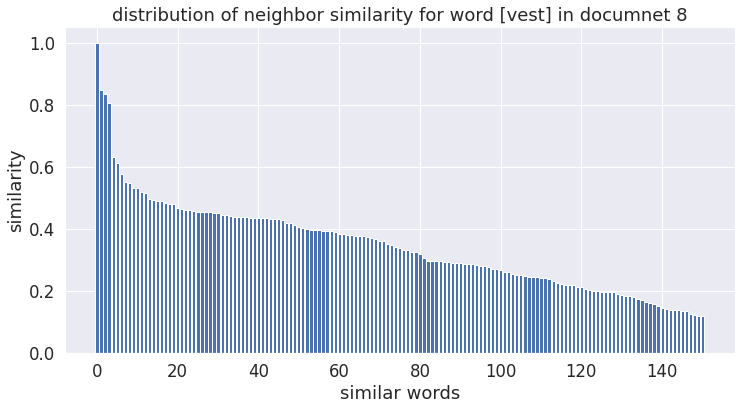

182   -->  ##ige
1690
[0.9999999, 0.92259544, 0.84700155, 0.7336988, 0.5855226, 0.58330375, 0.5780717, 0.5514929, 0.4423973, 0.44068572, 0.43397695, 0.43227875, 0.4320492, 0.43088138, 0.42911494, 0.4289142, 0.42713767, 0.4140752, 0.41168603, 0.4093426, 0.40712988, 0.4063819, 0.4032657, 0.40314454, 0.40276936, 0.393364, 0.39269498, 0.38914442, 0.3846356, 0.3811826, 0.3768183, 0.37605873, 0.3746181, 0.3731916, 0.3693288, 0.36862466, 0.3679588, 0.36502552, 0.3629868, 0.36220622, 0.3619426, 0.3604272, 0.35840842, 0.35257757, 0.35217398, 0.3436411, 0.34109926, 0.33801502, 0.33553252, 0.33503637, 0.3334379, 0.32801464, 0.32708025, 0.3257435, 0.32453668, 0.3224909, 0.32141405, 0.32044786, 0.31890365, 0.3163339, 0.31278217, 0.30852455, 0.3030746, 0.30285084, 0.30169785, 0.2997018, 0.298296, 0.29742113, 0.29724813, 0.2967918, 0.2956308, 0.29534817, 0.29450834, 0.29399338, 0.2909966, 0.28751534, 0.28546312, 0.28415433, 0.27542126, 0.27267987, 0.27231747, 0.27171355, 0.26738733, 0.26434678, 0.263

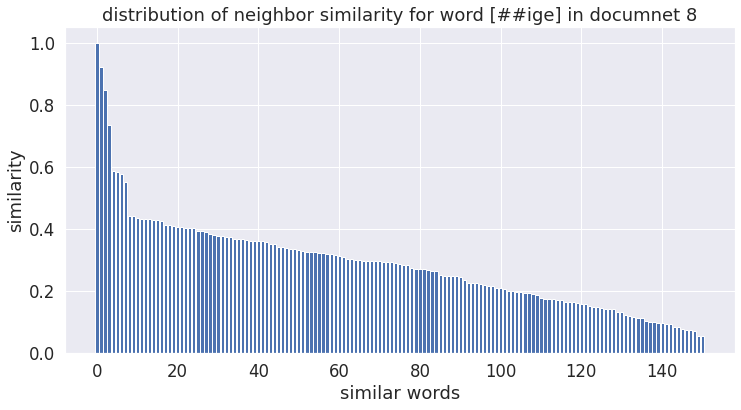

183   -->  ##s
1690
[1.0000001, 0.92259544, 0.8346202, 0.71495014, 0.58282834, 0.56369233, 0.54877675, 0.5407305, 0.48779452, 0.47576842, 0.44643041, 0.43753338, 0.43362436, 0.43104196, 0.42774656, 0.42774528, 0.42482206, 0.42101333, 0.42000282, 0.41493052, 0.40990388, 0.40957856, 0.40207773, 0.40157607, 0.3976414, 0.3915728, 0.38425952, 0.38399518, 0.3835593, 0.38292658, 0.38098747, 0.37986666, 0.37881097, 0.377275, 0.36831862, 0.3672371, 0.36107618, 0.36012942, 0.35847402, 0.35308892, 0.35191464, 0.3509375, 0.34933156, 0.34804115, 0.3467354, 0.34462386, 0.34431195, 0.3431508, 0.34153423, 0.3408925, 0.33334616, 0.326315, 0.32380655, 0.32379025, 0.32250732, 0.32194453, 0.32011744, 0.3187727, 0.3167094, 0.31652772, 0.31651607, 0.31572407, 0.31522036, 0.31216896, 0.3075115, 0.30441332, 0.30353743, 0.30350947, 0.3031072, 0.3030541, 0.30020228, 0.3001156, 0.2957149, 0.2945631, 0.29366857, 0.29229078, 0.28530395, 0.28453755, 0.2842922, 0.28160396, 0.28158438, 0.28018075, 0.27958566, 0.27736

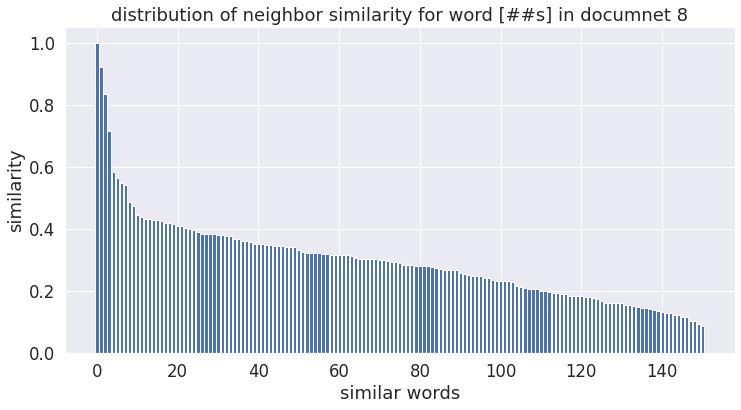

188   -->  mighty
1690
[1.0, 0.83250993, 0.80627006, 0.58330375, 0.5779223, 0.5532463, 0.54877675, 0.5474973, 0.49358624, 0.4935069, 0.486752, 0.48329583, 0.4829157, 0.47907948, 0.47801483, 0.47487083, 0.47378704, 0.47222376, 0.46937326, 0.46895522, 0.46011662, 0.4590069, 0.45493564, 0.4534343, 0.45224303, 0.4521544, 0.4508856, 0.4499979, 0.44559675, 0.44484514, 0.44066796, 0.4401712, 0.43877834, 0.4372055, 0.43450442, 0.43237004, 0.43200958, 0.42783555, 0.42644745, 0.42516452, 0.4250195, 0.42358255, 0.4198165, 0.4173622, 0.41538215, 0.41427484, 0.41323265, 0.4111591, 0.40855497, 0.40648142, 0.40038916, 0.400111, 0.39681304, 0.39272505, 0.39241186, 0.3923984, 0.39205962, 0.3916281, 0.38880867, 0.37800696, 0.37399068, 0.3734514, 0.3723106, 0.37180993, 0.36857972, 0.3654216, 0.36471725, 0.36268744, 0.3533246, 0.3498081, 0.3420286, 0.34173658, 0.33308616, 0.33305514, 0.32976595, 0.32406756, 0.32230332, 0.31587368, 0.3125393, 0.3122906, 0.31030646, 0.3048534, 0.3014934, 0.2994725, 0.298768

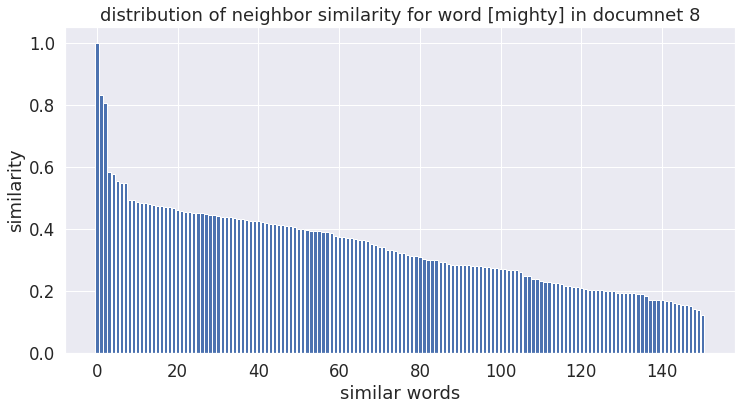

189   -->  communists
1690
[1.0, 0.83250993, 0.7556098, 0.5989119, 0.58282834, 0.5780717, 0.55171955, 0.488113, 0.46927047, 0.46285412, 0.45873207, 0.45853302, 0.45498365, 0.4363972, 0.43173355, 0.4292076, 0.42732662, 0.42440465, 0.42073572, 0.4204229, 0.41479695, 0.412942, 0.4116369, 0.41154337, 0.4027929, 0.40023947, 0.39860582, 0.3982951, 0.3974396, 0.39727598, 0.39684808, 0.39421564, 0.3928192, 0.38912234, 0.3861403, 0.38410956, 0.38258308, 0.38168713, 0.3806991, 0.3789372, 0.3749207, 0.37446022, 0.37235525, 0.37055868, 0.36958382, 0.36745697, 0.36683136, 0.36558485, 0.36184293, 0.36051562, 0.36018556, 0.35966372, 0.35688442, 0.35682204, 0.35302234, 0.3504455, 0.34725487, 0.3468421, 0.3466054, 0.3458913, 0.34397906, 0.34238526, 0.34031147, 0.33779666, 0.33674258, 0.33664748, 0.3269833, 0.32601547, 0.32544047, 0.32429844, 0.31961018, 0.3152863, 0.3132849, 0.31063396, 0.30857238, 0.30380735, 0.30116183, 0.30047962, 0.29823017, 0.296575, 0.29074878, 0.2906239, 0.27687365, 0.27472594, 

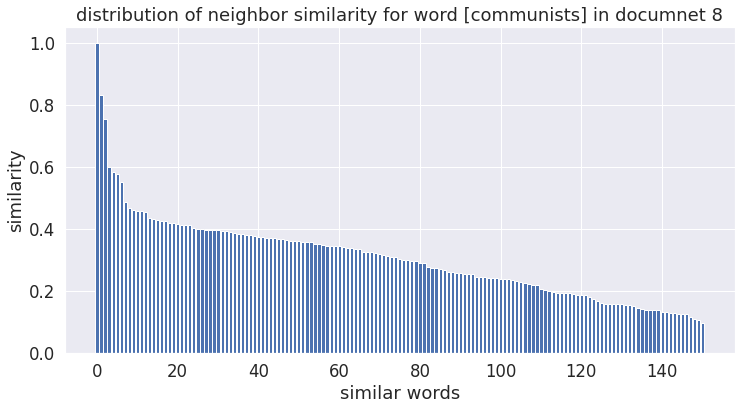

191   -->  risen
1690
[1.0, 0.8016784, 0.5818221, 0.50130355, 0.4926158, 0.4585573, 0.44372407, 0.44278365, 0.44123626, 0.4351731, 0.42867082, 0.42311192, 0.4161509, 0.41088507, 0.4035592, 0.40234047, 0.4017861, 0.40138045, 0.39763403, 0.39723843, 0.39681304, 0.3931617, 0.39027607, 0.3899209, 0.38759458, 0.38420033, 0.38215482, 0.37196344, 0.3716193, 0.36762393, 0.36594117, 0.3649376, 0.36397383, 0.36358503, 0.36220622, 0.35438842, 0.35076353, 0.3497727, 0.3476084, 0.3468421, 0.3408925, 0.34024274, 0.3386641, 0.33805475, 0.31989804, 0.31965762, 0.3157739, 0.31524915, 0.31371716, 0.31167054, 0.3095783, 0.30922183, 0.3079541, 0.3074724, 0.30631447, 0.3049464, 0.30409163, 0.3033706, 0.30256057, 0.30021673, 0.2995708, 0.29845518, 0.29513335, 0.2936943, 0.29227614, 0.29166391, 0.29106426, 0.28962487, 0.28699338, 0.2865486, 0.28630537, 0.28535086, 0.27980503, 0.2797085, 0.2787037, 0.2720709, 0.27201152, 0.27106133, 0.2702159, 0.27005437, 0.26999736, 0.2647485, 0.26451004, 0.2596067, 0.257807

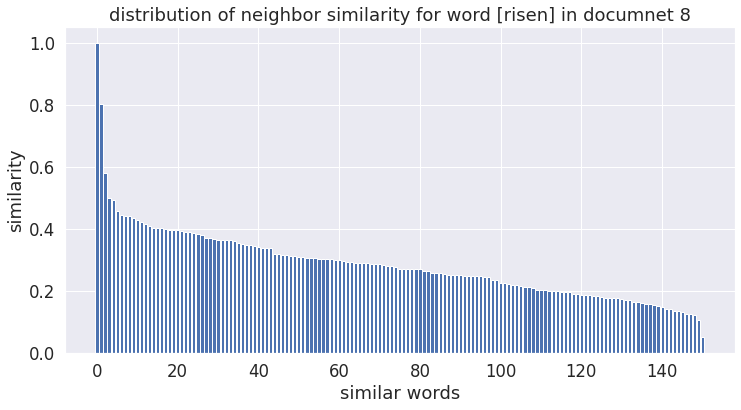

193   -->  among
1690
[1.0, 0.70707345, 0.6921326, 0.6870635, 0.6758204, 0.6483948, 0.6480168, 0.63831556, 0.6156305, 0.61281705, 0.60620666, 0.5912411, 0.558262, 0.54308397, 0.50416446, 0.50130355, 0.49649933, 0.48406774, 0.47171247, 0.46230382, 0.45832056, 0.4578095, 0.4558126, 0.4521339, 0.4497177, 0.44919062, 0.44566557, 0.4447556, 0.43715036, 0.43700624, 0.43079072, 0.4298821, 0.41953307, 0.4190908, 0.41148213, 0.40721127, 0.40104976, 0.3996097, 0.39279288, 0.39272505, 0.38679287, 0.38428783, 0.3838532, 0.3820472, 0.38041157, 0.37927824, 0.37511858, 0.37381846, 0.3733207, 0.37252498, 0.3719855, 0.37171292, 0.3703094, 0.36996603, 0.36117, 0.35688442, 0.35257202, 0.34883413, 0.34811765, 0.3474816, 0.34436953, 0.3408584, 0.3373362, 0.3370843, 0.33258027, 0.33209687, 0.32628626, 0.32627976, 0.32451352, 0.32113713, 0.32044786, 0.3195334, 0.3188539, 0.31710804, 0.306337, 0.30343637, 0.2997488, 0.29891458, 0.29876286, 0.29541934, 0.2946573, 0.2945631, 0.29397553, 0.29339743, 0.28765425, 

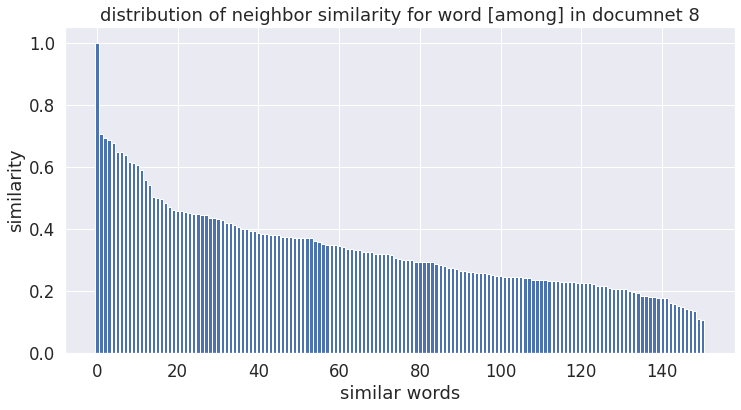

194   -->  students
1690
[1.0000001, 0.8126543, 0.7995894, 0.7929429, 0.7762753, 0.7394383, 0.7145335, 0.70707345, 0.6476207, 0.62914336, 0.62345755, 0.61034626, 0.605045, 0.59386283, 0.57227284, 0.5288457, 0.5161114, 0.5116805, 0.5059595, 0.5026032, 0.496722, 0.48877156, 0.48795295, 0.48583752, 0.4767266, 0.46445957, 0.46386147, 0.45953888, 0.45817298, 0.45707163, 0.45610526, 0.4534343, 0.4534006, 0.44451594, 0.44209942, 0.4409754, 0.44083798, 0.44044974, 0.4308095, 0.42196068, 0.421505, 0.4169538, 0.41429442, 0.41358754, 0.4116369, 0.41040388, 0.40912008, 0.40718576, 0.3985569, 0.39844054, 0.3982531, 0.39811185, 0.39443985, 0.39043617, 0.3880539, 0.38759458, 0.387482, 0.38546723, 0.380693, 0.37843716, 0.37453136, 0.37351534, 0.37305975, 0.36891747, 0.36477107, 0.36466455, 0.36004645, 0.35953796, 0.3590321, 0.35855493, 0.35840842, 0.34987834, 0.34933156, 0.34814107, 0.3479712, 0.34791112, 0.33335495, 0.3300434, 0.32824412, 0.32776952, 0.32602087, 0.3195744, 0.3186846, 0.3162982, 0.315

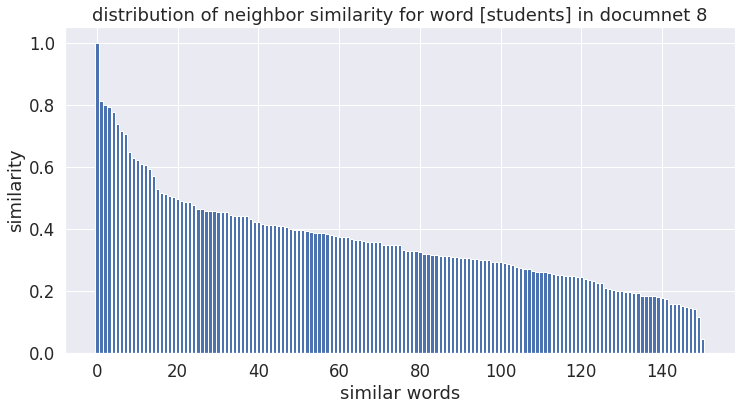

197   -->  streets
1690
[0.99999994, 0.8584838, 0.81701505, 0.7929429, 0.79269195, 0.742836, 0.7231737, 0.6444299, 0.6334135, 0.61640227, 0.6156305, 0.59666634, 0.5823957, 0.5812721, 0.5569558, 0.52844167, 0.5210668, 0.51801056, 0.5159176, 0.5085093, 0.5069619, 0.49757063, 0.4933126, 0.49102208, 0.48976314, 0.48887983, 0.4807375, 0.47289333, 0.46937326, 0.46856546, 0.46673387, 0.45865908, 0.4532536, 0.4529208, 0.4526446, 0.44303524, 0.4412709, 0.43203235, 0.42977497, 0.42592865, 0.42455184, 0.42311192, 0.42279285, 0.42219043, 0.41259256, 0.41172105, 0.40928376, 0.4062906, 0.40272936, 0.40097028, 0.3999955, 0.3977747, 0.39323002, 0.38912234, 0.3889114, 0.38603145, 0.38439405, 0.38408744, 0.38259542, 0.38193315, 0.38164616, 0.38116437, 0.3743481, 0.37198752, 0.37105465, 0.370524, 0.3703767, 0.3693288, 0.369281, 0.36886352, 0.36809212, 0.36548418, 0.36378703, 0.36337948, 0.361541, 0.3604325, 0.3580858, 0.35720456, 0.35621083, 0.3542629, 0.3531626, 0.35308892, 0.35287744, 0.35174927, 0.342

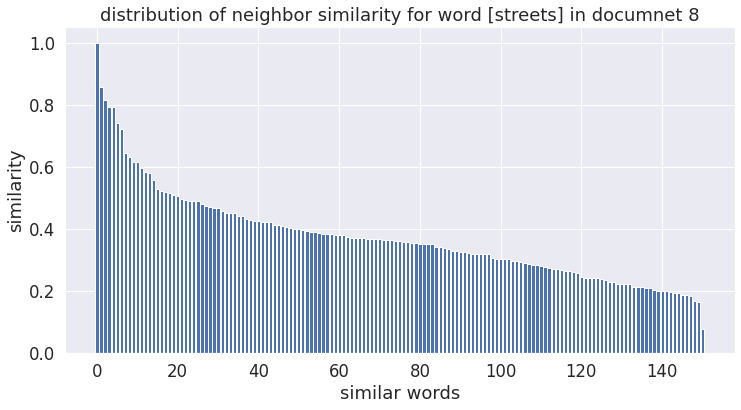

199   -->  long
1690
[1.0000001, 0.81760466, 0.78834116, 0.7693463, 0.768848, 0.7319013, 0.7231737, 0.72024417, 0.7145335, 0.6997622, 0.6715718, 0.636073, 0.6299247, 0.6156312, 0.60760397, 0.5912411, 0.57519126, 0.5630553, 0.54836565, 0.5423322, 0.54085726, 0.5386117, 0.5335535, 0.5269999, 0.52522665, 0.51999617, 0.51499695, 0.51442564, 0.5143759, 0.50831515, 0.5069698, 0.49903053, 0.49482065, 0.49228272, 0.48091072, 0.47952384, 0.47378704, 0.46106803, 0.46102288, 0.45608076, 0.45208687, 0.44954672, 0.44898, 0.44370526, 0.44256327, 0.43669626, 0.4354009, 0.43479508, 0.4318501, 0.426234, 0.42509818, 0.42276412, 0.41903767, 0.41840595, 0.41120628, 0.4095498, 0.40712988, 0.40477487, 0.40207773, 0.40137595, 0.4005075, 0.3982951, 0.39510912, 0.3948664, 0.39197174, 0.39000607, 0.38634598, 0.3852542, 0.3849175, 0.38442138, 0.3838626, 0.38284314, 0.37832206, 0.36762393, 0.36708677, 0.3643698, 0.36350268, 0.36154586, 0.3556265, 0.35429457, 0.35293084, 0.35217977, 0.3501414, 0.34971228, 0.347671

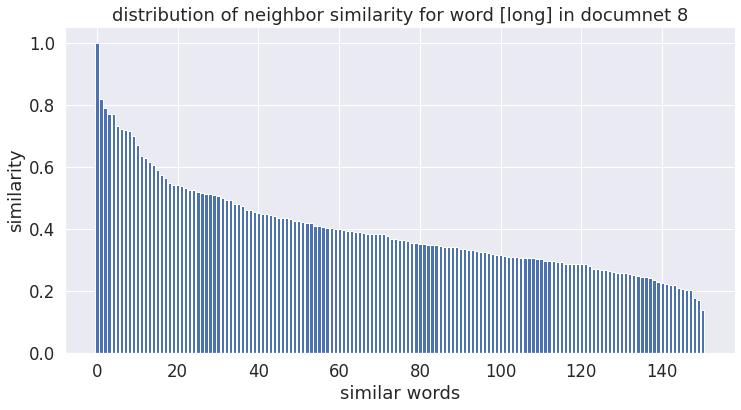

201   -->  suppressed
1690
[1.0000001, 0.8338242, 0.8264698, 0.81760466, 0.79269195, 0.7609855, 0.7394383, 0.71455026, 0.70406955, 0.66895866, 0.6552278, 0.6539081, 0.6483948, 0.647637, 0.5680374, 0.55847687, 0.5532463, 0.5491142, 0.538579, 0.5374336, 0.5365331, 0.53390664, 0.53153515, 0.5285225, 0.5156502, 0.51525, 0.51121545, 0.5021562, 0.49735492, 0.49527484, 0.49261612, 0.48844764, 0.4878639, 0.48742467, 0.48674312, 0.4810927, 0.47504017, 0.45853302, 0.45651048, 0.45608112, 0.44032001, 0.4393949, 0.4387421, 0.43845335, 0.43147838, 0.43111664, 0.42914772, 0.42913502, 0.429025, 0.4289142, 0.42867082, 0.42404693, 0.42041627, 0.41198096, 0.4074008, 0.40474278, 0.3982761, 0.3976414, 0.39375448, 0.39262116, 0.3903476, 0.3901066, 0.38507187, 0.3802199, 0.37848043, 0.3738027, 0.3737454, 0.37034202, 0.36782125, 0.366072, 0.36420953, 0.3618415, 0.35854298, 0.3577718, 0.3521831, 0.34847766, 0.34771103, 0.34501535, 0.34462953, 0.34011304, 0.33868793, 0.3353849, 0.3313878, 0.32606566, 0.3245467

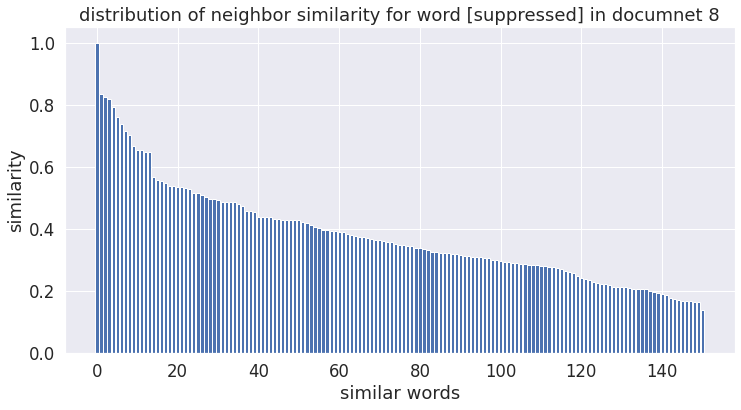

202   -->  artists
1690
[0.99999976, 0.9283439, 0.8584838, 0.8264698, 0.7995894, 0.7693463, 0.716581, 0.6854001, 0.6804814, 0.6559547, 0.65050083, 0.639395, 0.62614846, 0.60620666, 0.5723323, 0.561746, 0.5573229, 0.5516224, 0.5479747, 0.5397967, 0.53498566, 0.53159624, 0.52808857, 0.52757037, 0.51886356, 0.5167784, 0.5077141, 0.50384474, 0.48928443, 0.486752, 0.48031968, 0.47610646, 0.4718591, 0.46626186, 0.4653622, 0.46115804, 0.45832282, 0.45668393, 0.45432925, 0.45168823, 0.44971472, 0.4473723, 0.4442259, 0.44241732, 0.44198912, 0.4356135, 0.4348206, 0.43418676, 0.43088046, 0.4272498, 0.42605516, 0.4231155, 0.41892335, 0.41711128, 0.4161509, 0.4130103, 0.41237953, 0.41175175, 0.41154337, 0.40797532, 0.40699065, 0.40642872, 0.4054885, 0.40541315, 0.40175748, 0.4009069, 0.40063068, 0.3980889, 0.3977515, 0.39356098, 0.39211988, 0.39041153, 0.38915423, 0.38579398, 0.383691, 0.38329333, 0.38143075, 0.3783614, 0.37633902, 0.3760606, 0.36862466, 0.36619508, 0.36169213, 0.3587281, 0.3581016

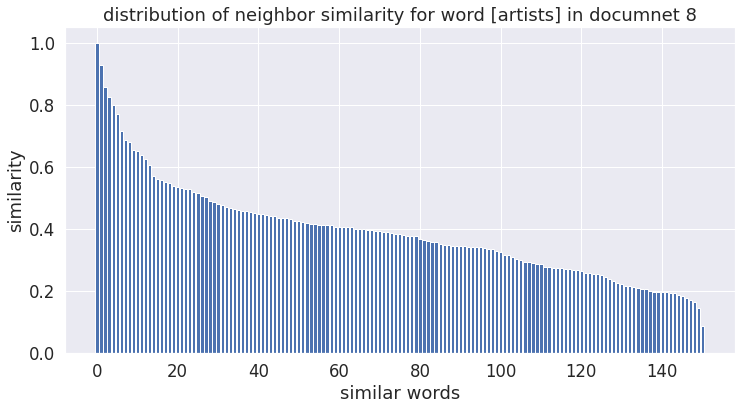

204   -->  intellectuals
1690
[0.9999999, 0.9283439, 0.8338242, 0.81701505, 0.8126543, 0.768848, 0.72000283, 0.7095368, 0.7002599, 0.69672394, 0.69050014, 0.6597177, 0.648618, 0.6480168, 0.6106081, 0.56007123, 0.55589193, 0.5470865, 0.5401852, 0.53696364, 0.5284389, 0.5282159, 0.5163313, 0.51222175, 0.5119885, 0.5055801, 0.4846238, 0.48453516, 0.48329583, 0.47714424, 0.47655588, 0.46976417, 0.45968416, 0.4534731, 0.45030865, 0.4443372, 0.4430682, 0.44242314, 0.44034043, 0.43827656, 0.43476307, 0.43250307, 0.43143222, 0.43046933, 0.42886865, 0.42512882, 0.4242164, 0.42417127, 0.4204229, 0.41828132, 0.416253, 0.41558293, 0.41272178, 0.40234047, 0.40182817, 0.40153784, 0.40091294, 0.3998252, 0.39600027, 0.3958227, 0.3956874, 0.39452457, 0.3901223, 0.38770646, 0.38743293, 0.38706344, 0.38587743, 0.3822382, 0.3802625, 0.37953132, 0.37764812, 0.37043256, 0.36965242, 0.36659488, 0.36357763, 0.3634447, 0.36333102, 0.3629868, 0.35940892, 0.35641575, 0.35634285, 0.35606182, 0.35527784, 0.3519494

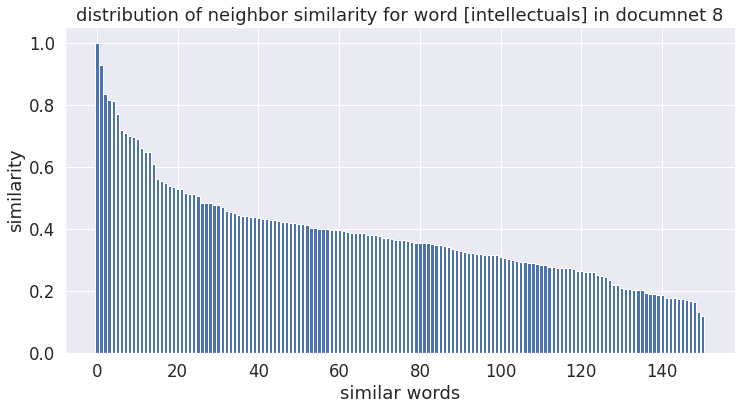

207   -->  even
1690
[0.99999976, 0.78397435, 0.7601252, 0.7002599, 0.6758204, 0.6754648, 0.6731658, 0.6559547, 0.6552278, 0.6476207, 0.6299247, 0.6255232, 0.59666634, 0.5914174, 0.5681661, 0.53491265, 0.5317378, 0.52349126, 0.5232763, 0.5115496, 0.50961953, 0.50483716, 0.50425345, 0.5034115, 0.49316484, 0.48704803, 0.47534767, 0.47412795, 0.46382797, 0.46350262, 0.46257955, 0.45955014, 0.45681268, 0.44999462, 0.4351731, 0.42707258, 0.4255635, 0.42418936, 0.41898867, 0.41650766, 0.41605544, 0.413889, 0.41151276, 0.40966475, 0.4056098, 0.40459785, 0.40430796, 0.4039185, 0.4005525, 0.3977276, 0.3972263, 0.39614925, 0.39597833, 0.39192677, 0.3884061, 0.38534796, 0.38058287, 0.37399068, 0.36745697, 0.36445987, 0.36227232, 0.36136943, 0.35789332, 0.3520958, 0.35091475, 0.35051236, 0.3436411, 0.34343332, 0.3433449, 0.3431508, 0.34294605, 0.33875835, 0.3331746, 0.33190215, 0.32902458, 0.31614387, 0.312854, 0.31231064, 0.31145737, 0.3101644, 0.3083266, 0.30810812, 0.30800718, 0.3060252, 0.3059

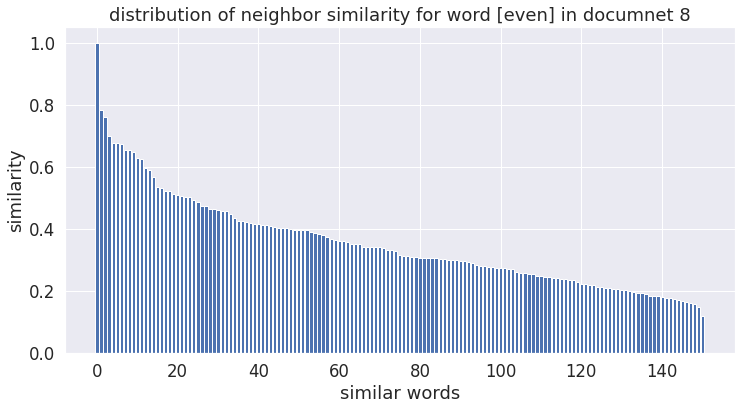

208   -->  within
1690
[1.0, 0.78397435, 0.69887793, 0.692735, 0.6921326, 0.69050014, 0.6623435, 0.6539081, 0.639395, 0.63206637, 0.62914336, 0.62017584, 0.6156312, 0.5940218, 0.5812721, 0.5706941, 0.54311, 0.5279255, 0.48623258, 0.4765491, 0.46656364, 0.46038342, 0.459587, 0.45647153, 0.4555385, 0.45424998, 0.45296198, 0.45282406, 0.44838965, 0.44175738, 0.43215275, 0.43172225, 0.42995813, 0.42985147, 0.42880505, 0.42789674, 0.4263444, 0.42156273, 0.41860852, 0.41669685, 0.41632286, 0.41150302, 0.4030611, 0.40300697, 0.39963818, 0.39497185, 0.39397836, 0.39343965, 0.39027607, 0.3900836, 0.38477707, 0.3819766, 0.38170353, 0.37800696, 0.3765453, 0.37640384, 0.3741591, 0.37157017, 0.3639918, 0.35709354, 0.35238957, 0.35204405, 0.3510863, 0.34238526, 0.33740854, 0.33423826, 0.33173138, 0.32453668, 0.32385024, 0.32255998, 0.32075357, 0.317325, 0.31290945, 0.31188703, 0.31175745, 0.30951595, 0.30914336, 0.3082887, 0.30792817, 0.30749464, 0.30696216, 0.3001156, 0.2972411, 0.2970962, 0.295143

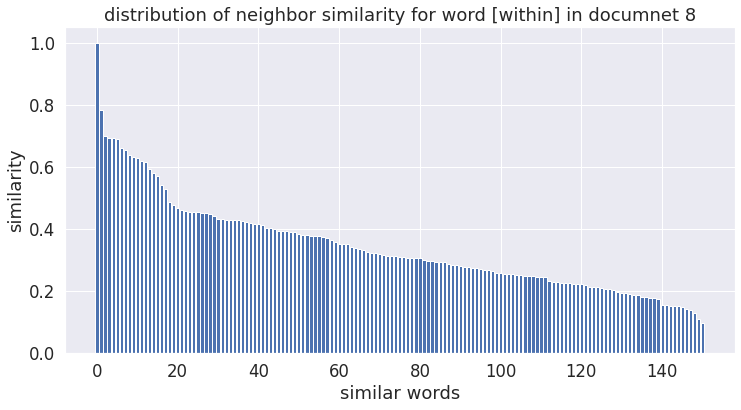

210   -->  party
1690
[1.0, 0.6569218, 0.61241126, 0.6042479, 0.5989119, 0.59789836, 0.5924142, 0.57519126, 0.56796485, 0.5619695, 0.5491142, 0.5474973, 0.54311, 0.53498566, 0.53457457, 0.5284389, 0.5219515, 0.5161114, 0.5020252, 0.49505118, 0.4933126, 0.49098346, 0.4900679, 0.48704803, 0.4863736, 0.48588347, 0.48427182, 0.4785104, 0.47691318, 0.47490132, 0.4716629, 0.46684846, 0.4616691, 0.4607013, 0.45940837, 0.45744193, 0.45160902, 0.45110756, 0.4497177, 0.44751632, 0.4422046, 0.4369648, 0.43612933, 0.43418193, 0.43298322, 0.43027648, 0.42839086, 0.42642725, 0.4257633, 0.42023546, 0.41988033, 0.41950452, 0.41832873, 0.41557825, 0.41092765, 0.4051217, 0.3970209, 0.39389452, 0.39388195, 0.39357853, 0.39335698, 0.38964918, 0.38663656, 0.38521397, 0.38292658, 0.3811826, 0.3802168, 0.37842518, 0.37646565, 0.37643224, 0.37590423, 0.36764574, 0.3650253, 0.36270854, 0.3619587, 0.35818455, 0.35702842, 0.3568284, 0.3565245, 0.352643, 0.35069394, 0.34872347, 0.34782624, 0.34278092, 0.340553, 0

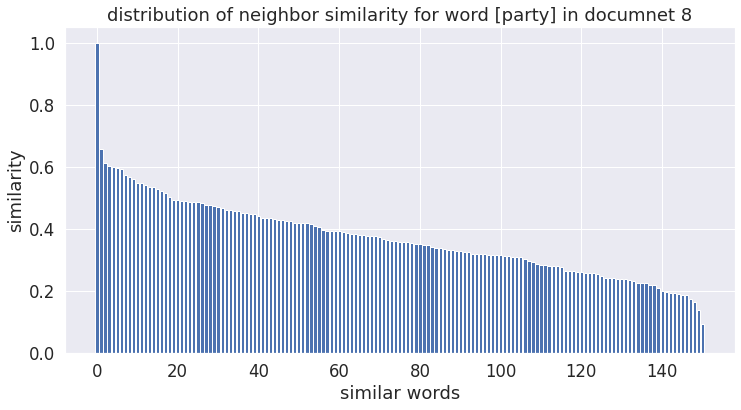

213   -->  dec
1690
[0.9999999, 0.8663357, 0.81877136, 0.8034942, 0.7286105, 0.72024417, 0.6623435, 0.648618, 0.647637, 0.626611, 0.62614846, 0.6255232, 0.59789836, 0.5823957, 0.57227284, 0.56360984, 0.5528572, 0.54965144, 0.5247329, 0.5243939, 0.5109001, 0.50374526, 0.4986129, 0.49595457, 0.494445, 0.49342307, 0.48690033, 0.4857016, 0.4850597, 0.4850409, 0.48406774, 0.48114008, 0.48018262, 0.4785746, 0.4762509, 0.46708435, 0.46487236, 0.45972732, 0.45738998, 0.45188403, 0.44988894, 0.44087818, 0.43545818, 0.433181, 0.42877534, 0.42355317, 0.42336968, 0.4227273, 0.42070776, 0.41323265, 0.40732586, 0.40642044, 0.40556085, 0.40157607, 0.40074307, 0.39703327, 0.39303192, 0.39269498, 0.39133105, 0.3903336, 0.38651314, 0.38298193, 0.38234043, 0.3815087, 0.38049006, 0.37961614, 0.37922624, 0.3788285, 0.37488586, 0.37411818, 0.36826193, 0.368097, 0.36745232, 0.36744493, 0.36231917, 0.36224246, 0.36148652, 0.36129916, 0.35966372, 0.3571778, 0.35455996, 0.34855705, 0.34782672, 0.34675512, 0.344

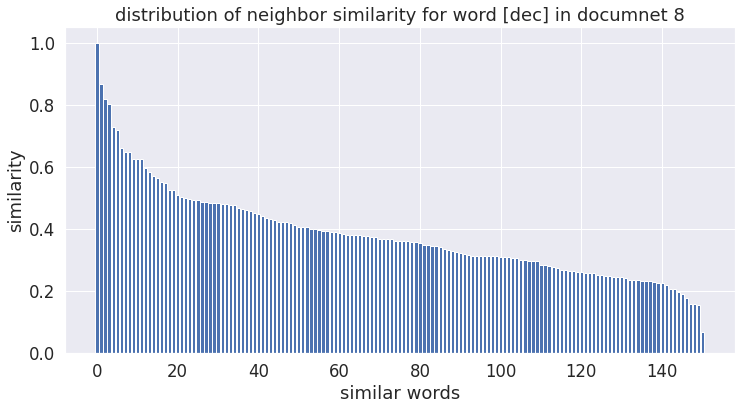

214   -->  ##imated
1690
[1.0, 0.8663357, 0.8547708, 0.75876564, 0.71455026, 0.6997622, 0.69672394, 0.692735, 0.6854001, 0.6821201, 0.6731658, 0.61640227, 0.605045, 0.6042479, 0.58726144, 0.5533327, 0.5528041, 0.54990727, 0.5477606, 0.54308397, 0.5337659, 0.5323215, 0.5313157, 0.5138969, 0.5120784, 0.51041496, 0.50815344, 0.5041436, 0.5034648, 0.5009058, 0.50024164, 0.4880775, 0.48618442, 0.48581794, 0.48201436, 0.47487083, 0.47203094, 0.46788085, 0.46701032, 0.46664324, 0.46196365, 0.45926222, 0.45503777, 0.4541748, 0.45276356, 0.44833043, 0.44298226, 0.44068572, 0.432585, 0.4323033, 0.4275412, 0.42667896, 0.42101333, 0.42064685, 0.41833848, 0.40893838, 0.40776598, 0.40766317, 0.40655297, 0.40636352, 0.40408364, 0.40334573, 0.4027929, 0.39852494, 0.3941118, 0.391833, 0.38926375, 0.38731372, 0.38250914, 0.3823341, 0.3821663, 0.38215482, 0.3818327, 0.37546152, 0.37485874, 0.3702899, 0.36837536, 0.3683621, 0.36206234, 0.35738382, 0.35693675, 0.35605985, 0.3528704, 0.34968844, 0.34741652,

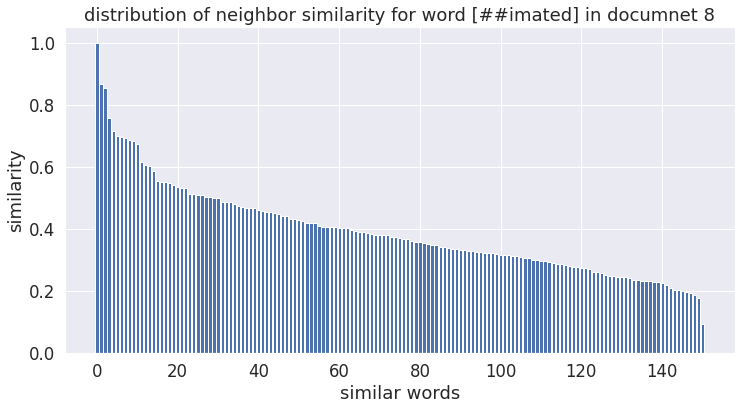

215   -->  ranks
1690
[1.0, 0.8547708, 0.8034942, 0.7438513, 0.7095368, 0.69887793, 0.69430566, 0.6804814, 0.6754648, 0.6715718, 0.66895866, 0.6569218, 0.6334135, 0.61034626, 0.558262, 0.5522218, 0.5514447, 0.54774976, 0.5329164, 0.52865994, 0.51708364, 0.51325834, 0.51205075, 0.5092238, 0.5081451, 0.502612, 0.4935069, 0.4900682, 0.48867938, 0.4884643, 0.48629537, 0.48356378, 0.4802507, 0.47805366, 0.47454304, 0.46824118, 0.46782288, 0.4653663, 0.4591397, 0.45873207, 0.45826203, 0.45715734, 0.4549061, 0.4529453, 0.45263907, 0.4495898, 0.445158, 0.4437757, 0.4423973, 0.44085163, 0.4397286, 0.43903857, 0.43663612, 0.43362436, 0.4304949, 0.42279974, 0.4212278, 0.42048547, 0.42017597, 0.41541463, 0.4066668, 0.40432203, 0.40325505, 0.40138045, 0.39981964, 0.39961803, 0.3961253, 0.39382386, 0.38629782, 0.3859535, 0.3837074, 0.38368112, 0.3823579, 0.38183123, 0.3810495, 0.3785627, 0.37841547, 0.3780597, 0.377451, 0.37684366, 0.37135264, 0.37006366, 0.36931837, 0.36824846, 0.36679745, 0.363403

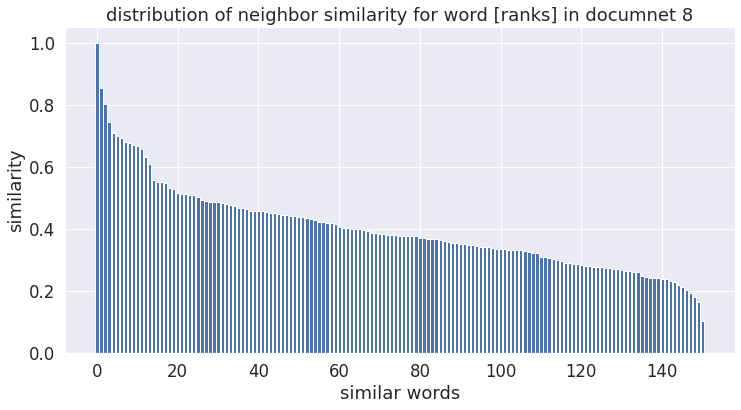

218   -->  cry
1690
[1.0000002, 0.71388054, 0.6287973, 0.5873443, 0.5093287, 0.49168158, 0.4910109, 0.488945, 0.48698583, 0.42995587, 0.41832873, 0.41793153, 0.38058287, 0.36358503, 0.35844827, 0.35709354, 0.35646415, 0.35572743, 0.35302234, 0.3423923, 0.3365652, 0.33308616, 0.3306005, 0.33039615, 0.32778734, 0.32630694, 0.32113713, 0.3194523, 0.3144239, 0.3137499, 0.31282872, 0.31253833, 0.31120813, 0.31104258, 0.3109043, 0.30953425, 0.3066937, 0.30665725, 0.306471, 0.30538493, 0.3020138, 0.30007887, 0.29837552, 0.2980042, 0.2974709, 0.29667276, 0.29526964, 0.29452205, 0.29296598, 0.2922486, 0.29158592, 0.29149866, 0.2896162, 0.2895098, 0.28788236, 0.28779846, 0.28676844, 0.28400394, 0.2834576, 0.28183562, 0.27695113, 0.27475688, 0.2747252, 0.27342337, 0.27339786, 0.2714129, 0.26986003, 0.26911438, 0.26887804, 0.26852304, 0.26780975, 0.26738733, 0.2660032, 0.26548266, 0.2650295, 0.26496038, 0.26355794, 0.26190808, 0.2618759, 0.26156497, 0.25993645, 0.25983977, 0.2574389, 0.25697866, 0

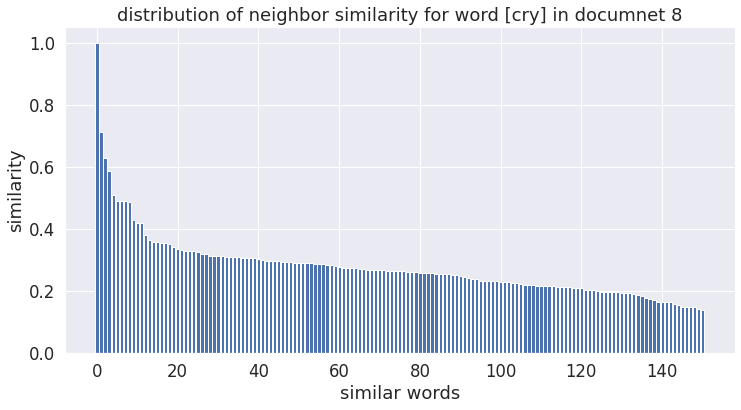

219   -->  reflects
1690
[1.0, 0.71388054, 0.6587894, 0.6047348, 0.50198305, 0.49767953, 0.44519138, 0.43646944, 0.41768655, 0.40744245, 0.39614925, 0.3917286, 0.38170353, 0.37790248, 0.37755075, 0.37043074, 0.36594117, 0.35903972, 0.35686362, 0.35477057, 0.35192162, 0.34875613, 0.34811765, 0.34782624, 0.34051064, 0.33722255, 0.33522174, 0.3349455, 0.3323755, 0.3320857, 0.3317278, 0.33099532, 0.33043888, 0.33012158, 0.32987756, 0.32853583, 0.3226049, 0.31907025, 0.3171535, 0.31049, 0.308302, 0.30725265, 0.30681193, 0.30323455, 0.30115834, 0.29350373, 0.29297435, 0.29160637, 0.2914045, 0.29114306, 0.29051226, 0.28910154, 0.28866896, 0.2875806, 0.28617945, 0.2818459, 0.27930576, 0.2778325, 0.274383, 0.274029, 0.273891, 0.27347124, 0.272366, 0.2711013, 0.2705037, 0.26887906, 0.26812974, 0.26580915, 0.26523584, 0.26196742, 0.26139325, 0.2611328, 0.26101252, 0.26079896, 0.25927332, 0.25760448, 0.25595102, 0.25439537, 0.25043526, 0.25029024, 0.24984479, 0.24941793, 0.24933293, 0.2481211, 0.2

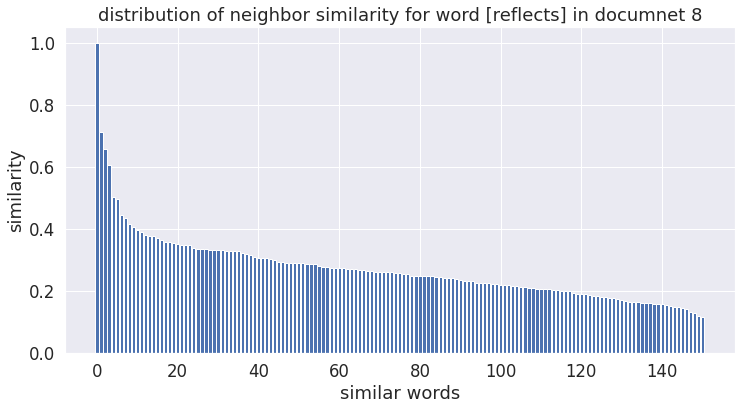

221   -->  swirl
1690
[1.0000002, 0.71729636, 0.6847894, 0.6587894, 0.6287973, 0.5862682, 0.54908913, 0.53491265, 0.5164125, 0.497297, 0.49403846, 0.4926158, 0.49157745, 0.47996277, 0.47454304, 0.4677578, 0.46219185, 0.45647153, 0.4523699, 0.44919062, 0.44718102, 0.44456625, 0.4425251, 0.4422046, 0.4323033, 0.43046933, 0.4227671, 0.42196068, 0.42192727, 0.41198096, 0.41164243, 0.4078296, 0.40642872, 0.40181962, 0.39901415, 0.39836252, 0.3980256, 0.39703327, 0.39510912, 0.38115478, 0.37751555, 0.3762502, 0.37591866, 0.37312964, 0.3705089, 0.3654216, 0.36463416, 0.36082143, 0.35925883, 0.35621083, 0.3519696, 0.3504455, 0.34834507, 0.3447467, 0.34091225, 0.3404044, 0.33884597, 0.3335384, 0.3330258, 0.3324773, 0.33241868, 0.33161944, 0.33082056, 0.32708025, 0.32686365, 0.32504514, 0.3239212, 0.32380655, 0.32270214, 0.31832474, 0.31615797, 0.31609207, 0.3153761, 0.31240144, 0.31220174, 0.3112654, 0.3102507, 0.30712554, 0.30708107, 0.30563918, 0.3043731, 0.30428338, 0.30383125, 0.30166316, 0

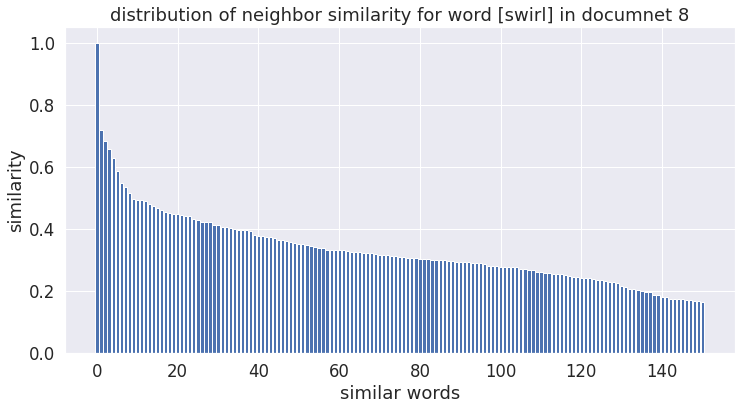

223   -->  revolutionary
1690
[1.0000001, 0.71729636, 0.6795665, 0.6085105, 0.6064567, 0.6047348, 0.5873443, 0.56796485, 0.53011864, 0.52851945, 0.51554954, 0.50961953, 0.49809444, 0.496722, 0.4966967, 0.4884643, 0.48480758, 0.48453516, 0.4810927, 0.4765491, 0.46839112, 0.46670228, 0.46664324, 0.46492487, 0.4618032, 0.45832282, 0.45644447, 0.45608076, 0.45493564, 0.45269388, 0.45179605, 0.44988894, 0.4478954, 0.446936, 0.4447556, 0.44123626, 0.43811405, 0.4378094, 0.4322127, 0.42494476, 0.41793117, 0.41325265, 0.412942, 0.41062525, 0.40973142, 0.40928376, 0.40600097, 0.4040939, 0.40270546, 0.4007956, 0.3996609, 0.39654866, 0.3948826, 0.39108852, 0.38535243, 0.3784731, 0.37445644, 0.3711248, 0.36974752, 0.36901975, 0.36783665, 0.36718386, 0.36609018, 0.3657915, 0.36502552, 0.36471516, 0.36437237, 0.3640576, 0.36374128, 0.36307815, 0.36129954, 0.36055726, 0.36012942, 0.35857436, 0.35783812, 0.35645813, 0.35462755, 0.35447115, 0.35438454, 0.3534362, 0.3489303, 0.3467314, 0.34538305, 0.344

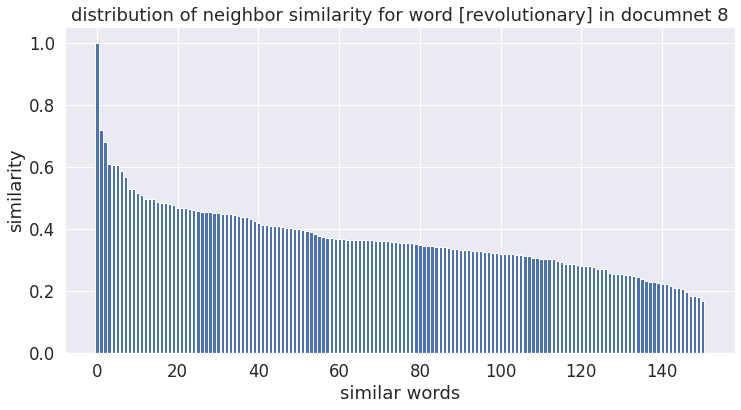

224   -->  fe
1690
[0.9999998, 0.68980145, 0.64267576, 0.6085105, 0.5862682, 0.5169529, 0.50263375, 0.49168158, 0.49098346, 0.48356378, 0.46847606, 0.46122313, 0.45738998, 0.45668393, 0.45021713, 0.44511825, 0.43845335, 0.43717235, 0.43695384, 0.43687347, 0.43646944, 0.43479508, 0.43476307, 0.4330852, 0.43203235, 0.43125373, 0.4283894, 0.4272482, 0.42315447, 0.4208281, 0.42064685, 0.41998124, 0.4157663, 0.40941566, 0.40675786, 0.40430796, 0.400111, 0.40003544, 0.39497185, 0.3928634, 0.39117217, 0.39043617, 0.39007333, 0.38918623, 0.38823965, 0.38041157, 0.3766909, 0.37631392, 0.3754146, 0.37522006, 0.3730689, 0.3716193, 0.3684304, 0.3647655, 0.3644118, 0.360183, 0.3581074, 0.35529006, 0.3473794, 0.34600142, 0.34593883, 0.34563977, 0.34555143, 0.3442171, 0.34031147, 0.33719483, 0.33526397, 0.3334379, 0.33204046, 0.33063197, 0.33054692, 0.33050305, 0.32711184, 0.32606316, 0.3253923, 0.32374674, 0.3230734, 0.32283396, 0.32144713, 0.32121173, 0.31750423, 0.31685668, 0.31572407, 0.3154731, 

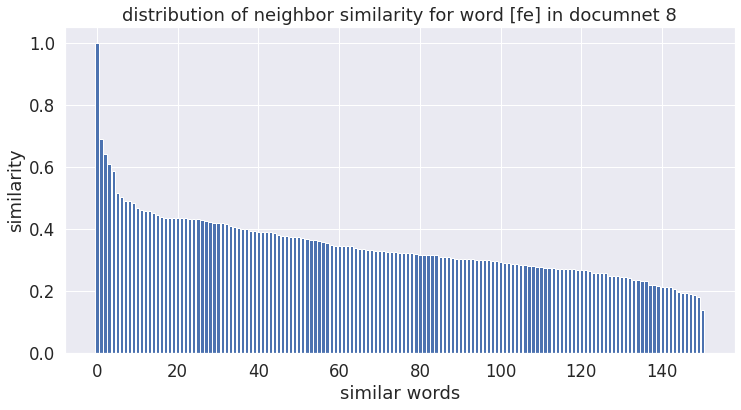

225   -->  ##r
1690
[1.0, 0.6459826, 0.64267576, 0.6064567, 0.56660694, 0.54908913, 0.53457457, 0.53159624, 0.5230843, 0.512895, 0.50357413, 0.49686843, 0.49102208, 0.48698583, 0.48674312, 0.486047, 0.4857016, 0.48286027, 0.47896773, 0.47805366, 0.47716773, 0.47655588, 0.46702945, 0.4669794, 0.46505925, 0.46106803, 0.4585573, 0.4562333, 0.45503777, 0.4534006, 0.45282406, 0.4513718, 0.4508856, 0.4453545, 0.44519138, 0.44336915, 0.44215852, 0.44123992, 0.43808058, 0.4342833, 0.43096575, 0.42596906, 0.4253928, 0.4227094, 0.42155862, 0.41834623, 0.417319, 0.41148213, 0.41094658, 0.40966475, 0.39320514, 0.38944328, 0.3881669, 0.38566238, 0.37966827, 0.37931654, 0.37765, 0.37135458, 0.36995232, 0.36957037, 0.36877558, 0.3681662, 0.362543, 0.35292763, 0.34965655, 0.3466054, 0.34633932, 0.34581244, 0.34407717, 0.3424903, 0.33246702, 0.32828766, 0.32801464, 0.3276866, 0.326315, 0.32434303, 0.32223037, 0.32108706, 0.3193983, 0.3186095, 0.31702542, 0.31384304, 0.3087168, 0.30825222, 0.30674458, 0

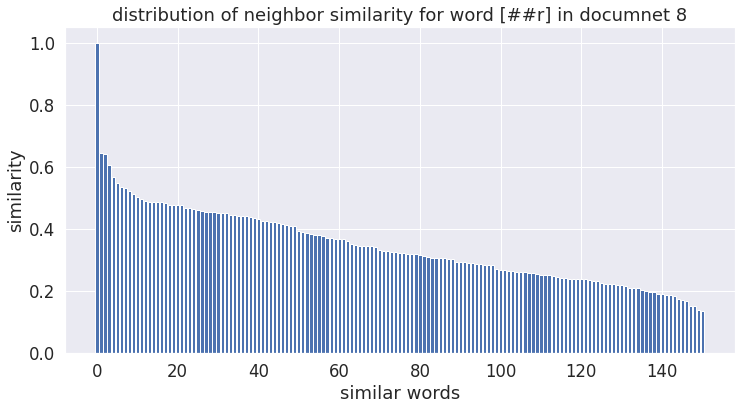

226   -->  ##vor
1690
[1.0, 0.68980145, 0.6847894, 0.6795665, 0.6459826, 0.58449686, 0.55988026, 0.55255175, 0.54283, 0.53410816, 0.5340737, 0.52638704, 0.52349126, 0.5207286, 0.51325834, 0.5119885, 0.50384474, 0.50198305, 0.5006651, 0.49649933, 0.49261612, 0.488945, 0.48795295, 0.48623258, 0.48201436, 0.47544402, 0.4716629, 0.4673482, 0.46638942, 0.45865908, 0.4565776, 0.45608628, 0.45445913, 0.4526793, 0.45208687, 0.4519076, 0.4499979, 0.4458894, 0.44372407, 0.44350207, 0.44191545, 0.43618643, 0.43545777, 0.433181, 0.42960474, 0.42480618, 0.4236278, 0.41839305, 0.4154524, 0.4142437, 0.4084157, 0.40700328, 0.4068755, 0.40093976, 0.3988183, 0.39806587, 0.38900593, 0.38838857, 0.38794684, 0.38776758, 0.38707814, 0.38399518, 0.38102257, 0.38098925, 0.38080186, 0.37751245, 0.37605873, 0.371659, 0.37055868, 0.37021488, 0.36789346, 0.36559474, 0.35946417, 0.35744184, 0.3525914, 0.34910682, 0.34573036, 0.34420273, 0.34333587, 0.3400037, 0.3373149, 0.3335908, 0.33330888, 0.33003914, 0.3284272

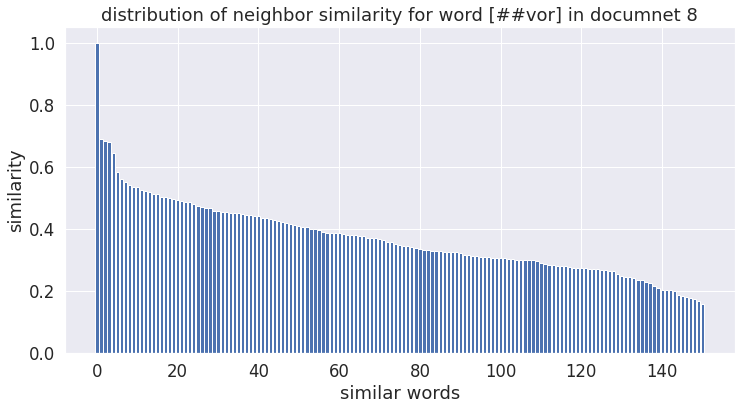

229   -->  land
1690
[1.0, 0.9202289, 0.7847002, 0.6734159, 0.6625248, 0.661006, 0.6161965, 0.6132463, 0.60908735, 0.58449686, 0.5723323, 0.5677375, 0.56697035, 0.56257397, 0.55589193, 0.5491553, 0.54836565, 0.54794174, 0.5443941, 0.538579, 0.5337659, 0.52851945, 0.5188719, 0.5159176, 0.51205075, 0.5116805, 0.50579166, 0.50425345, 0.50186396, 0.50104797, 0.49410266, 0.49157745, 0.48588347, 0.48322016, 0.48155007, 0.48114008, 0.47896773, 0.4741909, 0.47333682, 0.4688519, 0.46871006, 0.46847606, 0.46555567, 0.4608691, 0.4604996, 0.459587, 0.45832056, 0.4581375, 0.45602143, 0.45037538, 0.45030397, 0.44559675, 0.44488353, 0.44271287, 0.4390539, 0.43771282, 0.43637705, 0.43388045, 0.43330413, 0.42876977, 0.42715377, 0.42503017, 0.4231039, 0.42267475, 0.42105597, 0.4194891, 0.41804433, 0.41553158, 0.41539118, 0.40894914, 0.40527618, 0.4017861, 0.3976267, 0.39509934, 0.38912886, 0.38912302, 0.3854435, 0.3835676, 0.38258308, 0.3768183, 0.3762556, 0.3734693, 0.37243968, 0.37214112, 0.3706619, 0

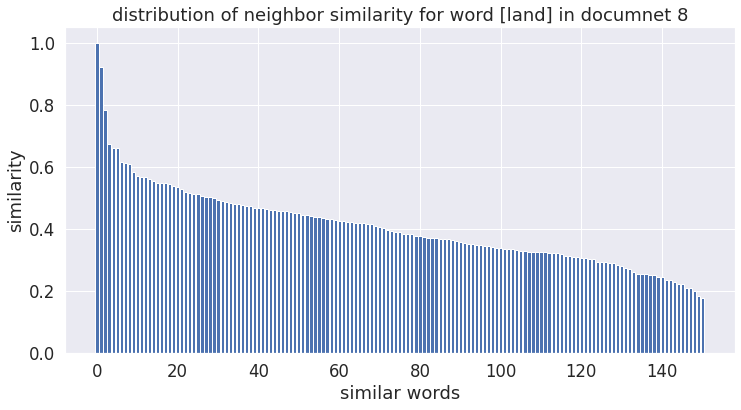

231   -->  used
1690
[1.0000001, 0.79440534, 0.76054883, 0.74641275, 0.73957145, 0.71241415, 0.61623275, 0.6161965, 0.5930154, 0.56193197, 0.54442036, 0.5414176, 0.5167784, 0.502514, 0.5013797, 0.50024164, 0.49903053, 0.49757063, 0.49735492, 0.49002054, 0.4887485, 0.4857515, 0.4850409, 0.48479784, 0.4846238, 0.4816611, 0.47557023, 0.47544402, 0.4718479, 0.46678063, 0.4667259, 0.4653663, 0.46505925, 0.45953888, 0.45681268, 0.45264557, 0.44809666, 0.44646156, 0.44624338, 0.441257, 0.44017828, 0.43881282, 0.43731356, 0.43717235, 0.43589115, 0.43498695, 0.43052202, 0.4298821, 0.42839086, 0.42576188, 0.42555234, 0.42524034, 0.41719627, 0.41669685, 0.41449818, 0.40270546, 0.40051955, 0.39800194, 0.3971591, 0.39676285, 0.3959455, 0.39557138, 0.3934137, 0.39241186, 0.38652554, 0.38646615, 0.3849989, 0.3840739, 0.3839733, 0.3834277, 0.3809713, 0.3765732, 0.37591866, 0.36512876, 0.36330205, 0.35832286, 0.35566318, 0.35395306, 0.3509375, 0.3497727, 0.3461926, 0.34109926, 0.3383565, 0.33657494, 0.

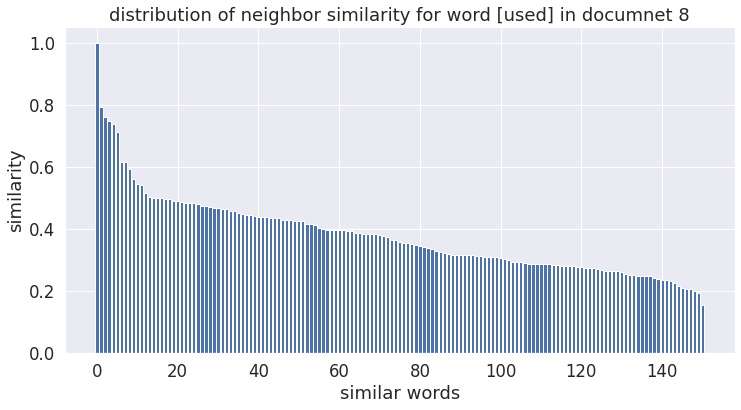

234   -->  new
1690
[1.0, 0.8549851, 0.7977827, 0.7857501, 0.74641275, 0.6935455, 0.6885861, 0.60908735, 0.59416795, 0.5824636, 0.5806792, 0.57063675, 0.56780314, 0.5533327, 0.5528572, 0.5527638, 0.54085726, 0.5397967, 0.5354729, 0.5309429, 0.5285225, 0.52829075, 0.5282159, 0.52302945, 0.52203584, 0.5210668, 0.5207286, 0.5115496, 0.5105101, 0.5092238, 0.5066664, 0.5059595, 0.501002, 0.49906093, 0.49135426, 0.488666, 0.48480758, 0.48253083, 0.4807038, 0.4761485, 0.47490132, 0.4731202, 0.47277802, 0.47069377, 0.46869382, 0.46730024, 0.46702945, 0.46635497, 0.46410578, 0.46066937, 0.46004382, 0.4558126, 0.45424998, 0.45420697, 0.4508705, 0.45001912, 0.44990477, 0.44594258, 0.44555765, 0.44456625, 0.44382018, 0.4425528, 0.44099855, 0.43687347, 0.43621904, 0.4315516, 0.42662558, 0.42644745, 0.42162666, 0.41332668, 0.40957856, 0.40648597, 0.40408784, 0.40314454, 0.4026124, 0.40250733, 0.39915076, 0.38082814, 0.37950844, 0.37928444, 0.37320137, 0.3728552, 0.37235525, 0.36880428, 0.36513007, 0

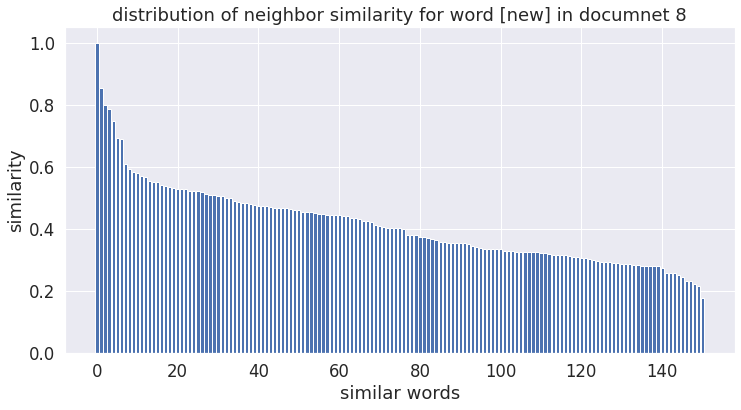

235   -->  freedoms
1690
[1.0, 0.8549851, 0.7671565, 0.7481081, 0.71241415, 0.67107064, 0.6485606, 0.6259323, 0.6132463, 0.5986395, 0.59067297, 0.5782886, 0.561746, 0.56007123, 0.55990696, 0.5591552, 0.5577787, 0.5569558, 0.5564827, 0.5563362, 0.5495923, 0.5365331, 0.5340737, 0.5288457, 0.5232763, 0.51855296, 0.51708364, 0.5143759, 0.5120784, 0.5109001, 0.49106848, 0.48952127, 0.48612484, 0.47925168, 0.47398585, 0.4733755, 0.47206372, 0.47171247, 0.46670228, 0.4659302, 0.46584114, 0.4608956, 0.4523699, 0.44545293, 0.44476962, 0.4442119, 0.44249773, 0.44175738, 0.4407532, 0.43923706, 0.43753338, 0.43742615, 0.4372055, 0.43706208, 0.435048, 0.43396854, 0.43228823, 0.4314561, 0.43125373, 0.43096575, 0.42940593, 0.42713767, 0.42472547, 0.42307788, 0.4209379, 0.42010617, 0.41950452, 0.41886654, 0.4147516, 0.4126824, 0.41161853, 0.40529, 0.4044602, 0.4035592, 0.4026501, 0.4016331, 0.3975752, 0.39727598, 0.38878232, 0.38752097, 0.38448042, 0.38274342, 0.37613297, 0.37283915, 0.37074566, 0.363

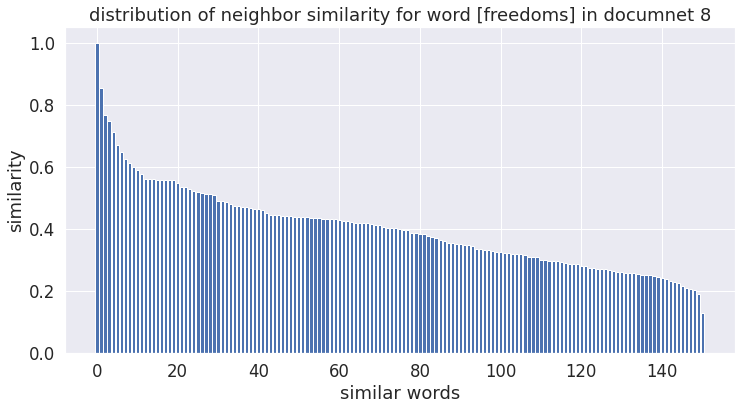

237   -->  24
1690
[1.0, 0.8407613, 0.79839826, 0.78355896, 0.7631421, 0.6423853, 0.63416165, 0.6000691, 0.59416795, 0.5929756, 0.5809921, 0.57238996, 0.5651901, 0.56257397, 0.5495923, 0.5465144, 0.5414176, 0.53648853, 0.52214456, 0.5144841, 0.51442564, 0.5134991, 0.50815344, 0.5015111, 0.4971543, 0.49289668, 0.4924699, 0.48385412, 0.4785746, 0.47787273, 0.4732042, 0.47252327, 0.46922106, 0.4680749, 0.46800852, 0.46673387, 0.46352196, 0.46331316, 0.46115804, 0.46073815, 0.46042812, 0.45817298, 0.45651048, 0.45303082, 0.4529453, 0.45160902, 0.4485449, 0.44191545, 0.43931895, 0.43883634, 0.43877834, 0.4327541, 0.4298275, 0.42886865, 0.42789674, 0.42536217, 0.42413592, 0.4212275, 0.4159294, 0.4156577, 0.41563034, 0.41346216, 0.40698975, 0.40373588, 0.40050918, 0.3982432, 0.39597833, 0.38944328, 0.38788766, 0.38564324, 0.38535243, 0.3846356, 0.3835593, 0.38264105, 0.3806779, 0.3789372, 0.3763096, 0.37549335, 0.37183994, 0.36996603, 0.36659896, 0.36191446, 0.35930607, 0.355765, 0.35529006, 

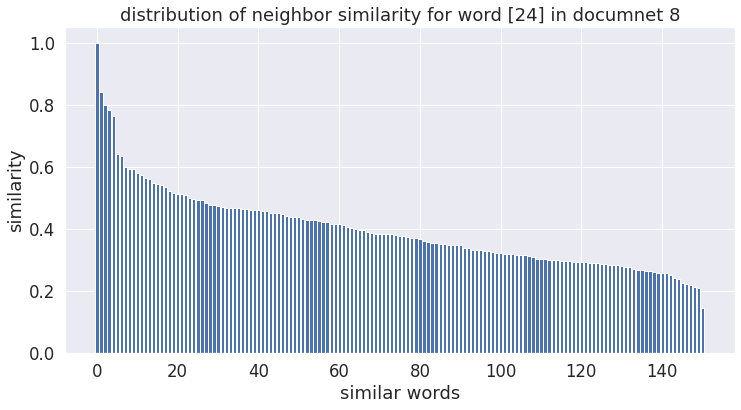

238   -->  years
1690
[0.9999997, 0.86675775, 0.8407613, 0.80893266, 0.7325014, 0.6094964, 0.59450996, 0.59400547, 0.58315086, 0.5786201, 0.56780314, 0.5591552, 0.5523681, 0.55001557, 0.5465807, 0.54442036, 0.5443941, 0.5427021, 0.5415602, 0.53316617, 0.5319263, 0.5269999, 0.5249258, 0.52077854, 0.5147875, 0.51041496, 0.5008609, 0.50014865, 0.49342307, 0.49337235, 0.4900682, 0.4867558, 0.4866541, 0.4834466, 0.48328555, 0.48269296, 0.4807375, 0.47638705, 0.47504017, 0.4718591, 0.4702794, 0.46303773, 0.45769924, 0.4565302, 0.4534731, 0.44751632, 0.44554242, 0.4441204, 0.44209942, 0.43953753, 0.43861926, 0.4355521, 0.43237004, 0.4314711, 0.43111217, 0.4309281, 0.43064684, 0.42985147, 0.42774528, 0.4227575, 0.42095962, 0.4142437, 0.4140752, 0.41407067, 0.39581683, 0.39433342, 0.393891, 0.3928192, 0.39066136, 0.3884061, 0.380478, 0.37966827, 0.37625265, 0.37497908, 0.37239414, 0.3705911, 0.3703094, 0.36573714, 0.36471516, 0.36260533, 0.35246587, 0.35187113, 0.35073107, 0.34642628, 0.3460102

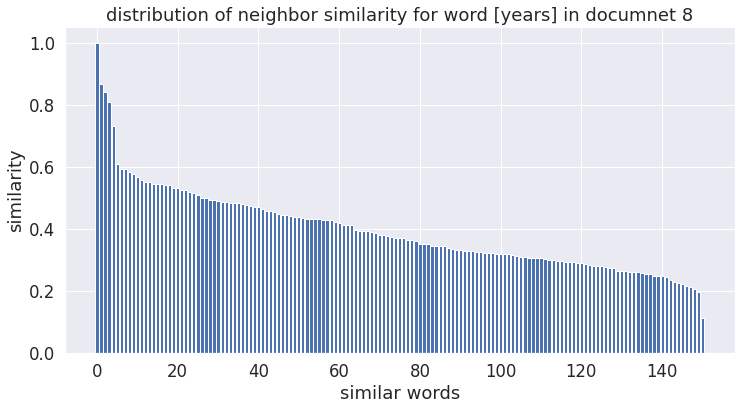

240   -->  dictatorship
1690
[1.0, 0.80893266, 0.80395293, 0.78355896, 0.63106555, 0.60890937, 0.60541236, 0.5960071, 0.5912796, 0.5806792, 0.5704611, 0.5564827, 0.55416155, 0.5384017, 0.5359438, 0.52012384, 0.5188719, 0.5096242, 0.5083983, 0.5013797, 0.5011552, 0.49318504, 0.491994, 0.48844764, 0.48618442, 0.48272765, 0.47952384, 0.4785104, 0.47801483, 0.47126493, 0.4687954, 0.46782288, 0.4677261, 0.46650162, 0.4653522, 0.46487236, 0.46191216, 0.4565776, 0.45644447, 0.4547463, 0.44557083, 0.4412709, 0.44044974, 0.43827656, 0.43689036, 0.4341126, 0.43173355, 0.43088046, 0.42999065, 0.42623234, 0.42509943, 0.42431512, 0.42116785, 0.41885668, 0.41860852, 0.41487765, 0.4115814, 0.41151276, 0.41085654, 0.4049111, 0.40276936, 0.40059033, 0.39776608, 0.39435613, 0.39382768, 0.388665, 0.3878769, 0.3855459, 0.38425952, 0.38247472, 0.3801797, 0.379623, 0.37668517, 0.3762502, 0.37285364, 0.3721831, 0.37208015, 0.37171292, 0.3681662, 0.368164, 0.3646618, 0.36121, 0.360183, 0.3548231, 0.3502438, 0

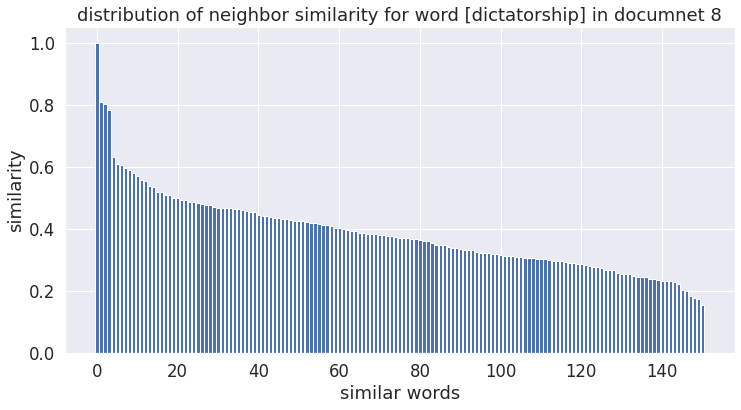

243   -->  country
1690
[1.0000001, 0.9202289, 0.72458565, 0.7163914, 0.6263244, 0.61768204, 0.6147165, 0.56193197, 0.55877465, 0.5563362, 0.5527638, 0.55255175, 0.5195286, 0.51554954, 0.5055801, 0.4976018, 0.49228272, 0.48928443, 0.48742467, 0.47996277, 0.4732042, 0.47203094, 0.4702794, 0.4677261, 0.46350262, 0.4602366, 0.45707163, 0.453729, 0.45128626, 0.44741625, 0.44584376, 0.44511825, 0.4437757, 0.43756464, 0.43612933, 0.4342833, 0.43380862, 0.4318028, 0.43079072, 0.42892092, 0.42457306, 0.42455184, 0.4227273, 0.42156273, 0.41993606, 0.41543394, 0.41303965, 0.41276324, 0.41167614, 0.41011572, 0.4080764, 0.4061075, 0.40312147, 0.40231183, 0.4011995, 0.40038916, 0.39876, 0.39529616, 0.39105272, 0.38699523, 0.38382307, 0.38056648, 0.37854064, 0.37648016, 0.37606743, 0.37556475, 0.37318355, 0.3729223, 0.36805105, 0.36670732, 0.36492902, 0.36397383, 0.36380553, 0.36018556, 0.35558295, 0.3506922, 0.34815413, 0.3470971, 0.34534043, 0.34507856, 0.34243295, 0.34213647, 0.34051064, 0.340227

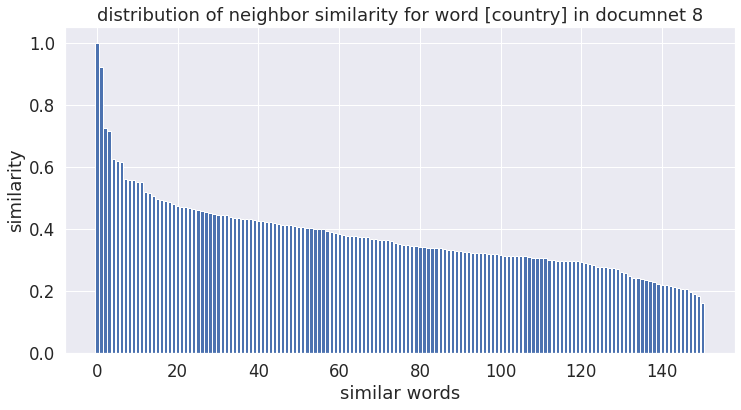

244   -->  wary
1690
[0.9999999, 0.6550976, 0.61768204, 0.59594786, 0.5930154, 0.5859787, 0.57063675, 0.56697035, 0.56581175, 0.55990696, 0.5352069, 0.52843916, 0.52374005, 0.493597, 0.47373044, 0.47209018, 0.4571732, 0.45445913, 0.4539001, 0.44154823, 0.43953258, 0.43931895, 0.4175257, 0.41487765, 0.41164243, 0.41062525, 0.40964973, 0.40555212, 0.4039185, 0.40104976, 0.40094882, 0.39066136, 0.3900281, 0.38926375, 0.3837074, 0.37712848, 0.37639892, 0.3741591, 0.3737454, 0.3643698, 0.36333102, 0.36194348, 0.35904974, 0.3590321, 0.35314167, 0.35174364, 0.3507312, 0.34959123, 0.34869027, 0.34773254, 0.34675512, 0.34583312, 0.34530458, 0.34209788, 0.3419345, 0.34138405, 0.3386325, 0.33715713, 0.33676833, 0.33601636, 0.33465827, 0.3306778, 0.32989404, 0.32950985, 0.32853583, 0.32630515, 0.32577926, 0.325348, 0.32485843, 0.3236402, 0.32340348, 0.3213793, 0.31849808, 0.3147662, 0.3137589, 0.31375843, 0.31323525, 0.3101038, 0.31005323, 0.3099432, 0.3090124, 0.30710518, 0.30674458, 0.30491015, 

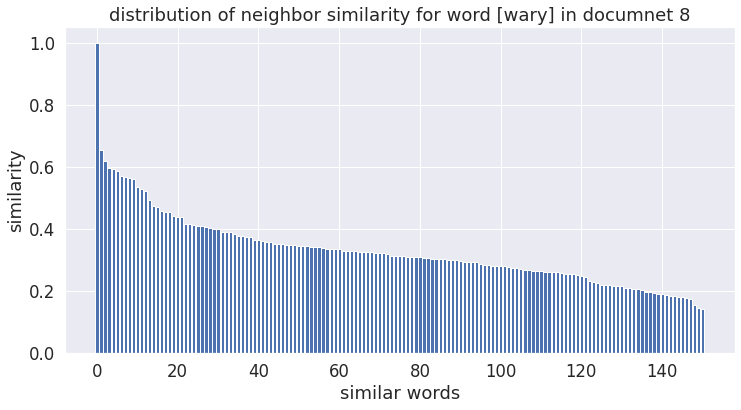

247   -->  old
1690
[1.0, 0.83805954, 0.8193141, 0.80050766, 0.7783347, 0.5986395, 0.5824636, 0.57634676, 0.5729586, 0.5677057, 0.55416155, 0.55001557, 0.5465144, 0.53615904, 0.502514, 0.493597, 0.49062145, 0.4880355, 0.48155007, 0.4792717, 0.47410524, 0.46926326, 0.45977062, 0.44900447, 0.44643041, 0.44175005, 0.43821886, 0.43756464, 0.4363972, 0.4320492, 0.42914772, 0.426234, 0.4250195, 0.42418936, 0.42326215, 0.4154524, 0.40912008, 0.40863544, 0.40636352, 0.39910808, 0.3977747, 0.3977515, 0.38889837, 0.38851285, 0.38743293, 0.3826625, 0.38183123, 0.37922624, 0.3784731, 0.3741091, 0.37157017, 0.37139753, 0.37021568, 0.3675804, 0.36653233, 0.3614019, 0.35886312, 0.35818455, 0.35569763, 0.35307598, 0.3514071, 0.3474816, 0.34699968, 0.34618893, 0.3372708, 0.33381587, 0.33268082, 0.33241868, 0.33178926, 0.32909828, 0.32676655, 0.3223066, 0.32108706, 0.32000238, 0.31813174, 0.31555873, 0.3112144, 0.30762672, 0.30748144, 0.3070457, 0.30380878, 0.30364496, 0.30289346, 0.30195647, 0.30011934

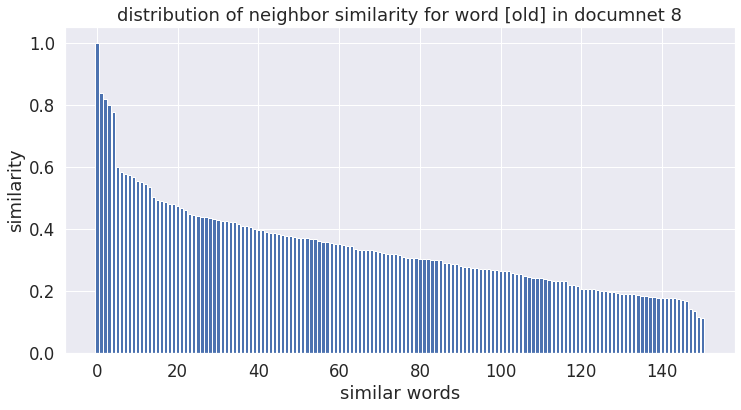

248   -->  guard
1690
[0.99999976, 0.83805954, 0.8121544, 0.801433, 0.78487253, 0.6259323, 0.5368391, 0.52843916, 0.52203584, 0.5153393, 0.4813807, 0.4751506, 0.4687954, 0.46352196, 0.45769924, 0.45036834, 0.44809666, 0.43637705, 0.4254212, 0.42482206, 0.42073572, 0.41898867, 0.41167614, 0.41003066, 0.4032657, 0.39657652, 0.39378235, 0.3903476, 0.38900593, 0.3880539, 0.3867002, 0.38138446, 0.38131395, 0.3771377, 0.37180993, 0.36974752, 0.36965242, 0.36622393, 0.36619508, 0.3624026, 0.36232495, 0.3604325, 0.3551562, 0.3549776, 0.35204405, 0.3504964, 0.350157, 0.34436953, 0.34320754, 0.33940476, 0.33722183, 0.33583277, 0.3348624, 0.3335384, 0.33136356, 0.33065906, 0.32515633, 0.32165632, 0.32095027, 0.31579003, 0.31424028, 0.31260425, 0.31075034, 0.30666488, 0.30524477, 0.30184197, 0.30128148, 0.29558283, 0.29501224, 0.29191476, 0.2910031, 0.28967655, 0.28962022, 0.28872642, 0.2853057, 0.28352618, 0.28225118, 0.2819474, 0.27584147, 0.27525437, 0.2741663, 0.27236152, 0.27151746, 0.2710613

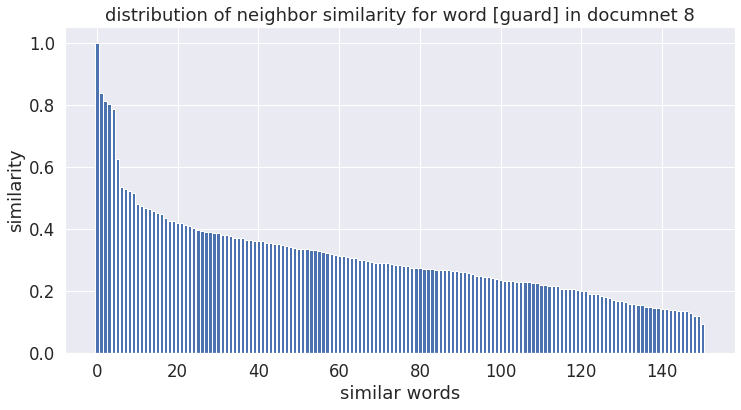

250   -->  flourished
1690
[1.0, 0.8208265, 0.78487253, 0.7783347, 0.6885241, 0.64895976, 0.5782886, 0.55830157, 0.5415602, 0.53648853, 0.5268874, 0.52302945, 0.5211797, 0.52012384, 0.49410266, 0.487387, 0.48479784, 0.48284495, 0.47907948, 0.4746538, 0.4646648, 0.4571732, 0.45608628, 0.45498365, 0.45128626, 0.44999462, 0.4492939, 0.44679672, 0.4387421, 0.43873566, 0.4356135, 0.43104196, 0.43088138, 0.4305532, 0.42977497, 0.42786196, 0.4275412, 0.42417127, 0.421505, 0.42048547, 0.41150302, 0.40973142, 0.40502, 0.3931508, 0.39279288, 0.3872158, 0.3852542, 0.38420033, 0.38212794, 0.37206596, 0.37091714, 0.37073314, 0.36995232, 0.36826193, 0.36538497, 0.36463416, 0.36339575, 0.3600473, 0.35880128, 0.35753435, 0.3568284, 0.3527887, 0.35022217, 0.3471947, 0.3349936, 0.33370674, 0.33268687, 0.33180183, 0.33025622, 0.3301053, 0.3296033, 0.32628962, 0.32541728, 0.32374674, 0.3229219, 0.31919122, 0.31911695, 0.31402773, 0.3134769, 0.3103377, 0.3084829, 0.30514574, 0.30495703, 0.3049486, 0.303337

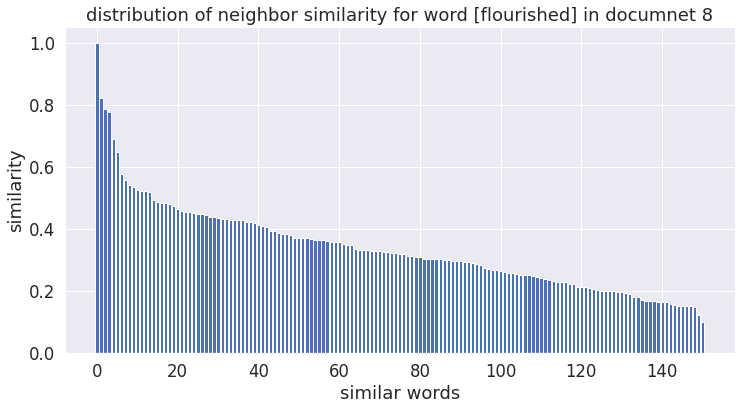

252   -->  mr
1690
[1.0000001, 0.81601346, 0.7570481, 0.75220007, 0.67436403, 0.63416165, 0.59450996, 0.5912796, 0.56722784, 0.5066664, 0.5018526, 0.487387, 0.48612484, 0.48322016, 0.48021227, 0.4792717, 0.47557023, 0.46641564, 0.46626186, 0.44741625, 0.44597253, 0.4426282, 0.43950686, 0.4318501, 0.43147838, 0.42663488, 0.4240239, 0.42358255, 0.42219043, 0.42003748, 0.41988033, 0.4189422, 0.41834623, 0.41828132, 0.41778204, 0.4089216, 0.40718576, 0.40655297, 0.40642044, 0.401254, 0.39702547, 0.3961253, 0.39378235, 0.38969636, 0.3885203, 0.3829863, 0.37751245, 0.37725836, 0.37695035, 0.37522006, 0.37482083, 0.37445644, 0.3739068, 0.37216306, 0.37182254, 0.37048268, 0.37031096, 0.3660965, 0.3614222, 0.36128905, 0.35989073, 0.3582468, 0.35767186, 0.35758364, 0.35743666, 0.3553077, 0.35238957, 0.35177565, 0.35174364, 0.34924418, 0.34835786, 0.3454262, 0.3443125, 0.34277868, 0.34091225, 0.33923987, 0.3373362, 0.33664748, 0.33611953, 0.33571097, 0.3339559, 0.33190215, 0.33132833, 0.3297918, 

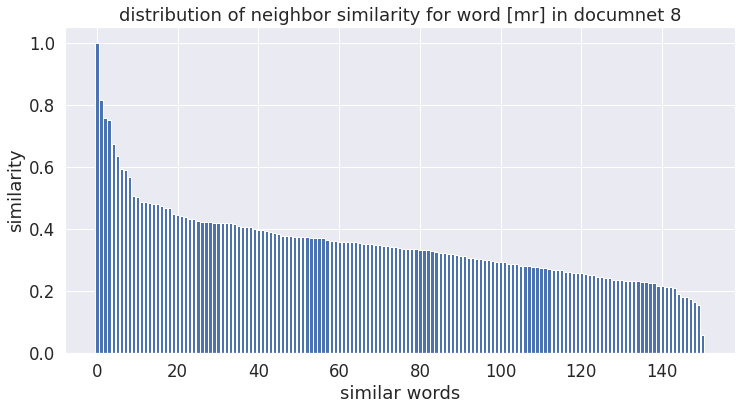

254   -->  ce
1690
[0.9999998, 0.839151, 0.7570481, 0.7334659, 0.62552214, 0.6000691, 0.5960071, 0.5786201, 0.571939, 0.55349433, 0.5479747, 0.5344912, 0.52829075, 0.52593523, 0.52522665, 0.5247329, 0.5219515, 0.512895, 0.51222175, 0.51121545, 0.5111865, 0.50673205, 0.50263375, 0.50104797, 0.49660534, 0.49461597, 0.48887983, 0.4887485, 0.48581794, 0.4810437, 0.47567034, 0.47325304, 0.47233015, 0.47206372, 0.46824118, 0.46386147, 0.46191794, 0.4618032, 0.46011662, 0.45979658, 0.45859396, 0.45383608, 0.453729, 0.45321745, 0.4527986, 0.4526793, 0.44900447, 0.4466235, 0.44170454, 0.43873566, 0.43851328, 0.43676317, 0.42880505, 0.42341053, 0.42113146, 0.4170855, 0.41690564, 0.4168465, 0.4078296, 0.4068934, 0.3980835, 0.3977276, 0.3972686, 0.39309356, 0.3929032, 0.39183962, 0.39078104, 0.38718343, 0.38272813, 0.3820472, 0.37776786, 0.37709367, 0.37446022, 0.37314978, 0.37162396, 0.3678916, 0.36422715, 0.3612659, 0.3607857, 0.36056566, 0.3585149, 0.35646415, 0.3560083, 0.3559144, 0.35580474, 

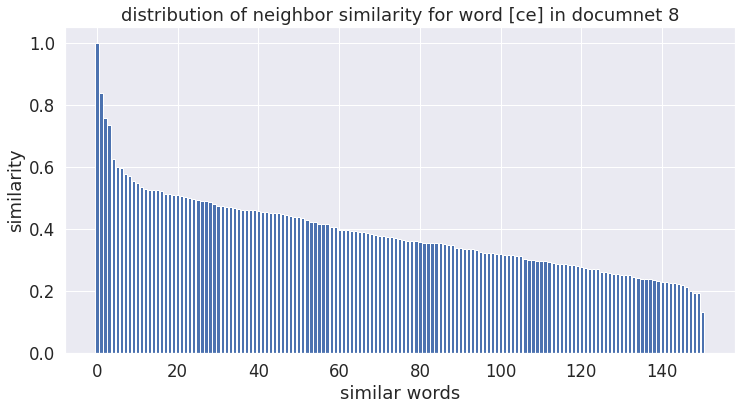

255   -->  ##aus
1690
[0.9999999, 0.839151, 0.6836492, 0.67436403, 0.60890937, 0.59400547, 0.58320475, 0.5809921, 0.5523449, 0.5398655, 0.5230843, 0.5145508, 0.5077141, 0.5034673, 0.5021562, 0.501002, 0.49482065, 0.494445, 0.4900679, 0.4816611, 0.47925168, 0.4792055, 0.47714424, 0.47527093, 0.4730928, 0.47289333, 0.46555567, 0.46145254, 0.45553878, 0.4521544, 0.45213708, 0.4519076, 0.4504511, 0.4495898, 0.4492939, 0.44833043, 0.44711503, 0.44531918, 0.44451594, 0.4433751, 0.4397703, 0.43821886, 0.43811405, 0.4330852, 0.4321682, 0.4318028, 0.4317275, 0.43028045, 0.42353946, 0.41024873, 0.40516317, 0.40363294, 0.400218, 0.39995918, 0.39576703, 0.39343965, 0.39292896, 0.39239594, 0.38724342, 0.3849285, 0.37889147, 0.37729782, 0.37511858, 0.37402415, 0.36683136, 0.36445987, 0.35903537, 0.35725504, 0.35416794, 0.3531626, 0.3519696, 0.35088384, 0.3507312, 0.34808207, 0.3446899, 0.34340346, 0.3410408, 0.33988303, 0.33871722, 0.33816236, 0.33725372, 0.33642602, 0.33319658, 0.33065906, 0.330396

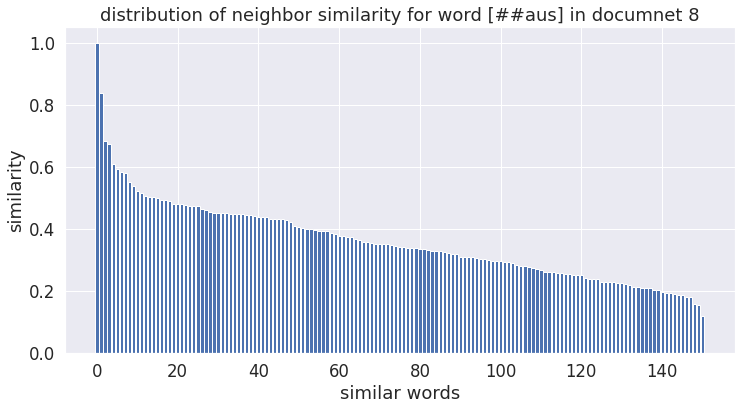

In [130]:
import string 
 
stopwords = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now']


doc = 8

print('tokens in  doc {} are {}'.format(doc, tokenizer.tokenize(sentences[doc])))
total_tokens = tokenizer.tokenize(sentences[doc])[0:min(max_length, len(sentences[doc]))]
print('size of the document before removing stopwords is ', len(total_tokens))
word_neighbor_similarity_dict = dict()
for ind, word in zip(total_tokens, range(1,len(total_tokens))):
  if ind not in stopwords and ind not in string.punctuation:
    plt.figure(word)
    print(word, '  --> ', ind)
    value_list = list()
    temp = sorted(find_similar(last_layer[doc], word,  tokenizer.tokenize(sentences[doc])).items(), key=lambda kv: kv[1], reverse=True)
    for d in temp:
      value_list.append(d[1])
      ## plot data
    print(value_list)
    word_neighbor_similarity_dict[ind] = value_list
    print('variance is {}'.format(np.var(value_list)))
    print('Average is {}'.format(np.average(value_list)))
    plt.bar(range(0, len(value_list)), value_list)
    plt.xlabel('similar words')
    plt.ylabel('similarity')
    plt.title('distribution of neighbor similarity for word [{}] in documnet {}'.format(ind, doc))
    plt.show()
    # plt.savefig('/content/Images/'+ind+'.png')
print()
print()


In [135]:
# print(word_neighbor_similarity_dict)
gradient_word_similarity_dict = dict()
total_size = len(word_neighbor_similarity_dict['top'])
print(total_size-total_size%10)
length =np.arange(0, total_size)
jump = 3
for word in word_neighbor_similarity_dict:
  # print(word_neighbor_similarity_dict[word])
  # print(length)
  # new_list = [word_neighbor_similarity_dict[word][x:x+jump] for x in range(0, len(word_neighbor_similarity_dict['top']), jump)]
  new_list = [word_neighbor_similarity_dict[word][x:x+jump] for x in range(0, total_size-total_size%jump, jump)]
  tm_list = list()
  for vec in new_list:
    m1, b1 = np.polyfit(np.arange(0, len(vec)), vec, 1)
    tm_list.append(m1)
  gradient_word_similarity_dict[word] = tm_list
print(gradient_word_similarity_dict)
#convert dict to a numpy array

150
{'confronted': [-0.15538382530212386, -0.03246709704399108, -0.004786550998687677, -0.00778341293334952, -0.002083599567413201, -0.0026843845844268764, -0.0016333311796188532, -0.005276426672935462, -0.005003884434699963, -0.002773046493530204, -0.008965089917182884, -0.0011873841285705176, -0.0047647058963775505, -0.0009547919034957673, -0.0016752034425735393, -0.005617201328277534, -0.01012708246707912, -0.005365714430808965, -0.0034209042787551433, -0.0028155595064162948, -0.002459347248077373, -0.0005442649126052569, -0.0010874867439269668, -0.002069190144538852, -0.00014550983905786504, -0.0011483132839202501, -0.0016185641288756927, -0.00579699873924253, -0.0006622821092605494, -0.001290798187255799, -0.004586406052112535, -0.0006972700357436942, -0.0005967170000076352, -0.0017800033092498673, -0.000584274530410745, -0.0005622506141662371, -0.002530924975872019, -0.0008525252342223857, -0.004037670791149128, -0.0008998811244964594, -0.0006479173898696774, -0.00214669853448864

In [137]:
#clustering by kmean
# print(gradient_word_similarity_dict.items())
X =np.array(list(gradient_word_similarity_dict.values()))
word_list = list(gradient_word_similarity_dict.keys())

print(X.shape)


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(' kmeans.labels_ is {}'.format(kmeans.labels_))
print('kmeans.cluster_centers_ is {}'.format(kmeans.cluster_centers_))

from sklearn.metrics import silhouette_samples, silhouette_score

(109, 50)
 kmeans.labels_ is [1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0]
kmeans.cluster_centers_ is [[-0.09904381 -0.05032334 -0.02340321 -0.01097887 -0.00939748 -0.00457735
  -0.00445209 -0.00311673 -0.00337019 -0.00280796 -0.00257078 -0.00291899
  -0.00221641 -0.00249165 -0.00246433 -0.00206465 -0.00219116 -0.00223397
  -0.00235104 -0.00216393 -0.00190779 -0.00201437 -0.00181146 -0.00195964
  -0.00212759 -0.0019682  -0.00208031 -0.001934   -0.00231929 -0.0018681
  -0.00186346 -0.00186239 -0.00165928 -0.00178728 -0.00208325 -0.00201143
  -0.00207176 -0.00181593 -0.00200011 -0.00204125 -0.00185476 -0.00229737
  -0.00211638 -0.00185982 -0.00250823 -0.00284911 -0.00314288 -0.0034368
  -0.00460656 -0.00892377]
 [-0.18369547 -0.0218271  -0.01422557 -0.00773581 -0.00687838 -0.00517327
  -0.00452696 -0.0028916  -0.00

list of cluster words are  {0: ['growing', 'communist', 'officials', 'country', 'old', 'di', '##sman', '##tle', 'even', 'elections', 'held', 'late', 'saturday', 'night', 'many', 'quickly', 'severed', 'relationship', 'ce', '##escu', 'dictatorship', 'popular', 'uprising', 'swept', 'power', 'message', 'repeated', 'today', 'new', 'non', 'leaders', 'leading', 'president', 'nicola', '##e', 'high', 'ranking', 'vest', '##ige', '##s', 'mighty', 'communists', 'students', 'streets', 'long', 'suppressed', 'artists', 'intellectuals', 'dec', '##imated', 'ranks', 'land', 'used', 'freedoms', '24', 'years', 'guard', 'flourished', 'mr'], 1: ['confronted', 'demands', 'party', 'dissolve', 'top', 'order', 'say', 'call', 'special', 'congress', 'disgrace', '##d', 'free', 'april', 'group', '##aus', 'went', 'national', 'television', 'announce', 'rum', '##anian', 'newspapers', 'like', 'controlled', 'figures', 'detained', 'since', 'overthrow', 'urging', 'dissolution', 'appear', 'seeking', 'political', 'profile',

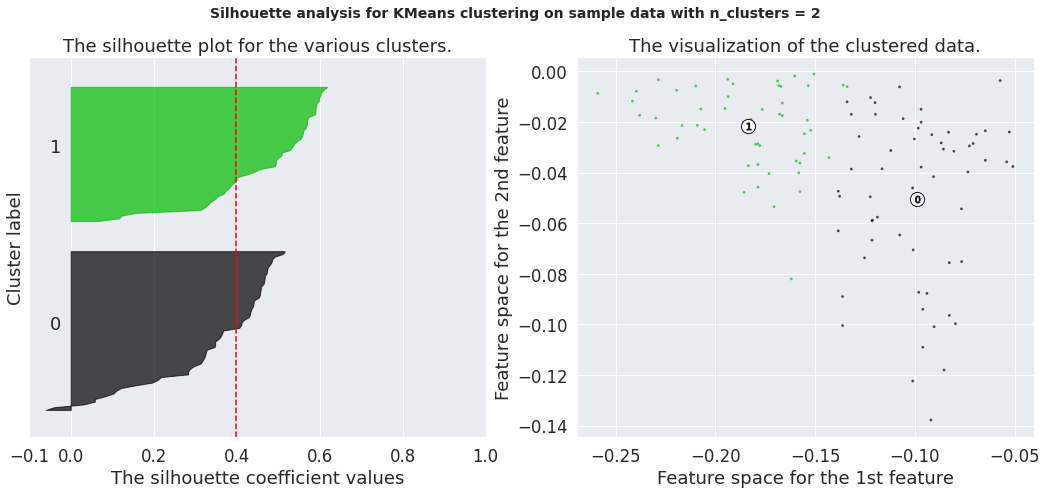

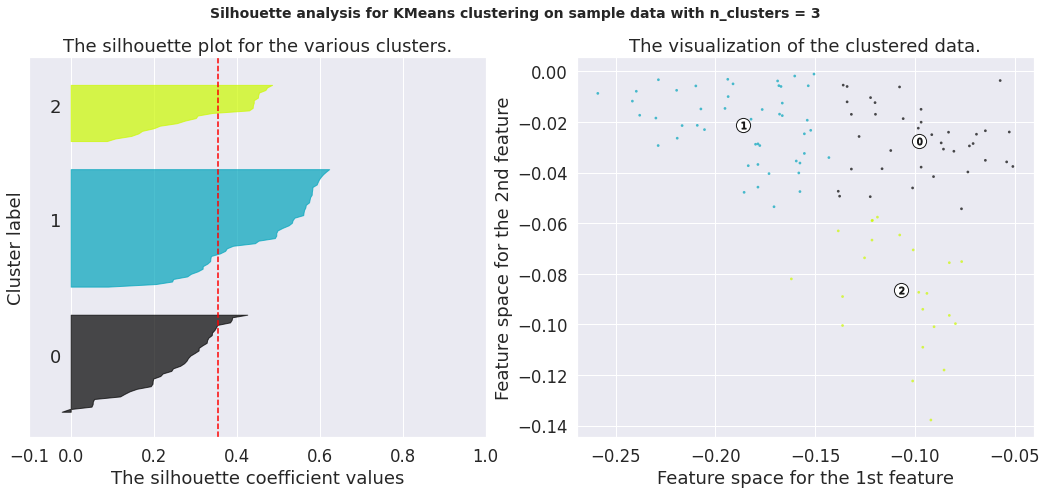

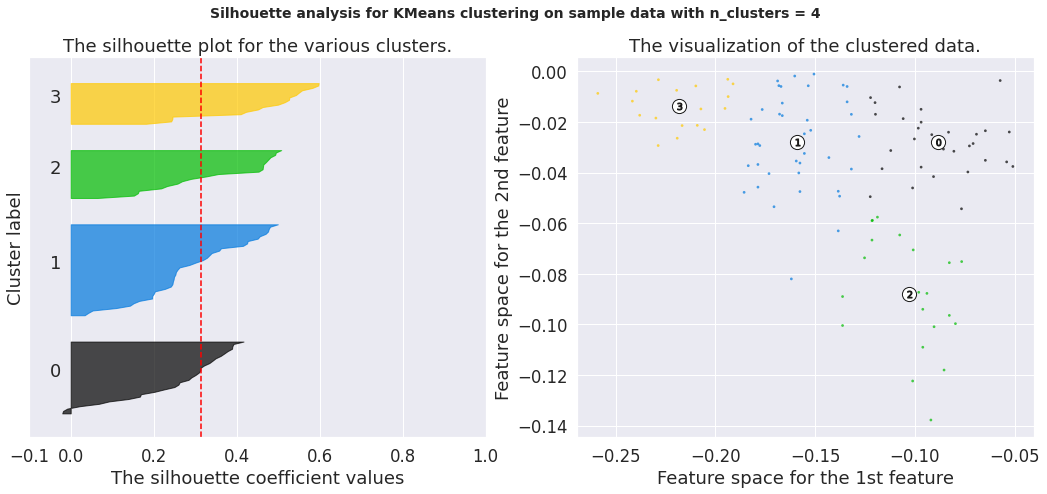

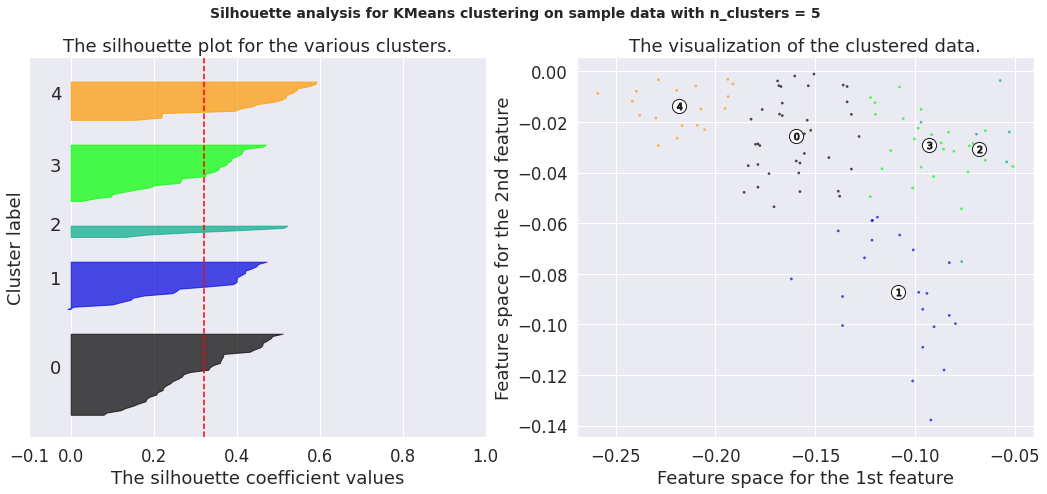

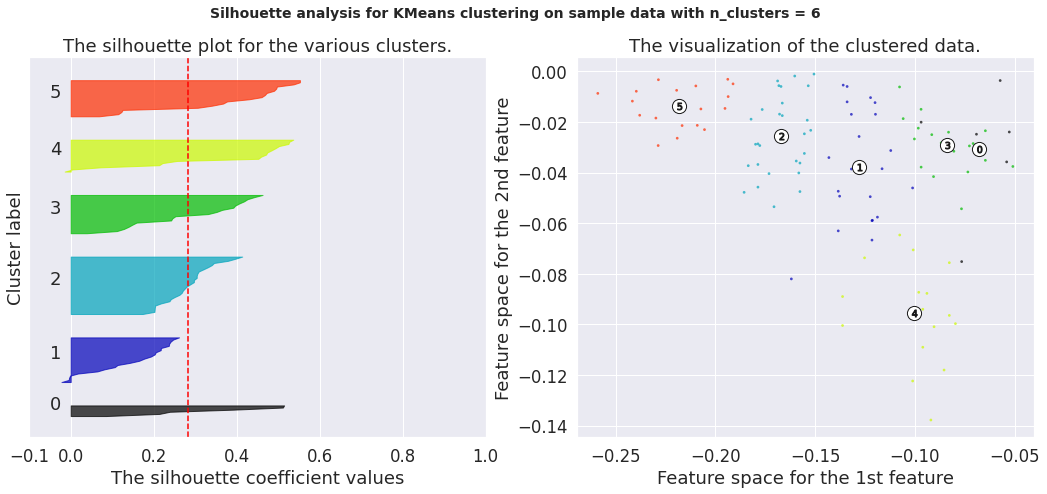

In [138]:
# display clusters and average sillohid
import matplotlib.cm as cm
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # print('cluster_labels is {} '.format(cluster_labels))
    token_list = word_list
    tmp_dic = dict()
    for x in range(0, n_clusters):
      tmp_list = list()
      for i, j in zip(token_list, cluster_labels):
        if j == x:
          tmp_list.append(i)
      tmp_dic[x] = tmp_list
    print('list of cluster words are ', tmp_dic)

      

      


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

labels [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
X_ [[-0.04087885654333864, -0.0033447951981515553, -0.004944302638371787, -0.004992969288970471, -0.0034780885234023586, -0.004722346862157171, -0.0019133255337223732, -0.0013776434190345484, -0.00219992417277712, -0.001481001485477807, -0.0012855835033185547, -0.0021112760811140977, -0.0018080602089563897, -0.0018104723005583762, -0.00710220734278361], [-0.04529107736818717, -0.0026266013130997004, -0.0032468127481865144, -0.004121828621084031, -0.00531085296110673, -0.004879146994966436, -0.002224450400381372, -0.0022992551326751695, -0.0005640958294723858, -0.0018441128008293275, -0.0014603307752898054, -0.0023036863767739468, -0.0022868985479528136, -0.

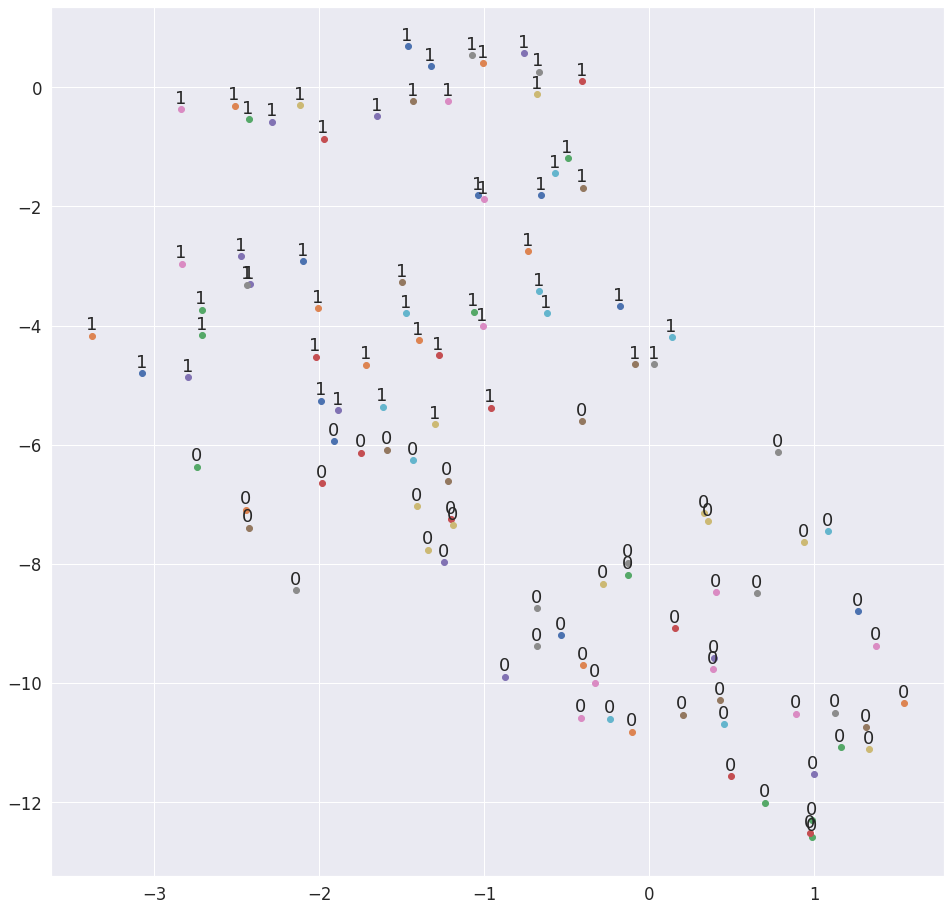

In [129]:
def tsne_plot_kmeans(labels_, X_):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    print('labels {}'.format(labels_))
    print('X_ {}'.format(X_))
    print('shape of kmeans is {}'.format(np.shape(labels_)))
    for word, embed in zip(labels_, X_):
        tokens.append(embed)
        labels.append(word)
    print('shape is {}'.format(np.shape(tokens)))
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot_kmeans(kmeans.labels_.tolist(), list(gradient_word_similarity_dict.values()))